In [241]:
# System management 
import os
import glob

# Data manipulation
import numpy as np
import pandas as pd
pd.options.display.max_rows = 400

# Data analysis 
import missingno as msno

# Feature engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.style.use('fivethirtyeight')
plt.rcParams.update(
    {
     'xtick.labelsize':25,
     'ytick.labelsize':25,
     'axes.labelsize': 25,
     'legend.fontsize': 25,
     'axes.titlesize':45,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })
%matplotlib inline
#sns.set_theme(palette='Set1')

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [242]:
# Set main directory
project_path = '/Users/felipelima/alternance/projets/credit-scoring/'
os.chdir(project_path)

In [243]:
# List files
print('CHECKLIST DATA EXPLORER: ')
files = os.listdir('data/external/')
print(files)

CHECKLIST DATA EXPLORER: 
['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [244]:
# Load data
%time
df_names = ['data_' + s[:-4] for s in files]

for file in files: 
    df_name = df_names[files.index(file)]
    df_path = 'data/external/' + file
    globals()[df_name] = pd.read_csv(df_path, encoding='ISO-8859-1')

data_HomeCredit_columns_description

CPU times: user 1 µs, sys: 2 µs, total: 3 µs
Wall time: 6.91 µs


Unnamed: 0                         Table                           Row  \
0             1  application_{train|test}.csv                    SK_ID_CURR   
1             2  application_{train|test}.csv                        TARGET   
2             5  application_{train|test}.csv            NAME_CONTRACT_TYPE   
3             6  application_{train|test}.csv                   CODE_GENDER   
4             7  application_{train|test}.csv                  FLAG_OWN_CAR   
5             8  application_{train|test}.csv               FLAG_OWN_REALTY   
6             9  application_{train|test}.csv                  CNT_CHILDREN   
7            10  application_{train|test}.csv              AMT_INCOME_TOTAL   
8            11  application_{train|test}.csv                    AMT_CREDIT   
9            12  application_{train|test}.csv                   AMT_ANNUITY   
10           13  application_{train|test}.csv               AMT_GOODS_PRICE   
11           14  application_{train|test}.csv               NAME_TYPE_SUITE   
12           15  application_{train|test}.csv              NAME_INCOME_TYPE   
13           16  application_{train|test}.csv           NAME_EDUCATION_TYPE   
14           17  application_{train|test}.csv            NAME_FAMILY_STATUS   
15           18  application_{train|test}.csv             NAME_HOUSING_TYPE   
16           19  application_{train|test}.csv    REGION_POPULATION_RELATIVE   
17           20  application_{train|test}.csv                    DAYS_BIRTH   
18           21  application_{train|test}.csv                 DAYS_EMPLOYED   
19           22  application_{train|test}.csv             DAYS_REGISTRATION   
20           23  application_{train|test}.csv               DAYS_ID_PUBLISH   
21           24  application_{train|test}.csv                   OWN_CAR_AGE   
22           25  application_{train|test}.csv                    FLAG_MOBIL   
23           26  application_{train|test}.csv                FLAG_EMP_PHONE   
24           27  application_{train|test}.csv               FLAG_WORK_PHONE   
25           28  application_{train|test}.csv              FLAG_CONT_MOBILE   
26           29  application_{train|test}.csv                    FLAG_PHONE   
27           30  application_{train|test}.csv                    FLAG_EMAIL   
28           31  application_{train|test}.csv               OCCUPATION_TYPE   
29           32  application_{train|test}.csv               CNT_FAM_MEMBERS   
30           33  application_{train|test}.csv          REGION_RATING_CLIENT   
31           34  application_{train|test}.csv   REGION_RATING_CLIENT_W_CITY   
32           35  application_{train|test}.csv    WEEKDAY_APPR_PROCESS_START   
33           36  application_{train|test}.csv       HOUR_APPR_PROCESS_START   
34           37  application_{train|test}.csv    REG_REGION_NOT_LIVE_REGION   
35           38  application_{train|test}.csv    REG_REGION_NOT_WORK_REGION   
36           39  application_{train|test}.csv   LIVE_REGION_NOT_WORK_REGION   
37           40  application_{train|test}.csv        REG_CITY_NOT_LIVE_CITY   
38           41  application_{train|test}.csv        REG_CITY_NOT_WORK_CITY   
39           42  application_{train|test}.csv       LIVE_CITY_NOT_WORK_CITY   
40           43  application_{train|test}.csv             ORGANIZATION_TYPE   
41           44  application_{train|test}.csv                  EXT_SOURCE_1   
42           45  application_{train|test}.csv                  EXT_SOURCE_2   
43           46  application_{train|test}.csv                  EXT_SOURCE_3   
44           47  application_{train|test}.csv                APARTMENTS_AVG   
45           48  application_{train|test}.csv              BASEMENTAREA_AVG   
46           49  application_{train|test}.csv   YEARS_BEGINEXPLUATATION_AVG   
47           50  application_{train|test}.csv               YEARS_BUILD_AVG   
48           51  application_{train|test}.csv                COMMONAREA_AVG   
49           52  application_{train|test}.csv          

#### Functions

##### General functions

In [245]:
def describe_files(folder):
    '''Check the number of rows, columns, missing values and duplicates.
       Count type of columns.
       Memory indication'''

    data_dict = {}
    for file in folder:
        data = pd.read_csv(file, encoding='ISO-8859-1')
        data_dict[file] = [data.shape[0], 
                           data.shape[1],
                            round(data.isna().sum().sum()/data.size*100, 2),
                            round(data.duplicated().sum().sum()/data.size*100, 2),
                            data.select_dtypes(include=['object']).shape[1],
                            data.select_dtypes(include=['float']).shape[1],
                            data.select_dtypes(include=['int']).shape[1],
                            data.select_dtypes(include=['bool']).shape[1],
                            round(data.memory_usage().sum()/1024**2, 3)]

        comparative_table = pd.DataFrame.from_dict(data = data_dict, 
                                                   columns = ['Rows', 'Columns', '%NaN', '%Duplicate', 
                                                              'object_dtype','float_dtype', 'int_dtype', 
                                                              'bool_dtype', 'MB_Memory'], 
                                                   orient='index')
    print('SUMMARY FILES…')
    return(comparative_table)

def describe_features(folder):
    '''Comparative data with missing values, 
       and many descriptive statistics.'''
    
    data_object = {}
    data_numeric = {}
    
    for file in folder:
        data = pd.read_csv(file, encoding='ISO-8859-1')
        
        data_object[file] = [(x, data[x].dtype, 
                              data[x].isna().sum().sum(),
                              int(data[x].count())) for x in data.select_dtypes(exclude=['int', 'float'])]
        
        data_numeric[file] = [(x, data[x].dtype, 
                               int(data[x].isna().sum().sum()), 
                               int(data[x].count()), 
                               int(data[x].mean()), 
                               round(data[x].std(),1),
                               round(data[x].min(),1), 
                               round(data[x].max(),1)) for x in data.select_dtypes(exclude='object')]
        

    comparative_object = pd.DataFrame.from_dict(data = data_object, orient='index')
    dict_of_object = {name: pd.DataFrame(file) for name,file in data_object.items()}
    df1 = pd.concat(dict_of_object, axis=0)
    df1.columns=['features','dtype','nan','count']
    
    comparative_numeric = pd.DataFrame.from_dict(data = data_numeric, orient='index')
    dict_of_numeric = {name: pd.DataFrame(file) for name,file in data_numeric.items()}
    df2 = pd.concat(dict_of_numeric, axis=0)
    df2.columns=['features','dtype','nan','count', 'mean', 'std', 'min','max']
        
    return df1, df2

def nan_check(data):
    '''Check Missing Values'''
    total = data.isnull().sum()
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 2))
    missing_data = pd.concat([total, percent_2], 
                             axis=1, keys=['Total', '%']).sort_values('%', ascending=False)
    return missing_data

##### Plot functions

In [246]:
def plot_stat(data, feature, title) : 
    
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.countplot(y=feature, data=data, order=data[feature].value_counts(ascending=False).index)
    ax.set_title(title)

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/len(data[feature]))
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    plt.show()

def plot_percent_target1(data, feature, title) : 
    
    cat_perc = data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.barplot(y=feature, x='TARGET', data=cat_perc)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('Percent of target with value 1')

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width())
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    plt.show()

def plot_distribution(data, feature, title):
    plt.figure(figsize=(20,6))

    t0 = data.loc[data['TARGET'] == 0]
    t1 = data.loc[data['TARGET'] == 1]

    
    sns.kdeplot(t0[feature].dropna(), color='blue', label="TARGET = 0")
    sns.kdeplot(t1[feature].dropna(), color='red', label="TARGET = 1")
    plt.title(title)
    plt.ylabel('')
    plt.legend()
    plt.show() 

#### Exploratory analysis

##### General information

In [247]:
describe_files(folder = glob.glob('data/external/*.csv'))

SUMMARY FILES…


Rows  Columns   %NaN  \
data/external/application_test.csv                   48744      121  23.81   
data/external/HomeCredit_columns_description.csv       219        5  12.15   
data/external/POS_CASH_balance.csv                10001358        8   0.07   
data/external/credit_card_balance.csv              3840312       23   6.65   
data/external/installments_payments.csv           13605401        8   0.01   
data/external/application_train.csv                 307511      122  24.40   
data/external/bureau.csv                           1716428       17  13.50   
data/external/previous_application.csv             1670214       37  17.98   
data/external/bureau_balance.csv                  27299925        3   0.00   
data/external/sample_submission.csv                  48744        2   0.00   

                                                  %Duplicate  object_dtype  \
data/external/application_test.csv                       0.0            16   
data/external/HomeCredit_columns_description.csv         0.0             4   
data/external/POS_CASH_balance.csv                       0.0             1   
data/external/credit_card_balance.csv                    0.0             1   
data/external/installments_payments.csv                  0.0             0   
data/external/application_train.csv                      0.0            16   
data/external/bureau.csv                                 0.0             3   
data/external/previous_application.csv                   0.0            16   
data/external/bureau_balance.csv                         0.0             1   
data/external/sample_submission.csv                      0.0             0   

                                                  float_dtype  int_dtype  \
data/external/application_test.csv                         65         40   
data/external/HomeCredit_columns_description.csv            0          1   
data/external/POS_CASH_balance.csv                          2          5   
data/external/credit_card_balance.csv                      15          7   
data/external/installments_payments.csv                     5          3   
data/external/application_train.csv                        65         41   
data/external/bureau.csv                                    8          6   
data/external/previous_application.csv                     15          6   
data/external/bureau_balance.csv                            0          2   
data/external/sample_submission.csv                         1          1   

                                                  bool_dtype  MB_Memory  
data/external/application_test.csv                         0     44.998  
data/external/HomeCredit_columns_description.csv           0      0.008  
data/external/POS_CASH_balance.csv                         0    610.435  
data/external/credit_card_balance.csv                      0    673.883  
data/external/installments_payments.csv                    0    830.408  
data/external/application_train.csv                        0    286.227  
data/external/bureau.csv                                   0    222.620  
data/external/previous_application.csv                     0    471.481  
data/external/bureau_balance.csv                           0    624.846  
data/external/sample_submission.csv                        0      0.744

In [248]:
pd.set_option('display.max_rows', None)
display(describe_features(folder = glob.glob('data/external/*.csv'))[1])
pd.reset_option('display.max_rows')

features  \
data/external/application_test.csv               0                      SK_ID_CURR   
                                                 1                    CNT_CHILDREN   
                                                 2                AMT_INCOME_TOTAL   
                                                 3                      AMT_CREDIT   
                                                 4                     AMT_ANNUITY   
                                                 5                 AMT_GOODS_PRICE   
                                                 6      REGION_POPULATION_RELATIVE   
                                                 7                      DAYS_BIRTH   
                                                 8                   DAYS_EMPLOYED   
                                                 9               DAYS_REGISTRATION   
                                                 10                DAYS_ID_PUBLISH   
                                                 11                    OWN_CAR_AGE   
                                                 12                     FLAG_MOBIL   
                                                 13                 FLAG_EMP_PHONE   
                                                 14                FLAG_WORK_PHONE   
                                                 15               FLAG_CONT_MOBILE   
                                                 16                     FLAG_PHONE   
                                                 17                     FLAG_EMAIL   
                                                 18                CNT_FAM_MEMBERS   
                                                 19           REGION_RATING_CLIENT   
                                                 20    REGION_RATING_CLIENT_W_CITY   
                                                 21        HOUR_APPR_PROCESS_START   
                                                 22     REG_REGION_NOT_LIVE_REGION   
                                                 23     REG_REGION_NOT_WORK_REGION   
                                                 24    LIVE_REGION_NOT_WORK_REGION   
                                                 25         REG_CITY_NOT_LIVE_CITY   
                                                 26         REG_CITY_NOT_WORK_CITY   
                                                 27        LIVE_CITY_NOT_WORK_CITY   
                                                 28                   EXT_SOURCE_1   
                                                 29                   EXT_SOURCE_2   
                                                 30                   EXT_SOURCE_3   
                                                 31                 APARTMENTS_AVG   
                                                 32               BASEMENTAREA_AVG   
                                                 33    YEARS_BEGINEXPLUATATION_AVG   
                                                 34                YEARS_BUILD_AVG   
                                                 35                 COMMONAREA_AVG   
                                                 36                  ELEVATORS_AVG   
                                                 37                  ENTRANCES_AVG   
                                                 38                  FLOORSMAX_AVG   
                                                 39                  FLOORSMIN_AVG   
                                                 40                   LANDAREA_AVG   
                                                 41           LIVINGAPARTMENTS_AVG   
                                                 42                 LIVINGAREA_AVG   
                                                 43        NONLIVINGAPARTMENTS_AVG   
                                                 44              NONLIVINGAREA_AVG   
                                                 45                APARTMENTS_MODE   
                                

In [249]:
# Description of columns in each file
pd.set_option('display.max_columns', None)
for file in files:
    if file != 'HomeCredit_columns_description.csv':
        df = globals().get('data_' + file[:-4])
        if df is not None:
            print('File: ', file[:-4])
            # Show first rows
            print('First rows: ')
            display(df.head(5))
            
            # Check for numerical columns
            numerical_columns = df.select_dtypes(include=[np.number])
            if not numerical_columns.empty:
                print('Numerical column description: ')
                display(numerical_columns.describe(include=[np.number]))

            # Check for categorical columns
            categorical_columns = df.select_dtypes(exclude=[np.number])
            if not categorical_columns.empty:
                print('Categorical column description: ')
                display(categorical_columns.describe(exclude=[np.number]))

            # Show description for each file
            pd.set_option('display.max_rows', None)
            x = globals()['data_HomeCredit_columns_description']
            display(x[x['Table'] == file])
            pd.reset_option('display.max_rows') 

            print('\n\n')
        else:
            print(f'DataFrame data_{file[:-4]} not found.')

pd.reset_option('display.max_columns')

File:  application_test
First rows: 


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

Numerical column description: 


SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  48744.000000   48744.000000       48744.000000     48744.000000   
mean  -16068.084605   67485.366322       -4967.652716     -3051.712949   
std     4325.900393  144348.507136        3552.612035      1569.276709   
min   -25195.000000  -17463.000000      -23722.000000     -6348.000000   
25%   -19637.000000   -2910.000000       -7459.250000     -4448.000000   
50%   -15785.000000   -1293.000000       -4490.000000     -3234.000000   
75%   -12496.000000    -296.000000       -1901.000000     -1706.000000   
max    -7338.000000  365243.000000           0.000000         0.000000   

        OWN_CAR_AGE    FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
count  16432.000000  48744.000000    48744.000000     48744.000000   
mean      11.786027      0.999979        0.809720         0.204702   
std       11.462889      0.004529        0.392526         0.403488   
min        0.000000      0.000000        0.000000         0.000000   
25%        4.000000      1.000000        1.000000         0.000000   
50%        9.000000      1.000000        1.000000         0.000000   
75%       15.000000      1.000000        1.000000         0.000000   
max       74.000000      1.000000        1.000000         1.000000   

       FLAG_CONT_MOBILE    FLAG_PHONE    FLAG_EMAIL  CNT_FAM_MEMBERS  \
count      48744.000000  48744.000000  48744.000000     48744.000000   
mean           0.998400      0.263130      0.162646         2.146767   
std            0.039971      0.440337      0.369046         0.890423   
min            0.000000      0.000000      0.000000         1.000000   
25%            1.000000      0.000000      0.000000         2.000000   
50%            1.000000      0.000000      0.000000         2.000000   
75%            1.000000      1.000000      0.000000         3.000000   
max            1.000000      1.000000      1.000000        21.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count          48744.000000                 48744.000000   
mean               2.038159                     2.012596   
std                0.522694                     0.515804   
min                1.000000                    -1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count             48744.000000                48744.000000   
mean                 12.007365                    0.018833   
std                   3.278172                    0.135937   
min                  

Categorical column description: 


NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count               48744       48744        48744           48744   
unique                  2           2            2               2   
top            Cash loans           F            N               Y   
freq                48305       32678        32311           33658   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count            47833            48744                          48744   
unique               7                7                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq             39727            24533                          33988   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count               48744              48744           33139   
unique                  5                  6              18   
top               Married  House / apartment        Laborers   
freq                32283              43645            8655   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                       48744                   48744              15947   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                         9751                   10840              12124   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count            25125              24851               26535  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq             24659              11269               26179

Empty DataFrame
Columns: [Unnamed: 0, Table, Row, Description, Special]
Index: []




File:  POS_CASH_balance
First rows: 


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

Numerical column description: 


SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
mean   1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std    5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%    1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%    2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

       CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF  
count           9.975271e+06  1.000136e+07  1.000136e+07  
mean            1.048384e+01  1.160693e+01  6.544684e-01  
std             1.110906e+01  1.327140e+02  3.276249e+01  
min             0.000000e+00  0.000000e+00  0.000000e+00  
25%             3.000000e+00  0.000000e+00  0.000000e+00  
50%             7.000000e+00  0.000000e+00  0.000000e+00  
75%             1.400000e+01  0.000000e+00  0.000000e+00  
max             8.500000e+01  4.231000e+03  3.595000e+03

Categorical column description: 


NAME_CONTRACT_STATUS
count              10001358
unique                    9
top                  Active
freq                9151119

Unnamed: 0                 Table                    Row  \
142         145  POS_CASH_balance.csv            SK_ID_PREV    
143         146  POS_CASH_balance.csv             SK_ID_CURR   
144         147  POS_CASH_balance.csv         MONTHS_BALANCE   
145         148  POS_CASH_balance.csv         CNT_INSTALMENT   
146         149  POS_CASH_balance.csv  CNT_INSTALMENT_FUTURE   
147         150  POS_CASH_balance.csv   NAME_CONTRACT_STATUS   
148         151  POS_CASH_balance.csv                 SK_DPD   
149         152  POS_CASH_balance.csv             SK_DPD_DEF   

                                                                                                                                                                                                                                                        Description  \
142                                                                                                               ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)   
143                                                                                                                                                                                                                                        ID of loan in our sample   
144  Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )   
145                                                                                                                                                                                                                  Term of previous credit (can change over time)   
146                                                                                                                                                                                                                 Installments left to pay on the previous credit   
147                                                                                                                                                                                                                                Contract status during the month   
148                                                                                                                                                                                                         DPD (days past due) during the month of previous credit   
149                                                                                                                                                            DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit   

                                   Special  
142                                    NaN  
143                                    NaN  
144  time only relative to the application  
145                                    NaN  
146                                    NaN  
147                                    NaN  
148                                    NaN  
149                                    NaN




File:  credit_card_balance
First rows: 


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

Numerical column description: 


SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count  3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
mean   1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std    5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min    1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%    1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%    1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%    2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max    2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count             3.840312e+06              3.090496e+06   
mean              1.538080e+05              5.961325e+03   
std               1.651457e+05              2.822569e+04   
min               0.000000e+00             -6.827310e+03   
25%               4.500000e+04              0.000000e+00   
50%               1.125000e+05              0.000000e+00   
75%               1.800000e+05              0.000000e+00   
max               1.350000e+06              2.115000e+06   

       AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count          3.840312e+06                3.090496e+06   
mean           7.433388e+03                2.881696e+02   
std            3.384608e+04                8.201989e+03   
min           -6.211620e+03                0.000000e+00   
25%            0.000000e+00                0.000000e+00   
50%            0.000000e+00                0.000000e+00   
75%            0.000000e+00                0.000000e+00   
max            2.287098e+06                1.529847e+06   

       AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
count              3.090496e+06             3.535076e+06         3.072324e+06   
mean               2.968805e+03             3.540204e+03         1.028054e+04   
std                2.079689e+04             5.600154e+03         3.607808e+04   
min                0.000000e+00             0.000000e+00         0.000000e+00   
25%                0.000000e+00             0.000000e+00         1.523700e+02   
50%                0.000000e+00             0.000000e+00         2.702700e+03   
75%                0.000000e+00             6.633911e+03         9.000000e+03   
max                2.239274e+06             2.028820e+05         4.289207e+06   

       AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
count               3.840312e+06              3.840312e+06   3.840312e+06   
mean                7.588857e+03              5.596588e+04   5.808881e+04   
std                 3.200599e+04              1.025336e+05   1.059654e+05   
min                 0.000000e+00             -4.233058e+05  -4.202502e+05   
25%                 0.000000e+00              0.000000e+00   0.000000e+00   
50%                 0.000000e+00              0.000000e+00   0.000000e+00   
75%                 6.750000e+03              8.535924e+04   8.889949e+04   
max                 4.278316e+06              1.472317e+06   1.493338e+06   

       AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count          3.840312e+06              3.090496e+06          3.840312e+06   
mean           5.809829e+04              3.094490e-01          7.031439e-01   
std            1.059718e+05              1.100401e+00          3.190347e+00   
min           -4.202502e+05              0.000000e+00          0.000000e+00   
25%            0.000000e+00              0.000000e+00          0.000000e+00   
50%            0.000000e+00              0.000000e+00          0.000000e+00   
75%            8.891451e+04              0.000000e+00          0.000000e+00   
max            1.493338e+06              5.100000e+01          1.650000e+02   

       CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
count                3.090496e+06              3.090496e+06   
mean                 4.812496e-03              5.594791e-01   
std    

Categorical column description: 


NAME_CONTRACT_STATUS
count               3840312
unique                    7
top                  Active
freq                3698436

Unnamed: 0                    Table                         Row  \
150         153  credit_card_balance.csv                 SK_ID_PREV    
151         154  credit_card_balance.csv                  SK_ID_CURR   
152         155  credit_card_balance.csv              MONTHS_BALANCE   
153         156  credit_card_balance.csv                 AMT_BALANCE   
154         157  credit_card_balance.csv     AMT_CREDIT_LIMIT_ACTUAL   
155         158  credit_card_balance.csv    AMT_DRAWINGS_ATM_CURRENT   
156         159  credit_card_balance.csv        AMT_DRAWINGS_CURRENT   
157         160  credit_card_balance.csv  AMT_DRAWINGS_OTHER_CURRENT   
158         161  credit_card_balance.csv    AMT_DRAWINGS_POS_CURRENT   
159         162  credit_card_balance.csv     AMT_INST_MIN_REGULARITY   
160         163  credit_card_balance.csv         AMT_PAYMENT_CURRENT   
161         164  credit_card_balance.csv   AMT_PAYMENT_TOTAL_CURRENT   
162         165  credit_card_balance.csv    AMT_RECEIVABLE_PRINCIPAL   
163         166  credit_card_balance.csv               AMT_RECIVABLE   
164         167  credit_card_balance.csv        AMT_TOTAL_RECEIVABLE   
165         168  credit_card_balance.csv    CNT_DRAWINGS_ATM_CURRENT   
166         169  credit_card_balance.csv        CNT_DRAWINGS_CURRENT   
167         170  credit_card_balance.csv  CNT_DRAWINGS_OTHER_CURRENT   
168         171  credit_card_balance.csv    CNT_DRAWINGS_POS_CURRENT   
169         172  credit_card_balance.csv   CNT_INSTALMENT_MATURE_CUM   
170         173  credit_card_balance.csv        NAME_CONTRACT_STATUS   
171         174  credit_card_balance.csv                      SK_DPD   
172         175  credit_card_balance.csv                  SK_DPD_DEF   

                                                                                                                                           Description  \
150  ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)   
151                                                                                                                           ID of loan in our sample   
152                                                                 Month of balance relative to application date (-1 means the freshest balance date)   
153                                                                                                        Balance during the month of previous credit   
154                                                                                          Credit card limit during the month of the previous credit   
155                                                                                      Amount drawing at ATM during the month of the previous credit   
156                                                                                             Amount drawing during the month of the previous credit   
157                                                                                   Amount of other drawings during the month of the previous credit   
158                                                                             Amount drawing or buying goods during the month of the previous credit   
159                                                                                          Minimal installment for this month of the previous credit   
160                                                                                How much did the client pay during the month on the previous credit   
161                                                                       How much did the client pay during the month in total on the previous credit   
162                                                                                             Amount receivable for principal on the previous credit   
163                                                                                                           Amount rec




File:  installments_payments
First rows: 


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

Numerical column description: 


SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.180000e+02       -8.270000e+02   
75%             1.900000e+01    -3.610000e+02       -3.700000e+02   
max             2.770000e+02    -1.000000e+00       -1.000000e+00   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705091e+04  1.723822e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06

Unnamed: 0                      Table                     Row  \
211         214  installments_payments.csv             SK_ID_PREV    
212         215  installments_payments.csv              SK_ID_CURR   
213         216  installments_payments.csv  NUM_INSTALMENT_VERSION   
214         217  installments_payments.csv   NUM_INSTALMENT_NUMBER   
215         218  installments_payments.csv         DAYS_INSTALMENT   
216         219  installments_payments.csv      DAYS_ENTRY_PAYMENT   
217         220  installments_payments.csv          AMT_INSTALMENT   
218         221  installments_payments.csv             AMT_PAYMENT   

                                                                                                                                                                                    Description  \
211                                           ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)   
212                                                                                                                                                                    ID of loan in our sample   
213  Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed   
214                                                                                                                                                     On which installment we observe payment   
215                                                                              When the installment of previous credit was supposed to be paid (relative to application date of current loan)   
216                                                                                   When was the installments of previous credit paid actually (relative to application date of current loan)   
217                                                                                                           What was the prescribed installment amount of previous credit on this installment   
218                                                                                                                        What the client actually paid on previous credit on this installment   

                                   Special  
211                                 hashed  
212                                 hashed  
213                                    NaN  
214                                    NaN  
215  time only relative to the application  
216  time only relative to the application  
217                                    NaN  
218                                    NaN




File:  application_train
First rows: 


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

Numerical column description: 


SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

Categorical column description: 


NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

Empty DataFrame
Columns: [Unnamed: 0, Table, Row, Description, Special]
Index: []




File:  bureau
First rows: 


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

Numerical column description: 


SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

Categorical column description: 


CREDIT_ACTIVE CREDIT_CURRENCY      CREDIT_TYPE
count        1716428         1716428          1716428
unique             4               4               15
top           Closed      currency 1  Consumer credit
freq         1079273         1715020          1251615

Unnamed: 0       Table                     Row  \
122         125  bureau.csv              SK_ID_CURR   
123         126  bureau.csv            SK_BUREAU_ID   
124         127  bureau.csv           CREDIT_ACTIVE   
125         128  bureau.csv         CREDIT_CURRENCY   
126         129  bureau.csv             DAYS_CREDIT   
127         130  bureau.csv      CREDIT_DAY_OVERDUE   
128         131  bureau.csv     DAYS_CREDIT_ENDDATE   
129         132  bureau.csv       DAYS_ENDDATE_FACT   
130         133  bureau.csv  AMT_CREDIT_MAX_OVERDUE   
131         134  bureau.csv      CNT_CREDIT_PROLONG   
132         135  bureau.csv          AMT_CREDIT_SUM   
133         136  bureau.csv     AMT_CREDIT_SUM_DEBT   
134         137  bureau.csv    AMT_CREDIT_SUM_LIMIT   
135         138  bureau.csv  AMT_CREDIT_SUM_OVERDUE   
136         139  bureau.csv             CREDIT_TYPE   
137         140  bureau.csv      DAYS_CREDIT_UPDATE   
138         141  bureau.csv             AMT_ANNUITY   

                                                                                                             Description  \
122  ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau    
123            Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)   
124                                                                    Status of the Credit Bureau (CB) reported credits   
125                                                                         Recoded currency of the Credit Bureau credit   
126                                   How many days before current application did client apply for Credit Bureau credit   
127                       Number of days past due on CB credit at the time of application for related loan in our sample   
128                                  Remaining duration of CB credit (in days) at the time of application in Home Credit   
129                        Days since CB credit ended at the time of application in Home Credit (only for closed credit)   
130                Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)   
131                                                                How many times was the Credit Bureau credit prolonged   
132                                                                   Current credit amount for the Credit Bureau credit   
133                                                                                 Current debt on Credit Bureau credit   
134                                                        Current credit limit of credit card reported in Credit Bureau   
135                                                                       Current amount overdue on Credit Bureau credit   
136                                                                         Type of Credit Bureau credit (Car, cash,...)   
137                       How many days before loan application did last information about the Credit Bureau credit come   
138                                                                                  Annuity of the Credit Bureau credit   

                                   Special  
122                                 hashed  
123                                 hashed  
124                                    NaN  
125                                recoded  
126  time only relative to the application  
127                                    NaN  
128  time only relative to the application  
129  time only relative to the application  
130                                    NaN  
131                                    NaN  
132                                    NaN  
133                                    NaN  
134                                    NaN  
135                                    NaN  
136                                    NaN  
137  time only relative to the application  
138             




File:  previous_application
First rows: 


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

Numerical column description: 


SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115833    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

Categorical column description: 


NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START  \
count             1670214                    1670214   
unique                  4                          7   
top            Cash loans                    TUESDAY   
freq               747553                     255118   

       FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE  \
count                      1670214                1670214   
unique                           2                     25   
top                              Y                    XAP   
freq                       1661739                 922661   

       NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE CODE_REJECT_REASON  \
count               1670214                1670214            1670214   
unique                    4                      4                  9   
top                Approved  Cash through the bank                XAP   
freq                1036781                1033552            1353093   

       NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
count           849809          1670214             1670214        1670214   
unique               7                4                  28              5   
top      Unaccompanied         Repeater                 XNA            POS   
freq            508970          1231261              950809         691011   

       NAME_PRODUCT_TYPE             CHANNEL_TYPE NAME_SELLER_INDUSTRY  \
count            1670214                  1670214              1670214   
unique                 3                        8                   11   
top                  XNA  Credit and cash offices                  XNA   
freq             1063666                   719968               855720   

       NAME_YIELD_GROUP PRODUCT_COMBINATION  
count           1670214             1669868  
unique                5                  17  
top                 XNA                Cash  
freq             517215              285990

Unnamed: 0                     Table                          Row  \
173         176  previous_application.csv                  SK_ID_PREV    
174         177  previous_application.csv                   SK_ID_CURR   
175         178  previous_application.csv           NAME_CONTRACT_TYPE   
176         179  previous_application.csv                  AMT_ANNUITY   
177         180  previous_application.csv              AMT_APPLICATION   
178         181  previous_application.csv                   AMT_CREDIT   
179         182  previous_application.csv             AMT_DOWN_PAYMENT   
180         183  previous_application.csv              AMT_GOODS_PRICE   
181         184  previous_application.csv   WEEKDAY_APPR_PROCESS_START   
182         185  previous_application.csv      HOUR_APPR_PROCESS_START   
183         186  previous_application.csv  FLAG_LAST_APPL_PER_CONTRACT   
184         187  previous_application.csv       NFLAG_LAST_APPL_IN_DAY   
185         188  previous_application.csv             NFLAG_MICRO_CASH   
186         189  previous_application.csv            RATE_DOWN_PAYMENT   
187         190  previous_application.csv        RATE_INTEREST_PRIMARY   
188         191  previous_application.csv     RATE_INTEREST_PRIVILEGED   
189         192  previous_application.csv       NAME_CASH_LOAN_PURPOSE   
190         193  previous_application.csv         NAME_CONTRACT_STATUS   
191         194  previous_application.csv                DAYS_DECISION   
192         195  previous_application.csv            NAME_PAYMENT_TYPE   
193         196  previous_application.csv           CODE_REJECT_REASON   
194         197  previous_application.csv              NAME_TYPE_SUITE   
195         198  previous_application.csv             NAME_CLIENT_TYPE   
196         199  previous_application.csv          NAME_GOODS_CATEGORY   
197         200  previous_application.csv               NAME_PORTFOLIO   
198         201  previous_application.csv            NAME_PRODUCT_TYPE   
199         202  previous_application.csv                 CHANNEL_TYPE   
200         203  previous_application.csv             SELLERPLACE_AREA   
201         204  previous_application.csv         NAME_SELLER_INDUSTRY   
202         205  previous_application.csv                  CNT_PAYMENT   
203         206  previous_application.csv             NAME_YIELD_GROUP   
204         207  previous_application.csv          PRODUCT_COMBINATION   
205         208  previous_application.csv           DAYS_FIRST_DRAWING   
206         209  previous_application.csv               DAYS_FIRST_DUE   
207         210  previous_application.csv    DAYS_LAST_DUE_1ST_VERSION   
208         211  previous_application.csv                DAYS_LAST_DUE   
209         212  previous_application.csv             DAYS_TERMINATION   
210         213  previous_application.csv    NFLAG_INSURED_ON_APPROVAL   

                                                                                                                                                                                                                                                             Description  \
173                               ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)    
174                                                                                                                                                                                                                                             ID of loan in our sample   
175                                                                                                                                                                              Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application   
176                                           




File:  bureau_balance
First rows: 


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

Numerical column description: 


SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06   -3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06   -9.600000e+01
25%    5.730933e+06   -4.600000e+01
50%    6.070821e+06   -2.500000e+01
75%    6.431951e+06   -1.100000e+01
max    6.842888e+06    0.000000e+00

Categorical column description: 


STATUS
count   27299925
unique         8
top            C
freq    13646993

Unnamed: 0               Table             Row  \
139         142  bureau_balance.csv    SK_BUREAU_ID   
140         143  bureau_balance.csv  MONTHS_BALANCE   
141         144  bureau_balance.csv          STATUS   

                                                                                                                                                                                                                                          Description  \
139                                                                                                                                Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table    
140                                                                                                                                                                Month of balance relative to application date (-1 means the freshest balance date)   
141  Status of Credit Bureau loan during the month (active, closed, DPD0-30,
 [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,
 5 means DPD 120+ or sold or written off ] )   

                                   Special  
139                                 hashed  
140  time only relative to the application  
141                                    NaN




File:  sample_submission
First rows: 


SK_ID_CURR  TARGET
0      100001     0.5
1      100005     0.5
2      100013     0.5
3      100028     0.5
4      100038     0.5

Numerical column description: 


SK_ID_CURR   TARGET
count   48744.000000  48744.0
mean   277796.676350      0.5
std    103169.547296      0.0
min    100001.000000      0.5
25%    188557.750000      0.5
50%    277549.000000      0.5
75%    367555.500000      0.5
max    456250.000000      0.5

Empty DataFrame
Columns: [Unnamed: 0, Table, Row, Description, Special]
Index: []

File:  application_test


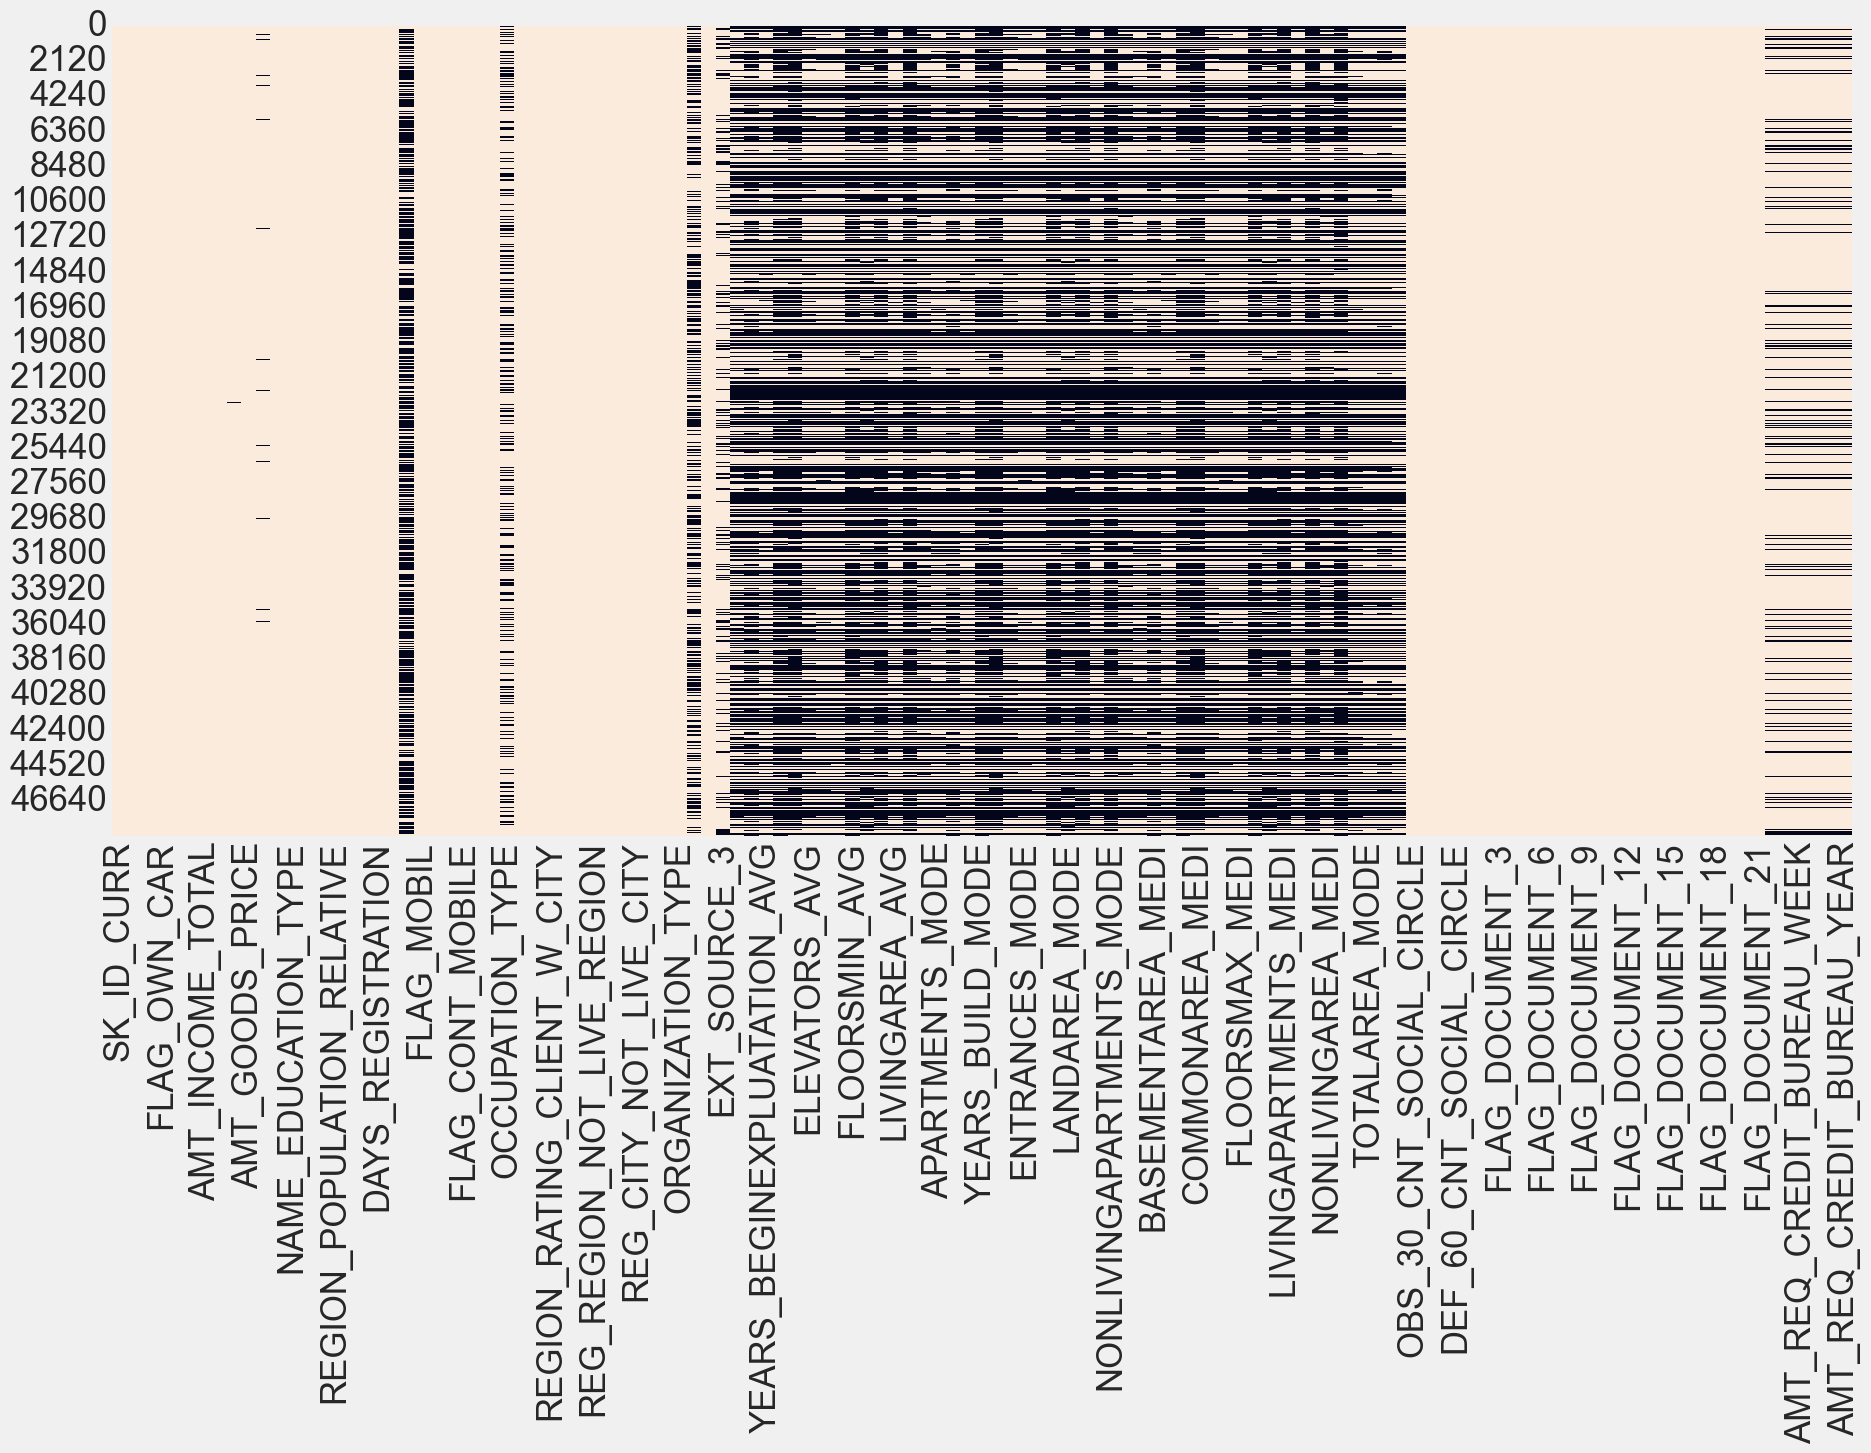

File:  POS_CASH_balance


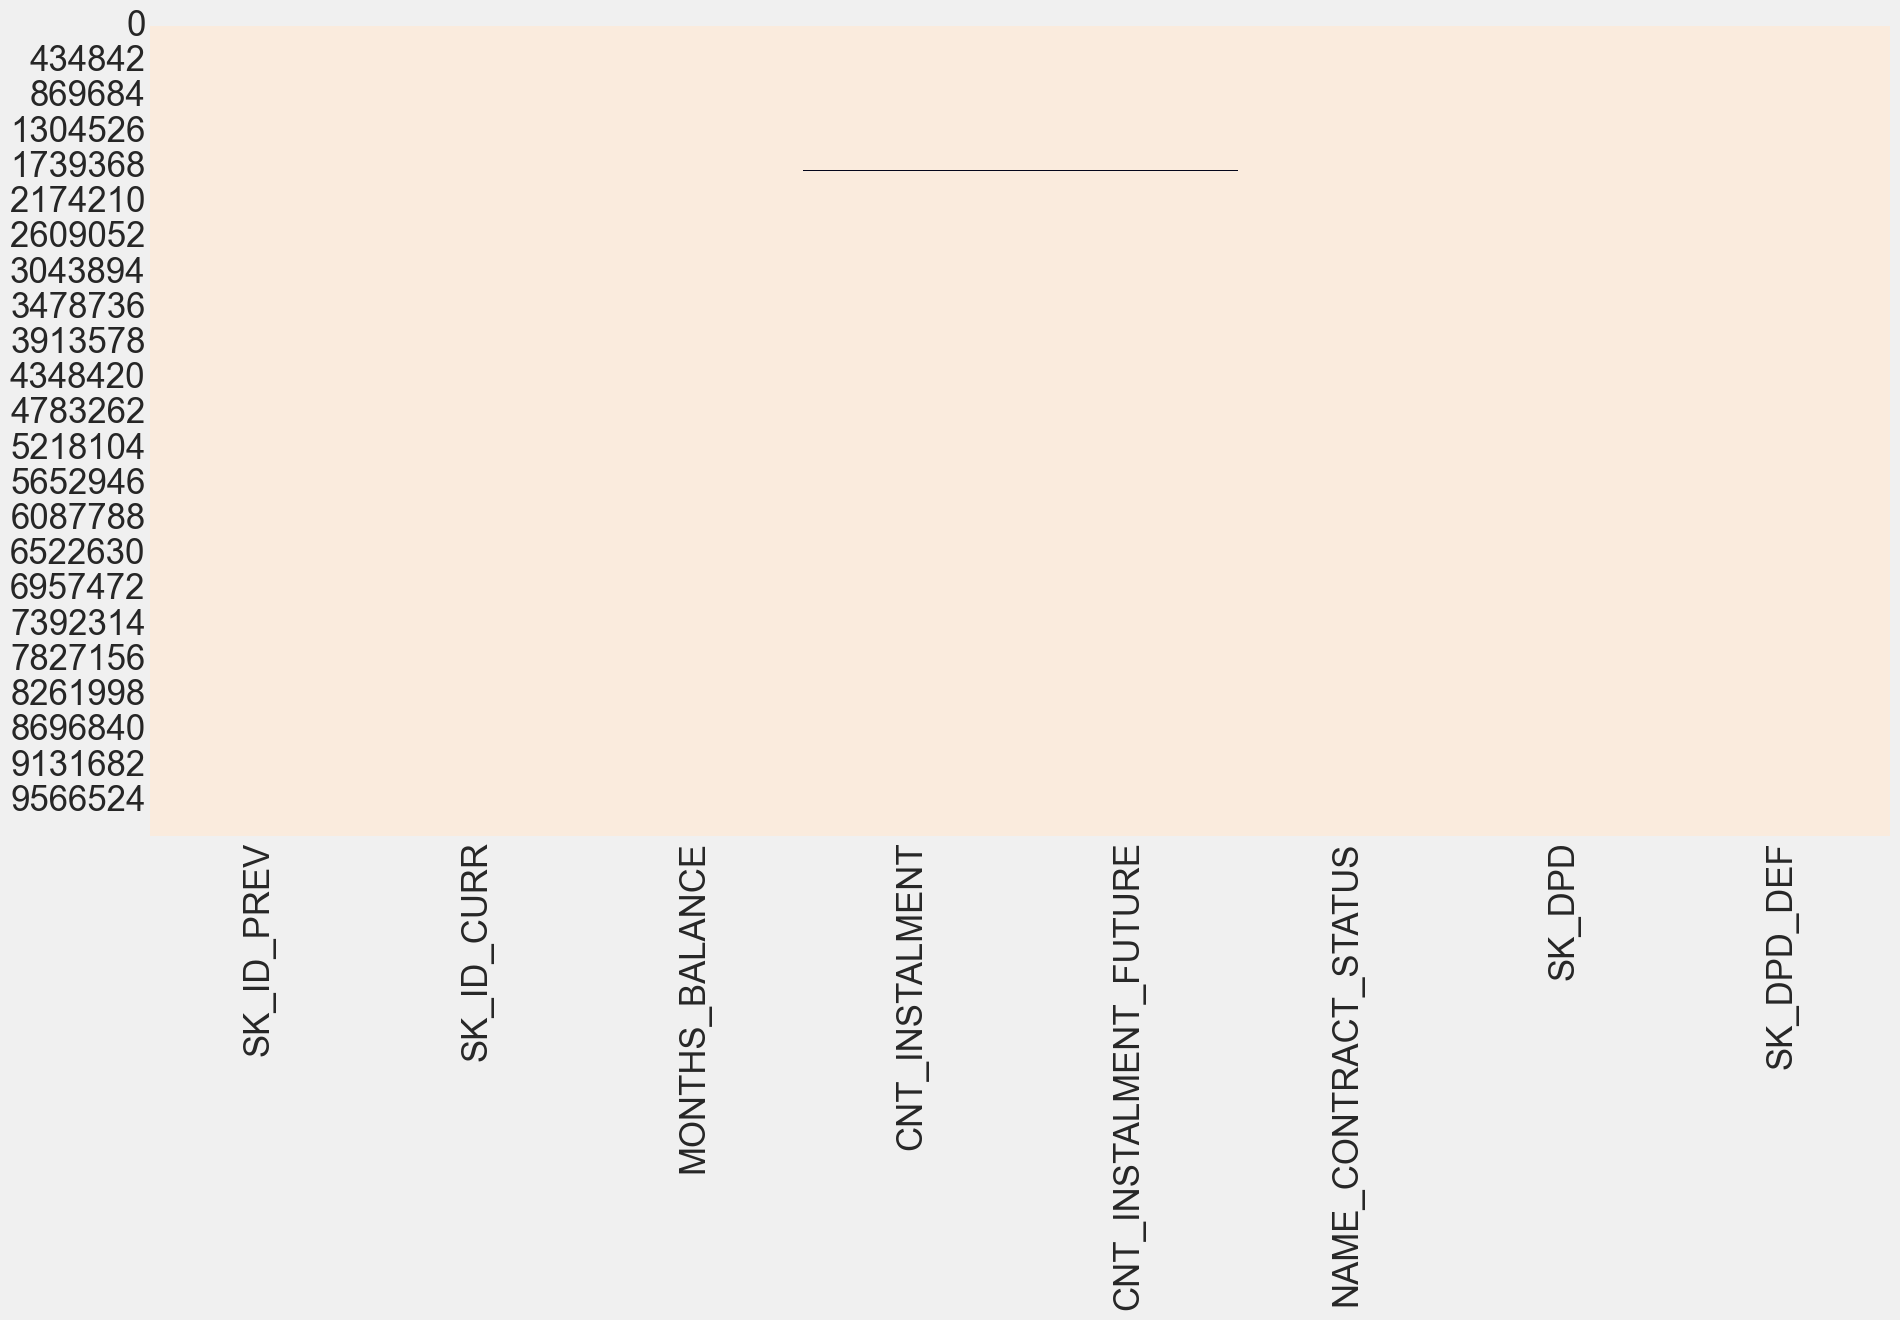

File:  credit_card_balance


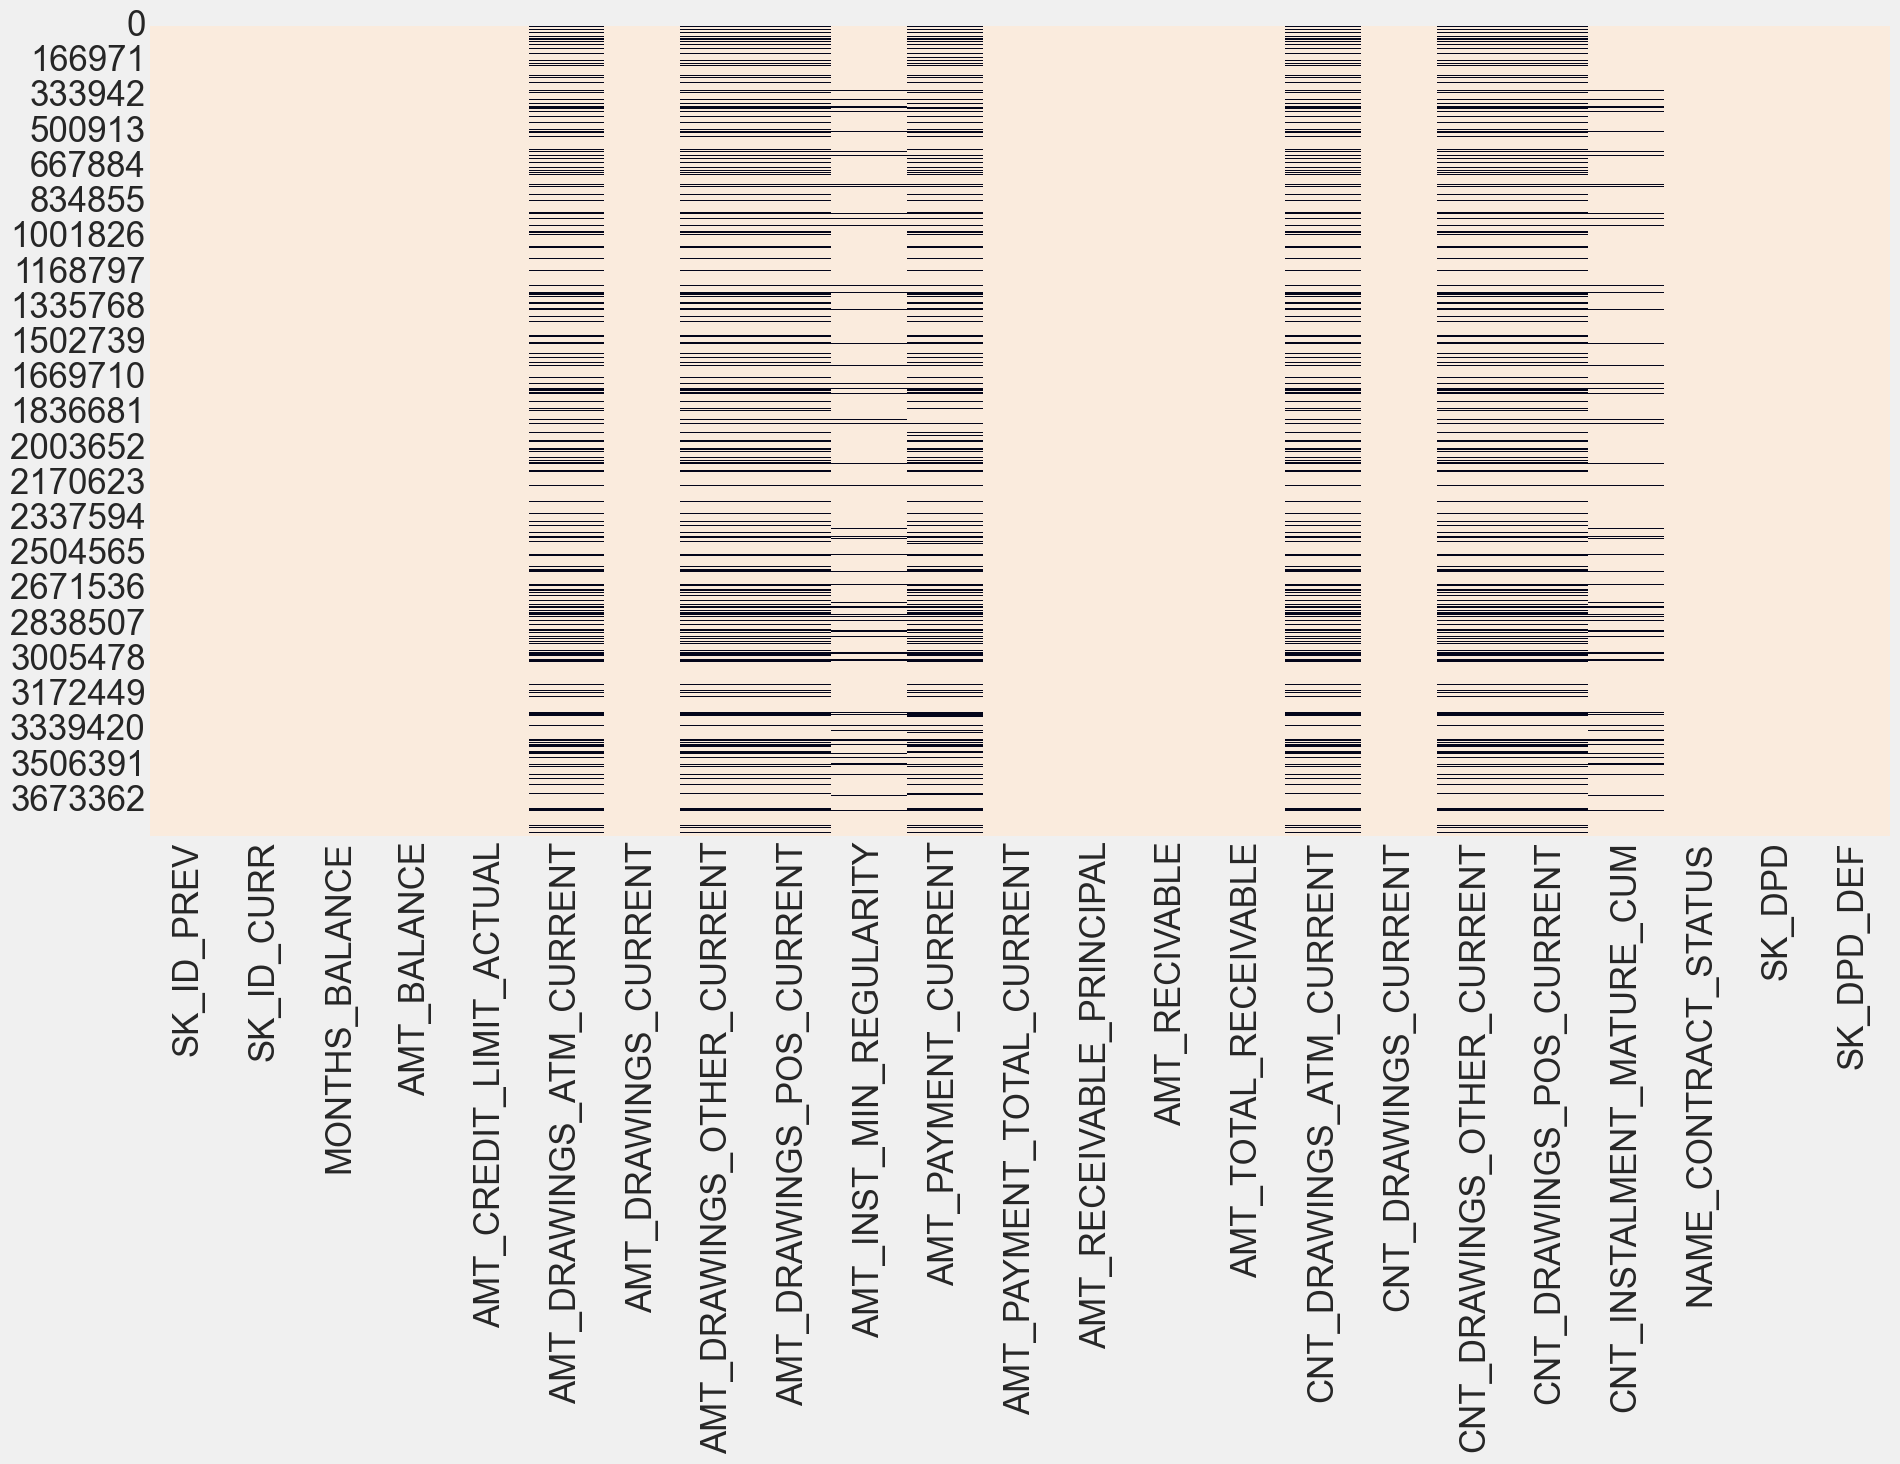

File:  installments_payments


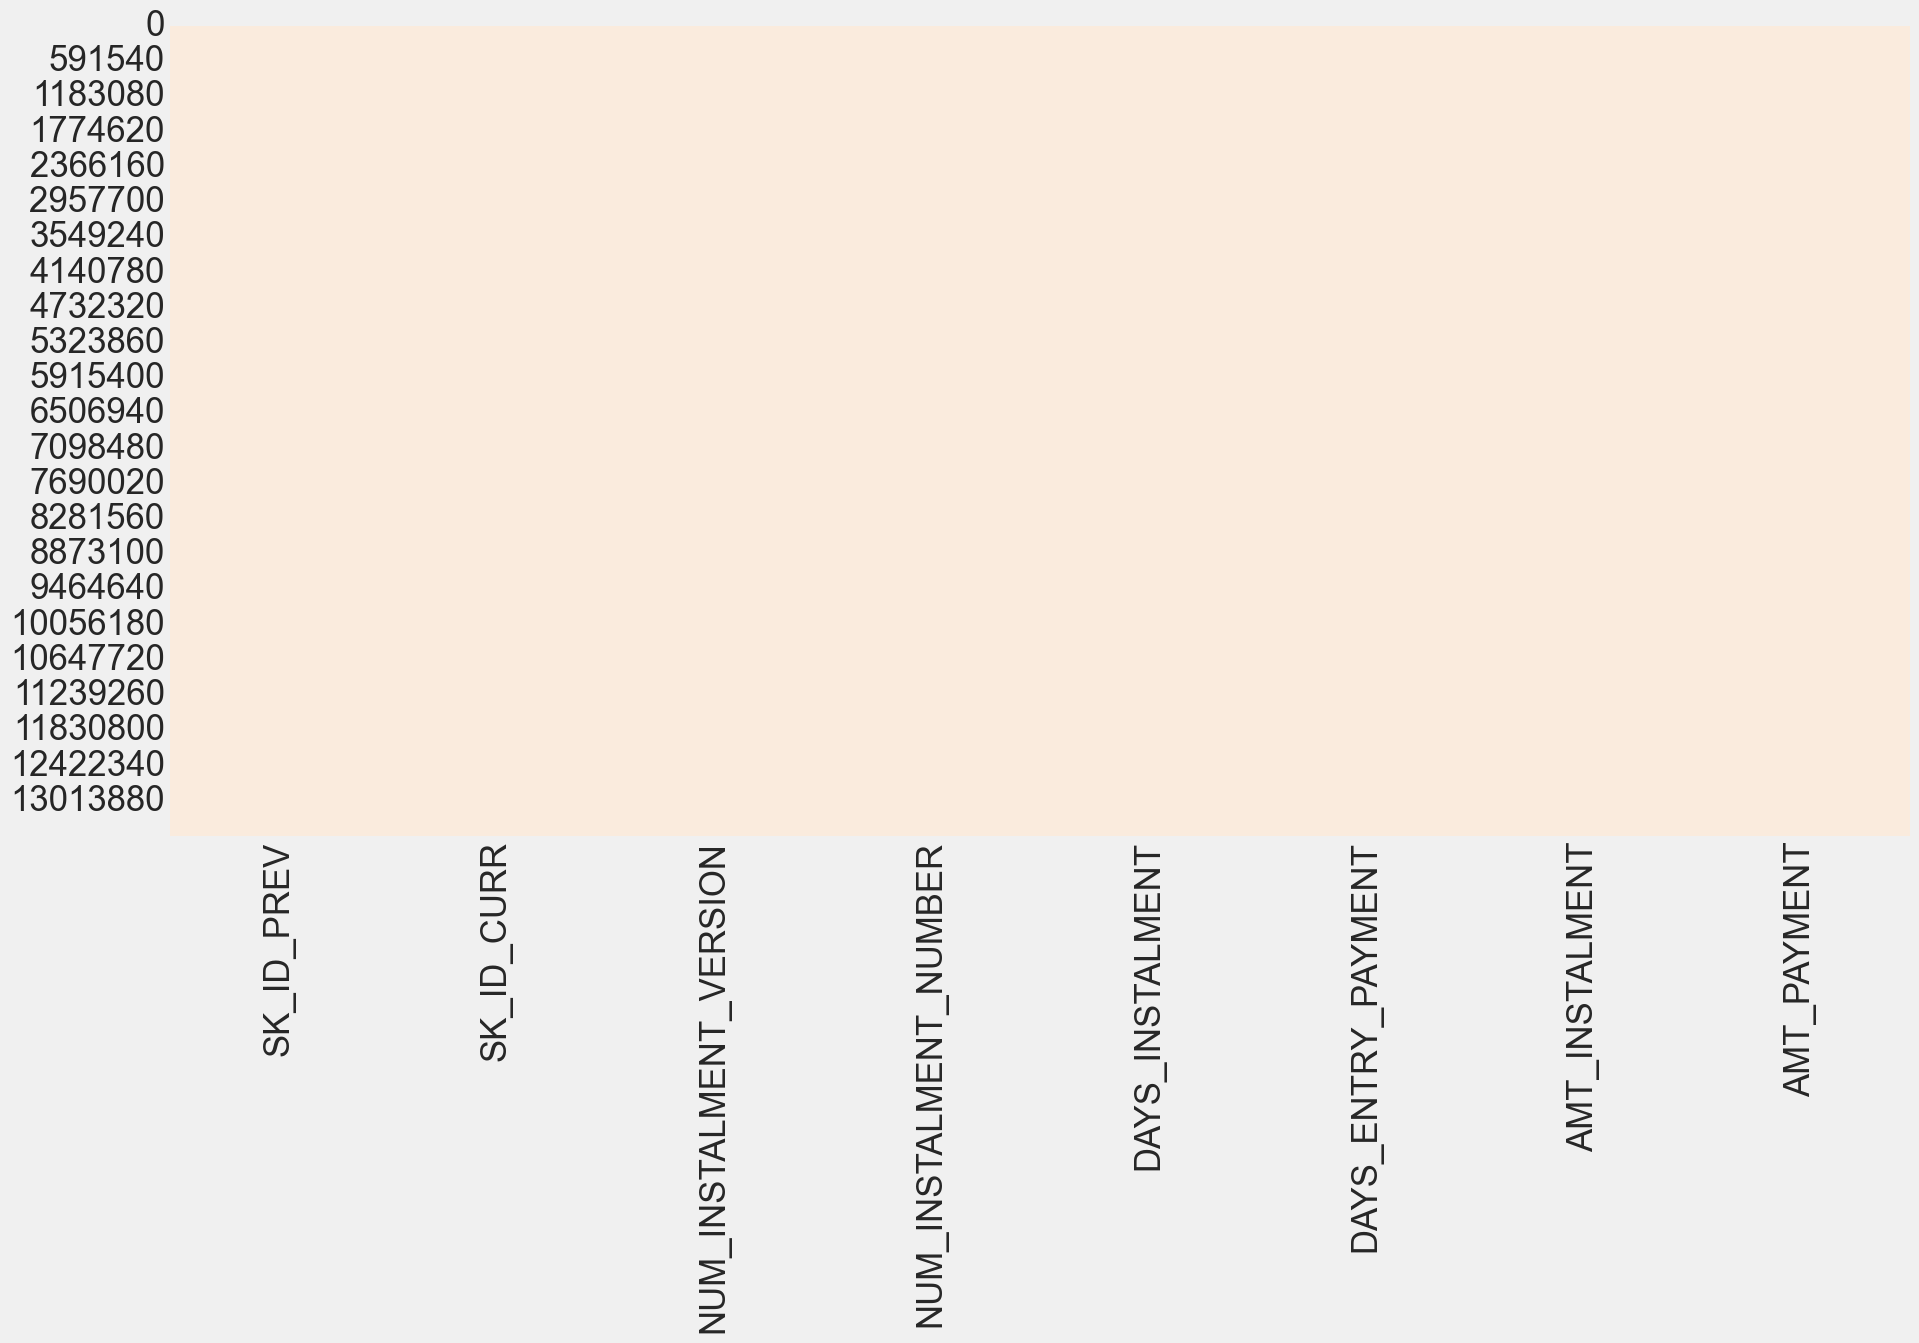

File:  application_train


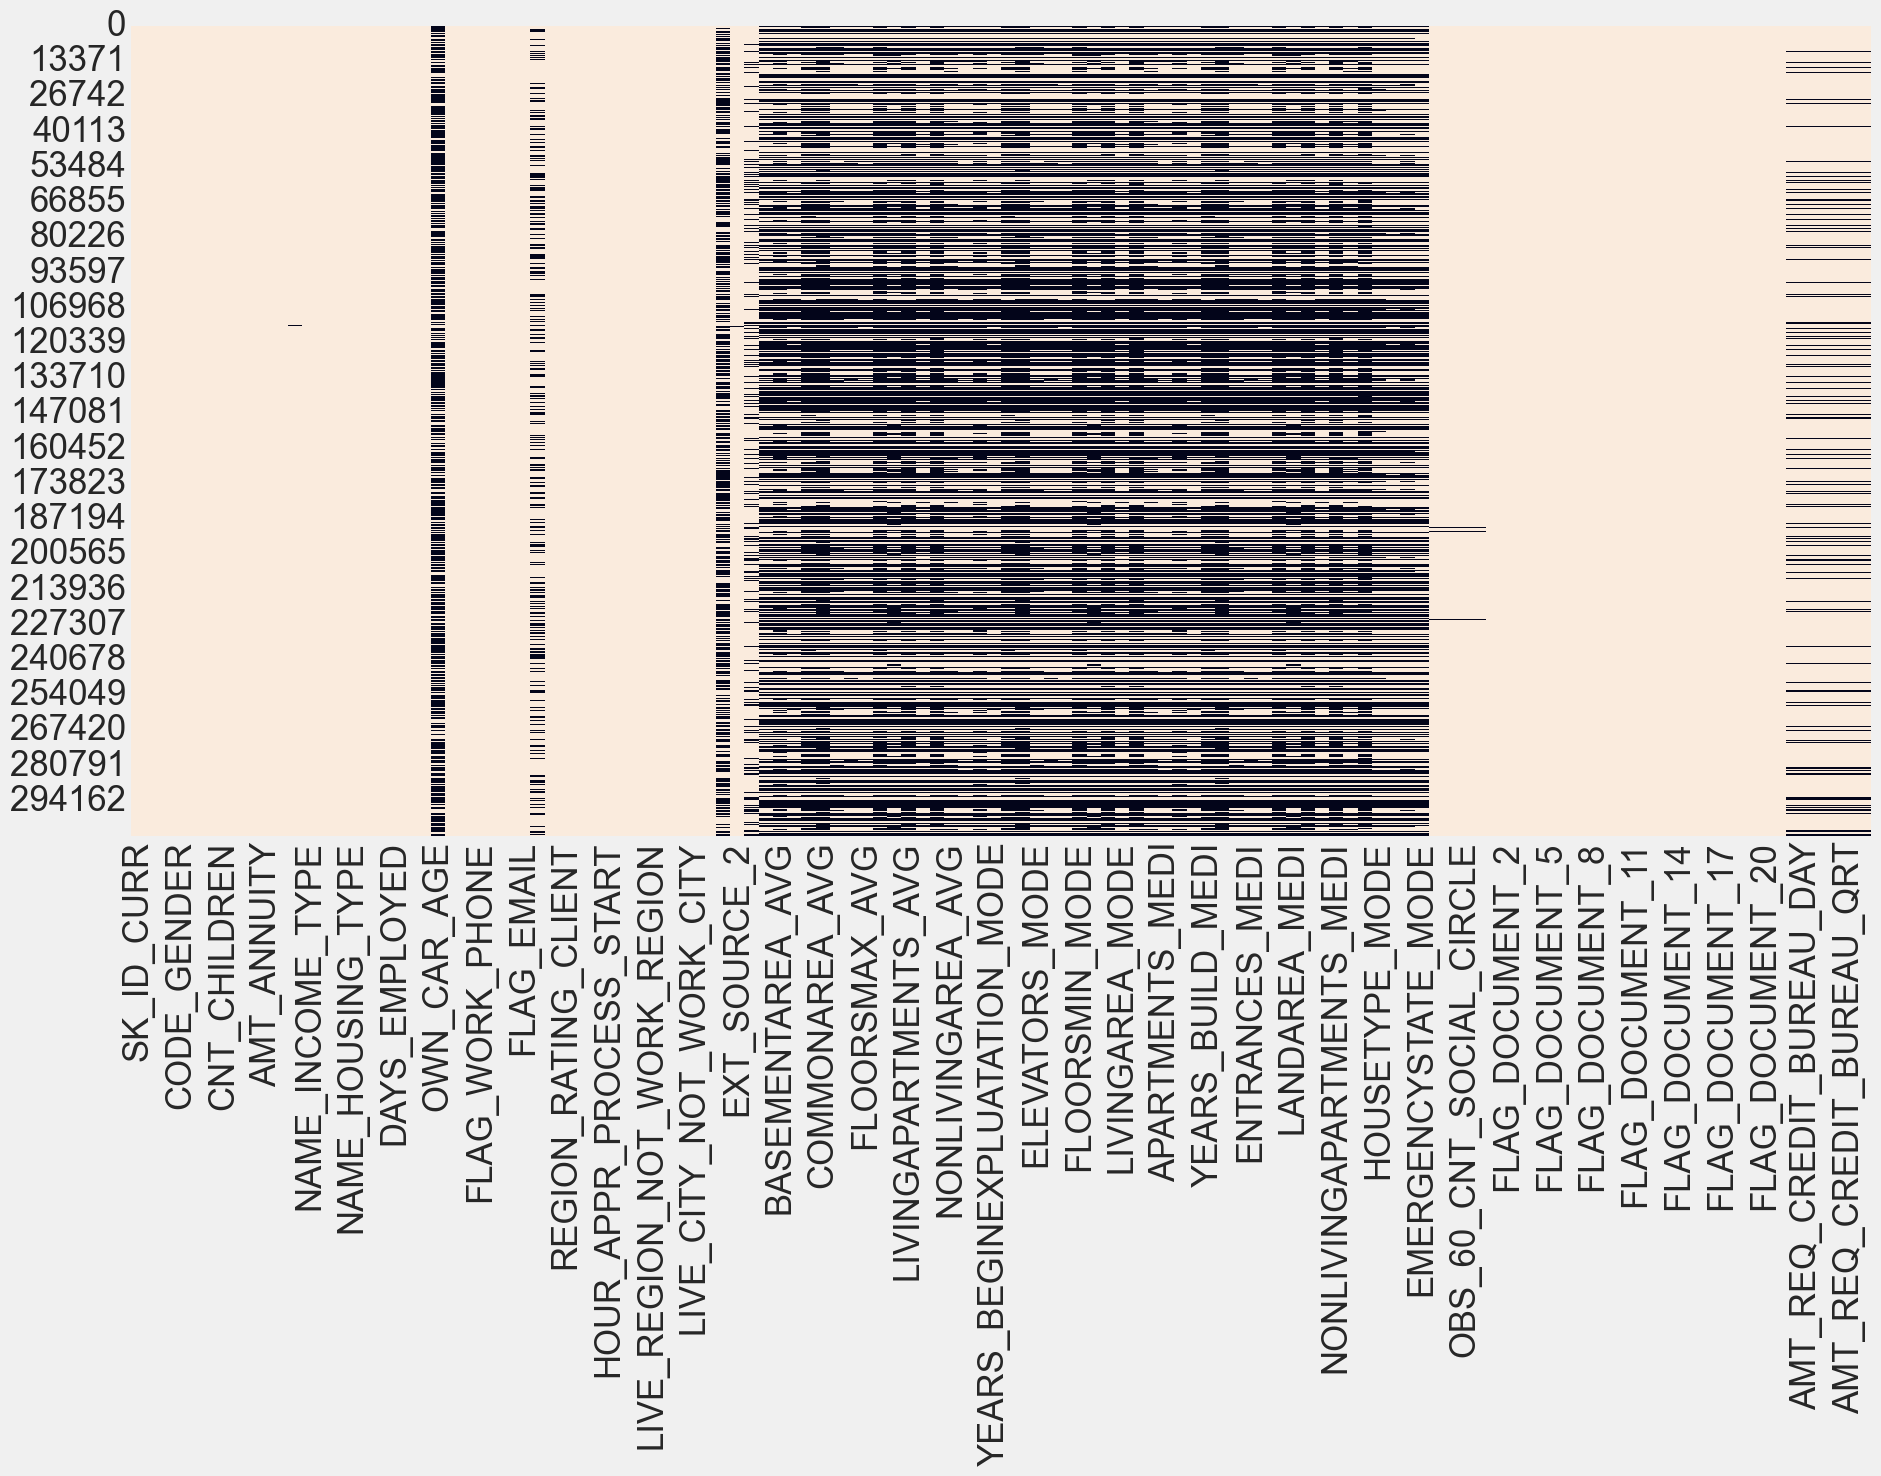

File:  bureau


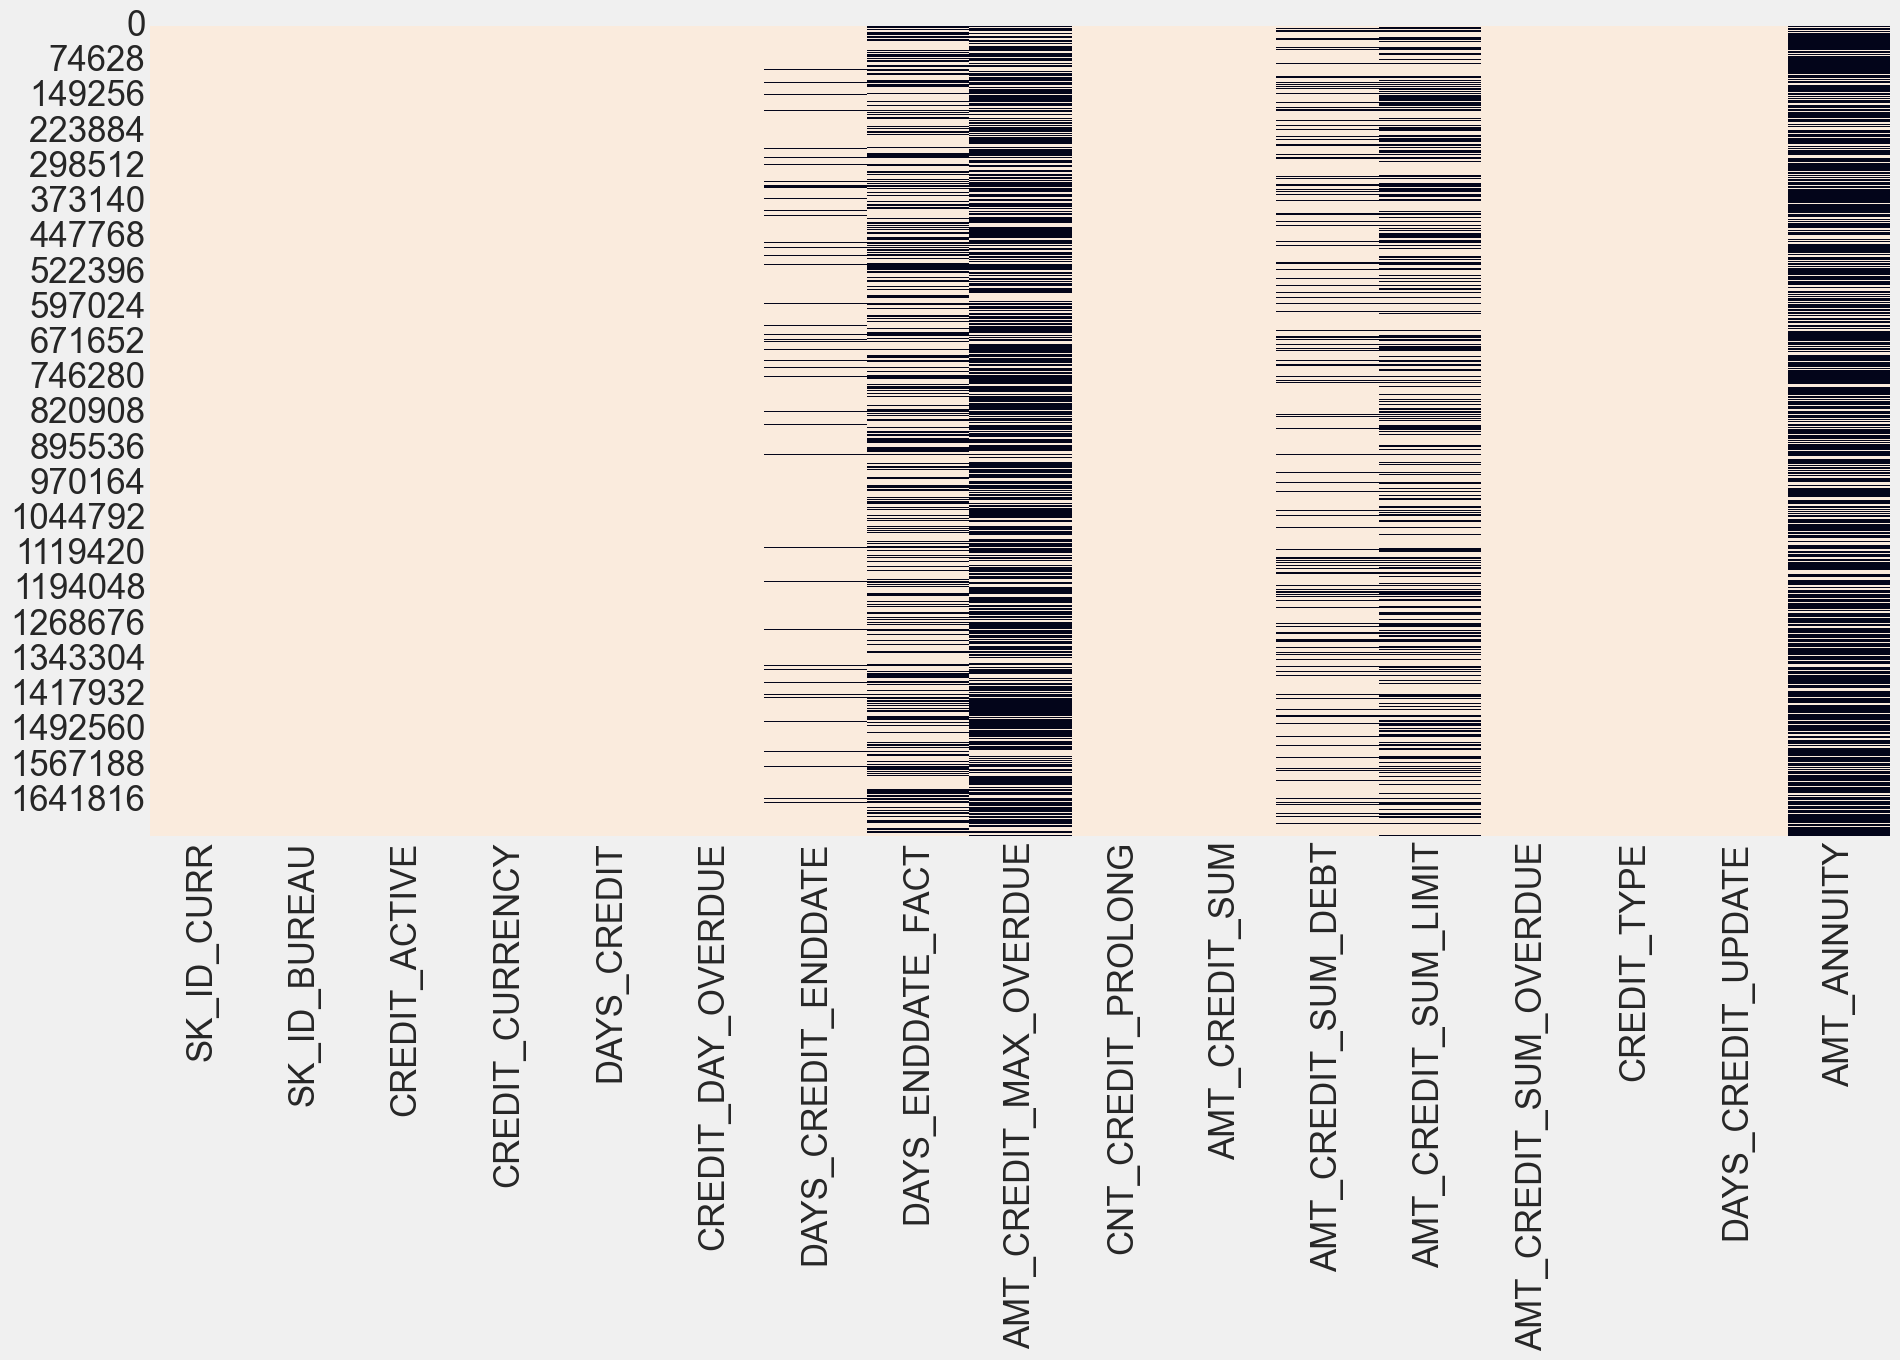

File:  previous_application


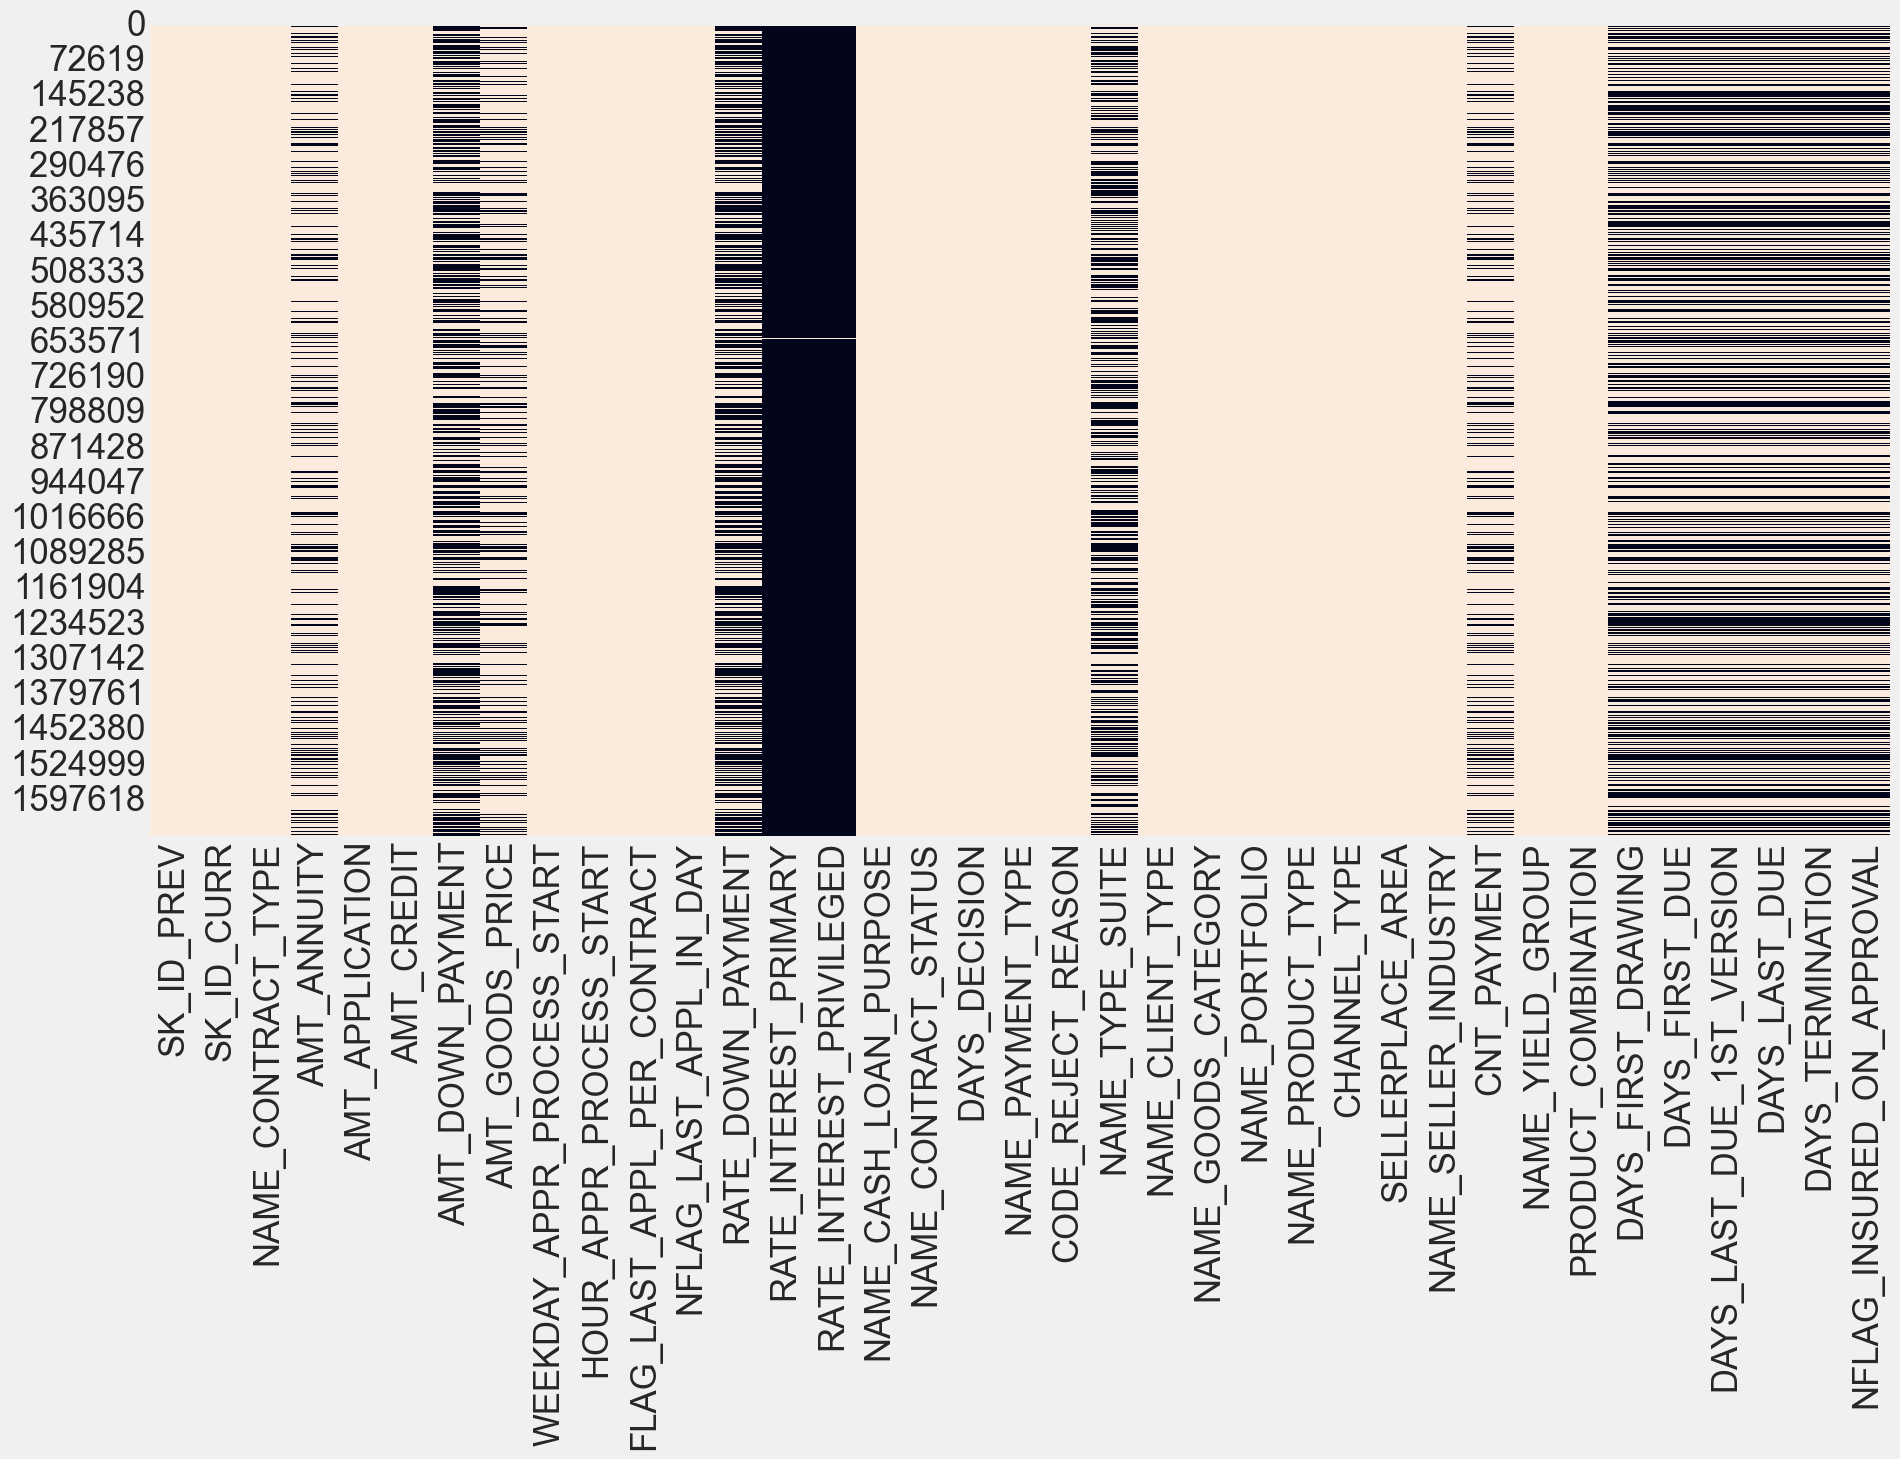

File:  bureau_balance


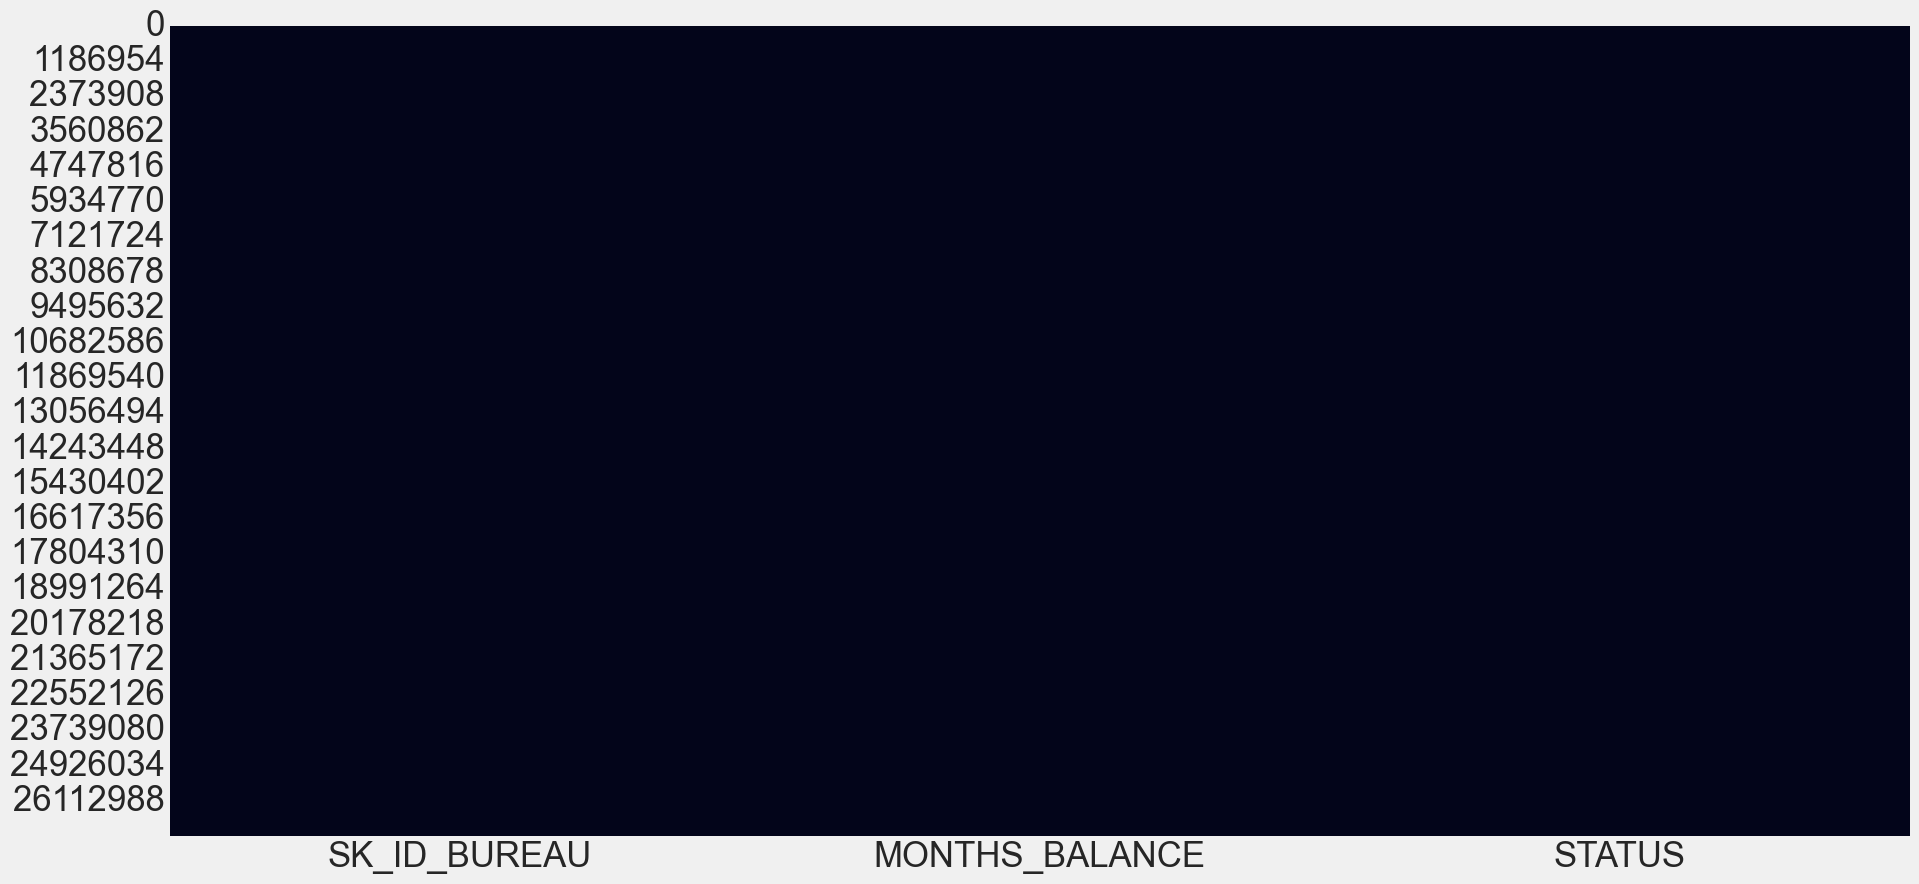

File:  sample_submission


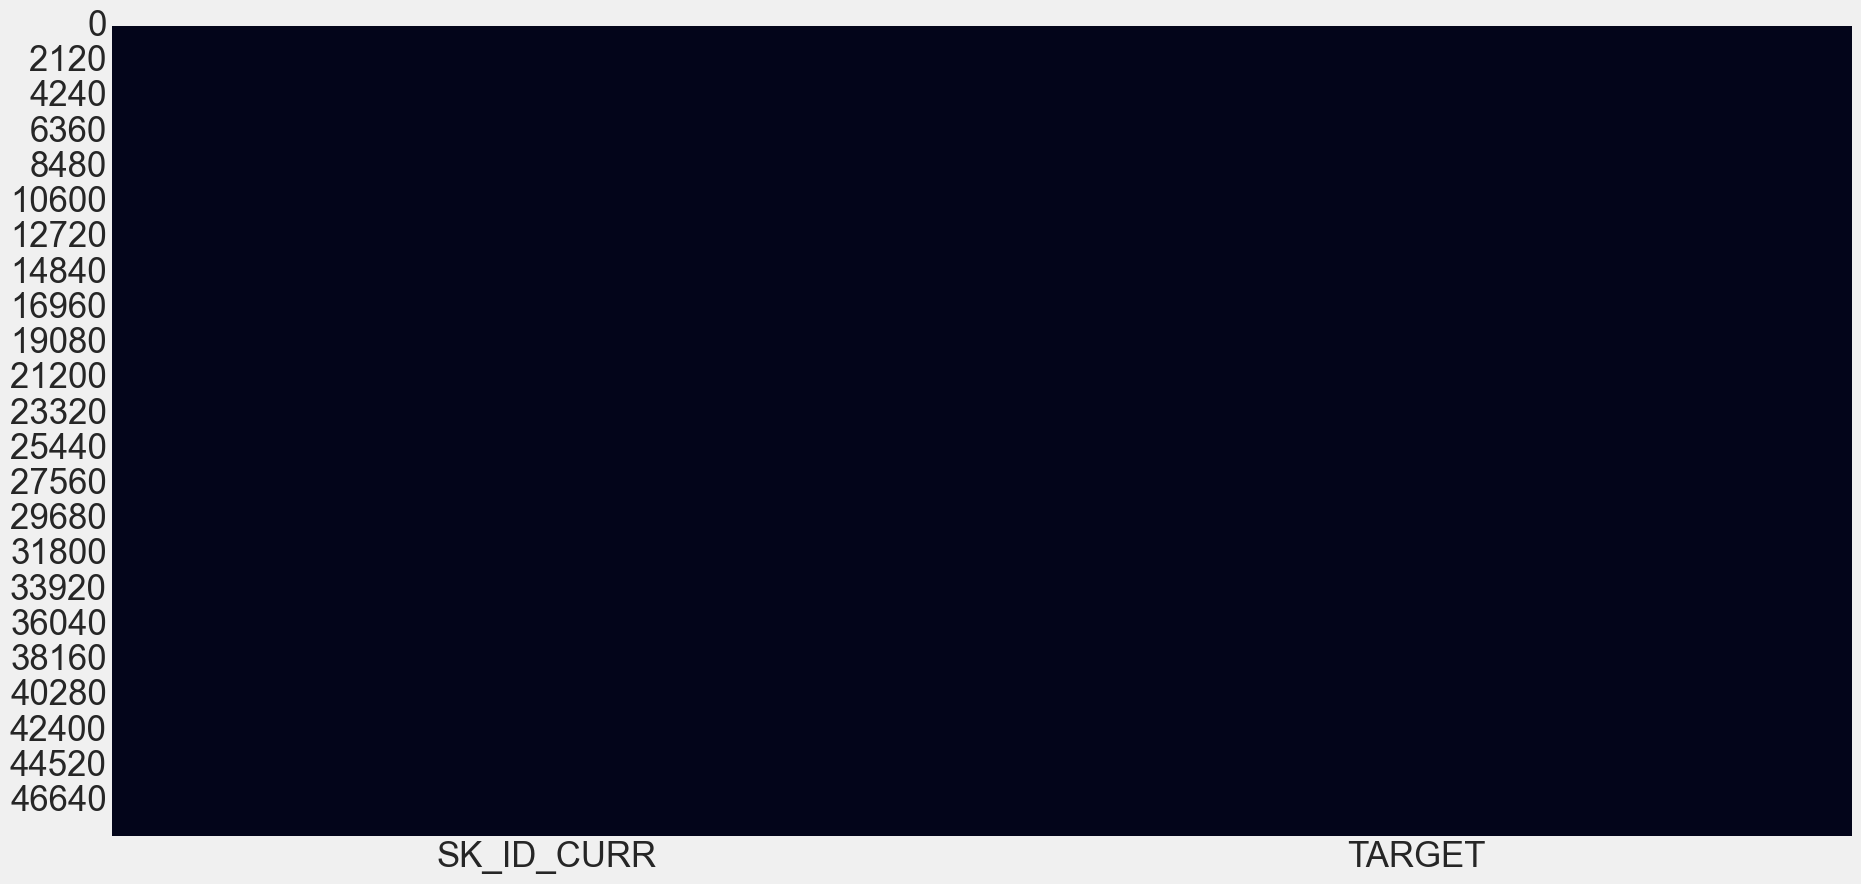

In [250]:
# Checking missing values
for file in files:
    if file != 'HomeCredit_columns_description.csv':
        df = globals().get('data_' + file[:-4])
        if df is not None:
            print('File: ', file[:-4])
            plt.figure(figsize=(20,10))
            sns.heatmap(df.notna(), cbar=False)
            plt.show()

In [251]:
for file in files:
    if file != 'HomeCredit_columns_description.csv':
        df = globals().get('data_' + file[:-4])
        if df is not None:
            print('File: ', file[:-4])
            nan_values = df.isna().sum().sum()
            print('Missing values = {} ({:.2%})'.format(nan_values, nan_values/df.size))
            print('\n')

File:  application_test
Missing values = 1404419 (23.81%)


File:  POS_CASH_balance
Missing values = 52158 (0.07%)


File:  credit_card_balance
Missing values = 5877356 (6.65%)


File:  installments_payments
Missing values = 5810 (0.01%)


File:  application_train
Missing values = 9152465 (24.40%)


File:  bureau
Missing values = 3939947 (13.50%)


File:  previous_application
Missing values = 11109336 (17.98%)


File:  bureau_balance
Missing values = 0 (0.00%)


File:  sample_submission
Missing values = 0 (0.00%)




In [252]:
# Checking for duplicates

for file in files:
    if file != 'HomeCredit_columns_description.csv':
        df = globals().get('data_' + file[:-4])
        if df is not None:
            print('File: ', file[:-4])
            duplicates = df.duplicated()
            print(str(df[duplicates].size) + ' duplicates found in the dataset ' + file[:-4])
            print('\n')

File:  application_test
0 duplicates found in the dataset application_test


File:  POS_CASH_balance
0 duplicates found in the dataset POS_CASH_balance


File:  credit_card_balance
0 duplicates found in the dataset credit_card_balance


File:  installments_payments
0 duplicates found in the dataset installments_payments


File:  application_train
0 duplicates found in the dataset application_train


File:  bureau
0 duplicates found in the dataset bureau


File:  previous_application
0 duplicates found in the dataset previous_application


File:  bureau_balance
0 duplicates found in the dataset bureau_balance


File:  sample_submission
0 duplicates found in the dataset sample_submission




In [253]:
# Check for duplicates on ID
for file in files:
    if file != 'HomeCredit_columns_description.csv':
        df = globals().get('data_' + file[:-4])
        if df is not None:
            print('File: ', file[:-4])
            if 'SK_ID_CURR' in df.columns: 
                duplicates = df.duplicated(subset='SK_ID_CURR')
                print(str(df[duplicates].size) + ' duplicates found in the column SK_ID_CURR')
            else:
                print('Dataset ' + file + ' does not have column SK_ID_CURR')
            print('\n')

File:  application_test
0 duplicates found in the column SK_ID_CURR


File:  POS_CASH_balance
77312848 duplicates found in the column SK_ID_CURR


File:  credit_card_balance
85945342 duplicates found in the column SK_ID_CURR


File:  installments_payments
106126512 duplicates found in the column SK_ID_CURR


File:  application_train
0 duplicates found in the column SK_ID_CURR


File:  bureau
23980489 duplicates found in the column SK_ID_CURR


File:  previous_application
49260209 duplicates found in the column SK_ID_CURR


File:  bureau_balance
Dataset bureau_balance.csv does not have column SK_ID_CURR


File:  sample_submission
0 duplicates found in the column SK_ID_CURR




It is normal that datasets application_test, application_train, and sample_submission don't have any duplicates, because each client is unique. On the other hand, it is normal that the other datasets have duplicates, because they are related to client's behavior, except bureau_balance.

#### EDA application_{train|test}.csv

In [254]:
# Set useful variables
TARGET = 'TARGET'
ID = 'SK_ID_CURR'

In [255]:
print('Training Features shape: ', data_application_train.shape)
print('Testing Features shape: ', data_application_test.shape)

Training Features shape:  (307511, 122)
Testing Features shape:  (48744, 121)


In [256]:
# Check if 'TARGET' is the only difference ;-)
display(data_application_train.columns.difference(data_application_test.columns))
print('Check theses two files for Train (with TARGET) and Test (without TARGET)')

Index(['TARGET'], dtype='object')

Check theses two files for Train (with TARGET) and Test (without TARGET)


##### TARGET distribution

TARGET: 
- 0: if the loan was repaid on time
- 1: if the loan was not repaid / client had problems to repay

In [257]:
# Distribution of the Target Column
data_application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

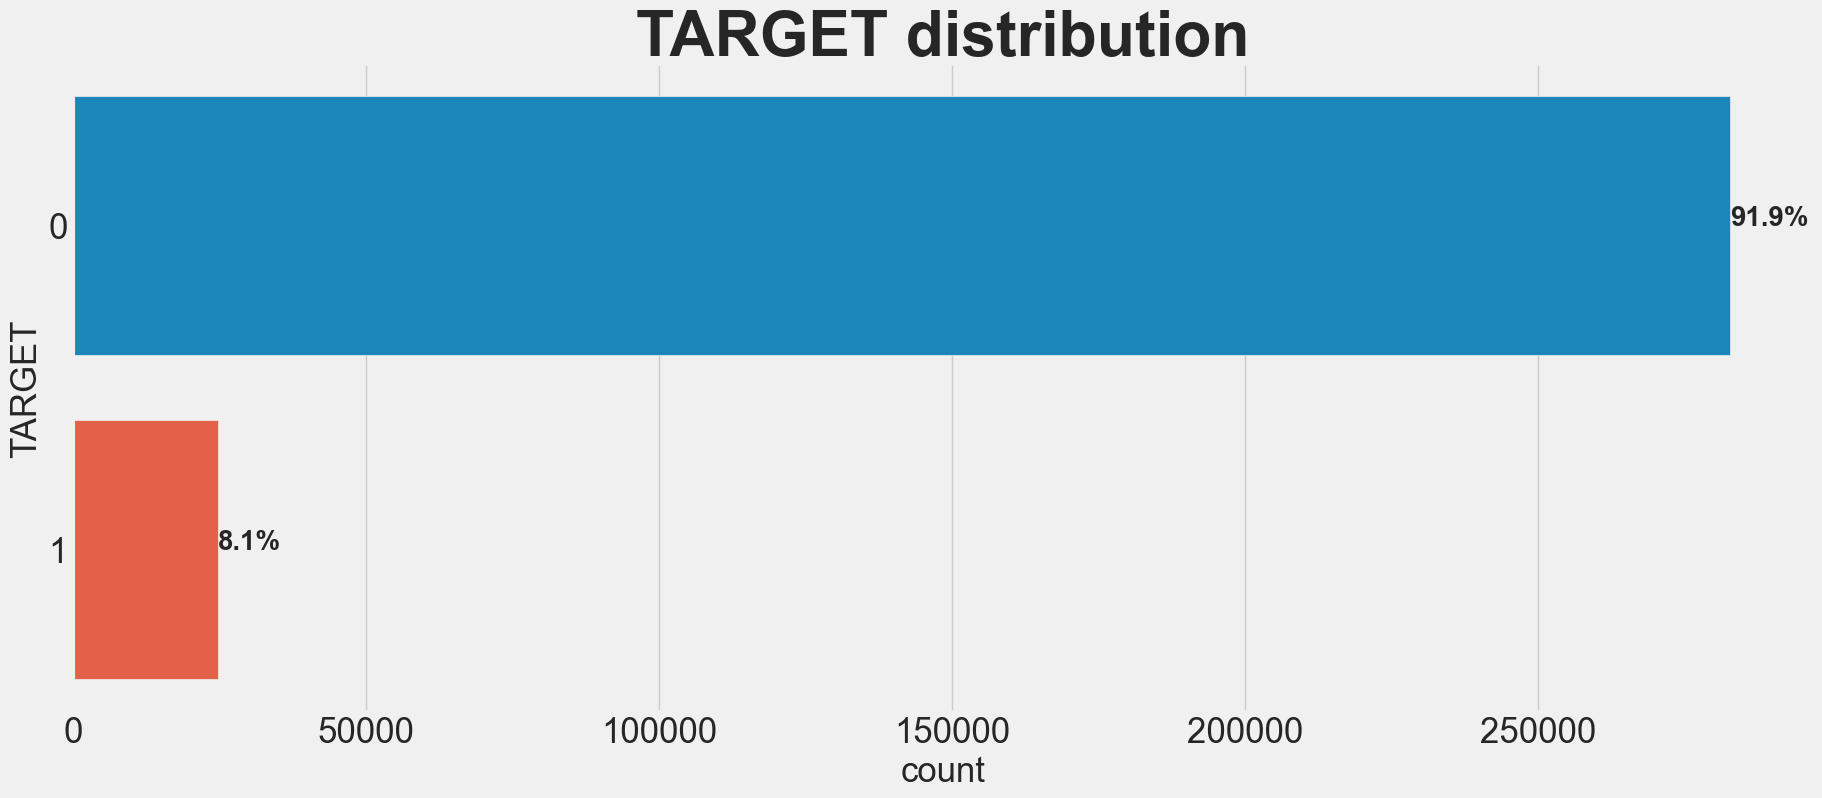

In [258]:
ax, fig = plt.subplots(figsize=(20,8)) 
ax = sns.countplot(y='TARGET', data=data_application_train)
ax.set_title('TARGET distribution')

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(data_application_train.TARGET))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')
        
plt.show()

We observe an imbalance between the classes, there are more reimbursed loans than otherwise. 
The classes should be weighted by their representations to reflect this imbalace during the modelling.

##### Check column types to think about how to encode them

In [259]:
# Number of each type of column
data_application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [260]:
# Number of unique classes in each object column
data_application_train.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Most object columns have a small amount of unique values --> think how to encode them

##### How to deal with missing values

Ensemble models can deal with missing values without imputation.
Otherwise, many option are available: 
- replace NaN
- drop column with high % of missing values
For now we keep them as they are

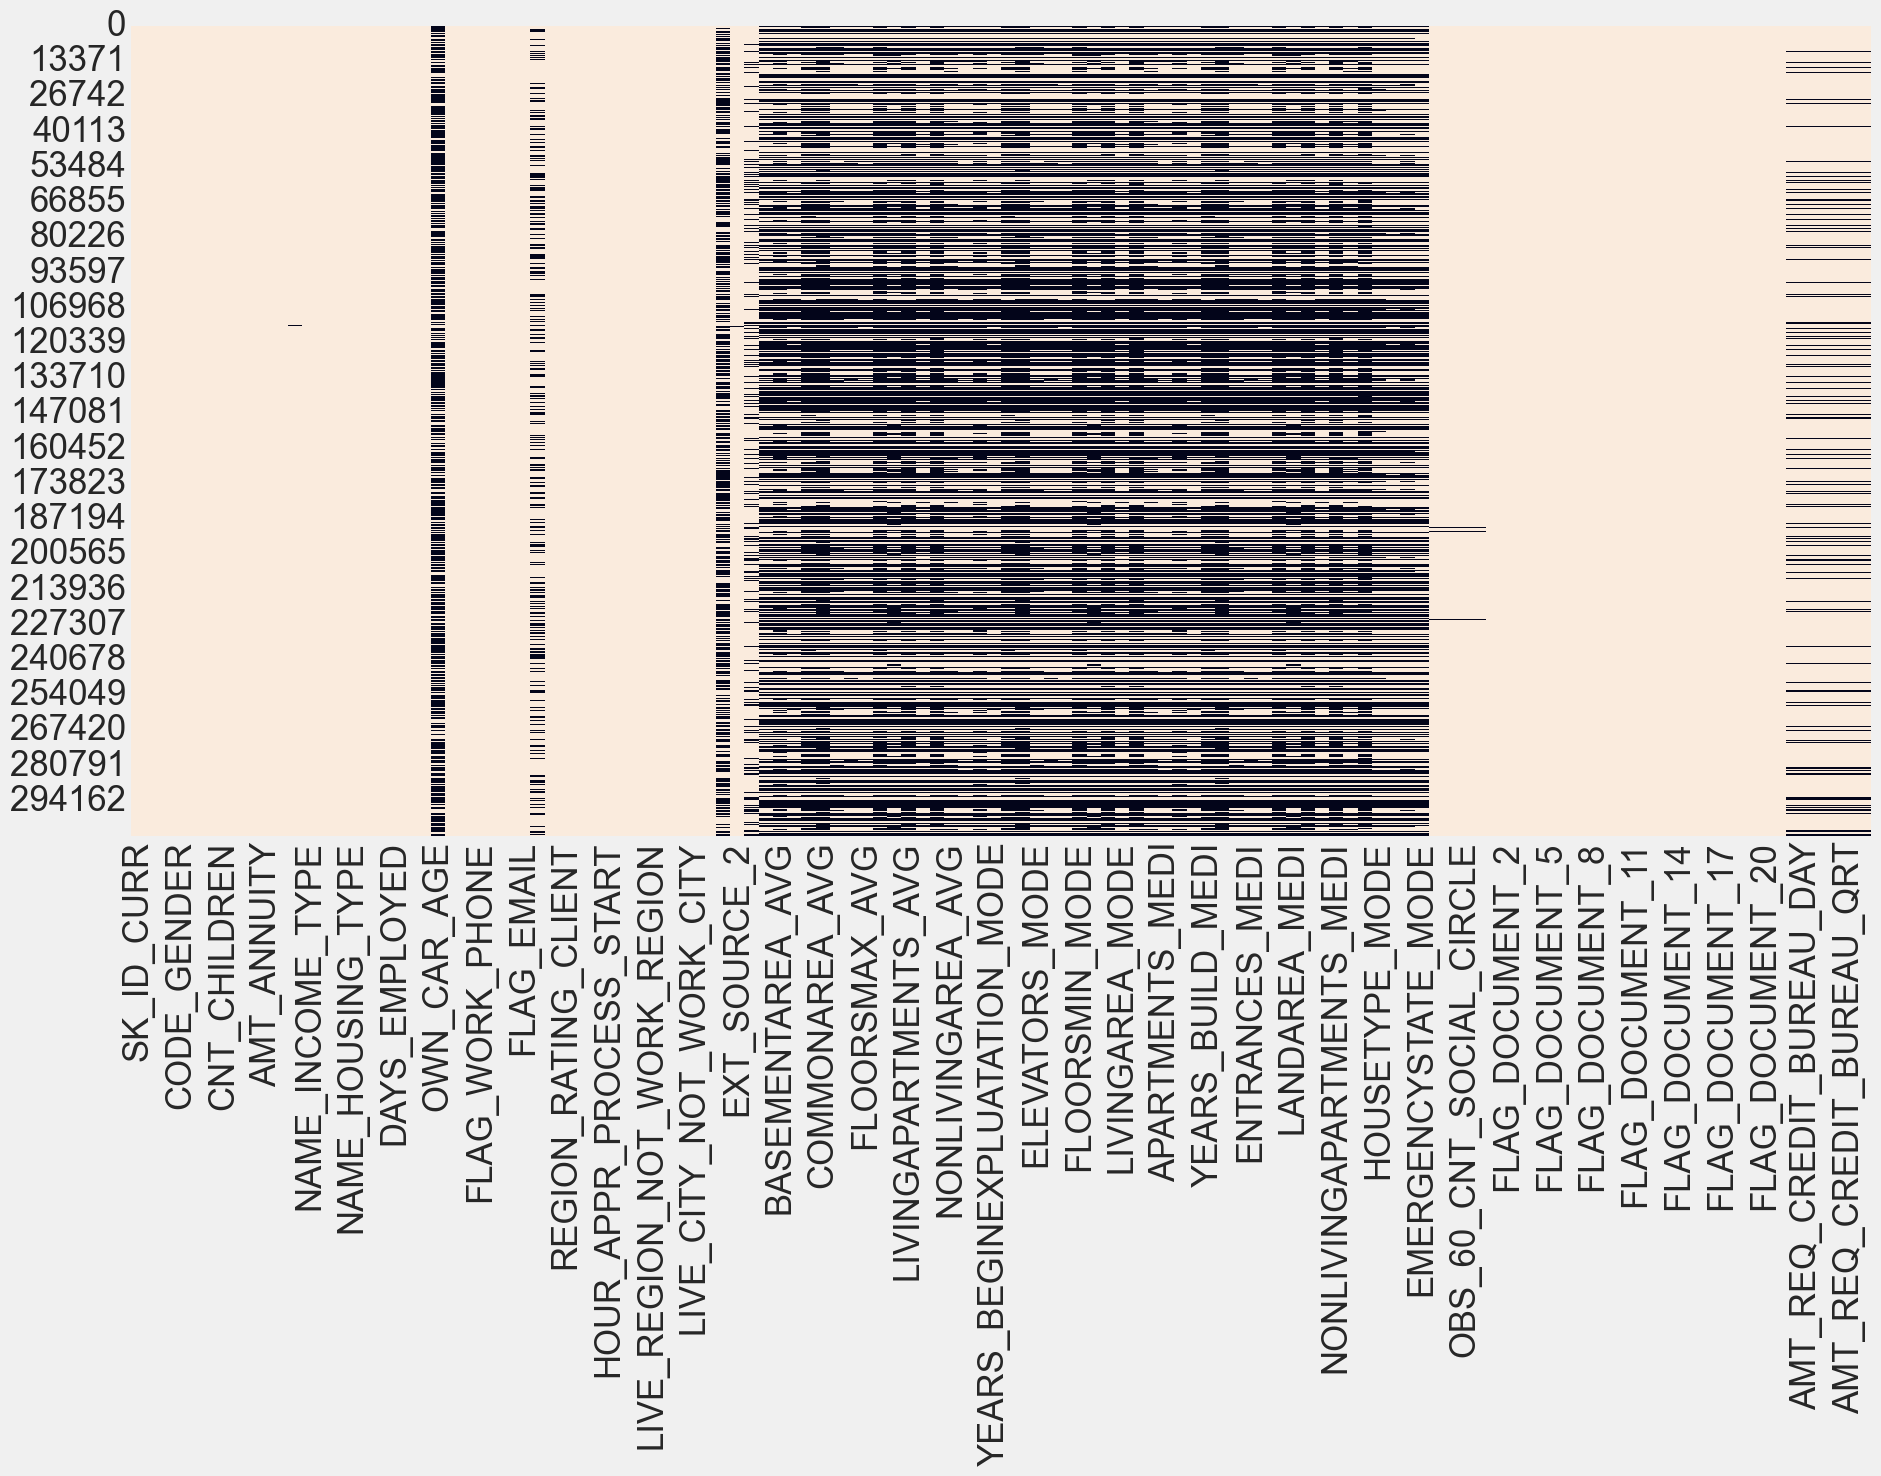

In [261]:
# Recalling the missing values 
plt.figure(figsize=(20,10))
sns.heatmap(data_application_train.notna(), cbar=False)
plt.show()

Most missing data come from housing info not from loan info (as we can see from the TOP 10)

In [262]:
print('TOP 10 Missing values from Training dataset')
nan_check(data_application_train)[:10]

TOP 10 Missing values from Training dataset


Total      %
COMMONAREA_MEDI           214865  69.87
COMMONAREA_AVG            214865  69.87
COMMONAREA_MODE           214865  69.87
NONLIVINGAPARTMENTS_MODE  213514  69.43
NONLIVINGAPARTMENTS_AVG   213514  69.43
NONLIVINGAPARTMENTS_MEDI  213514  69.43
FONDKAPREMONT_MODE        210295  68.39
LIVINGAPARTMENTS_MODE     210199  68.35
LIVINGAPARTMENTS_AVG      210199  68.35
LIVINGAPARTMENTS_MEDI     210199  68.35

In [263]:
print('Nb of columns in the training sample: ' + str(len(nan_check(data_application_train))))

print('Nb of columns in the training sample with missing values: ' + 
      str(len(nan_check(data_application_train)[nan_check(data_application_train)['Total']!=0])))

Nb of columns in the training sample: 122
Nb of columns in the training sample with missing values: 67


##### Checking outliers, atypical and unusual values

In [264]:
# Client's age in days at the time of application (def. from HomeCredit_columns_description.csv)
data_application_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Values in days_birth are negatives, because they are recorded regarding the current loan request. 
We should modify this variable so it would be more understandable for the analysis.

In [265]:
(data_application_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

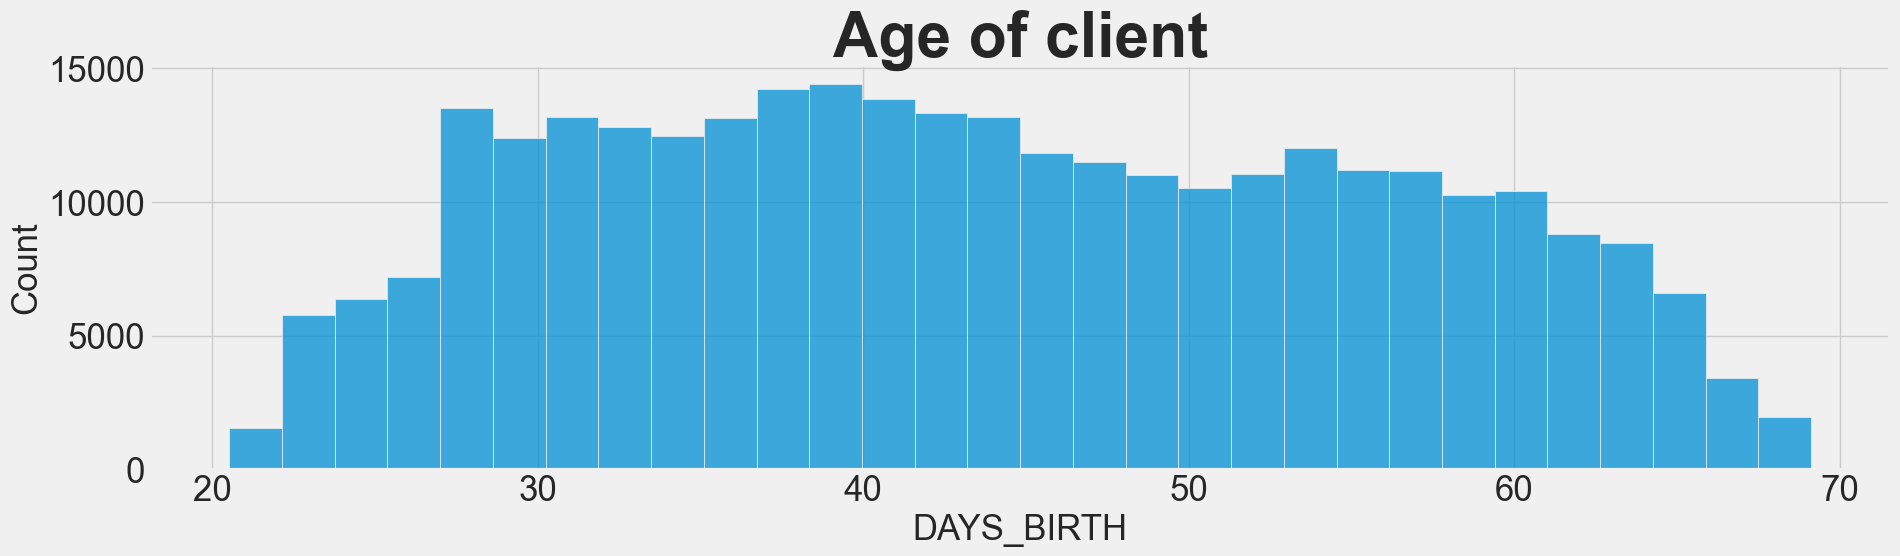

In [266]:
data_application_train['EST_AGE'] = (data_application_train['DAYS_BIRTH']/-365)
plt.figure(figsize=(20, 5))
sns.histplot((data_application_train['DAYS_BIRTH'] / -365), bins = 30).set_title('Age of client')
plt.show()

In [267]:
# How many days before the application the perso... (def. from HomeCredit_columns_description.csv)
data_application_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [268]:
data_application_test['DAYS_EMPLOYED'].describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

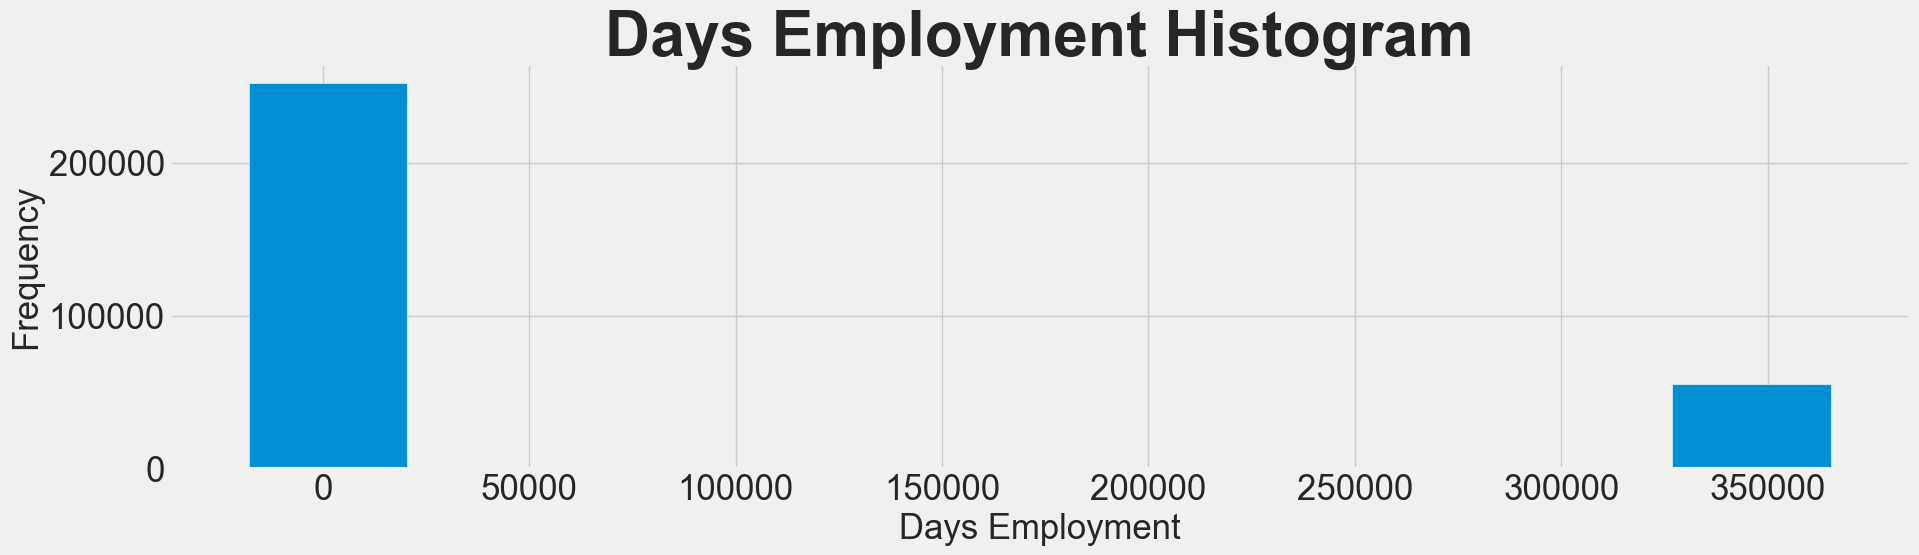

In [269]:
data_application_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram', figsize=(20,5))
plt.xlabel('Days Employment')
plt.show()

This is not normal, max represents 1000 years. Is it an isolated case? Many individuals?

In [270]:
print('%0.0f values with 365243 days employed for training data' % 
      len(data_application_train[data_application_train['DAYS_EMPLOYED'] > 350000]))
print('%0.0f Total values from days employed for training data' % data_application_train.shape[0])
print('***********************')
print('%0.0f values with 365243 days employed for testing data' % 
      len(data_application_test[data_application_test['DAYS_EMPLOYED'] > 350000]))
print('%0.0f Total values from days employed for testing data' % data_application_test.shape[0])

55374 values with 365243 days employed for training data
307511 Total values from days employed for training data
***********************
9274 values with 365243 days employed for testing data
48744 Total values from days employed for testing data


In [271]:
# Create an outliers flag column
data_application_train['DAYS_EMPLOYED_OUTLIERS'] = data_application_train['DAYS_EMPLOYED'] == 365243
data_application_test['DAYS_EMPLOYED_OUTLIERS'] = data_application_test['DAYS_EMPLOYED'] == 365243

# Replace outliers values with nan
data_application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
data_application_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

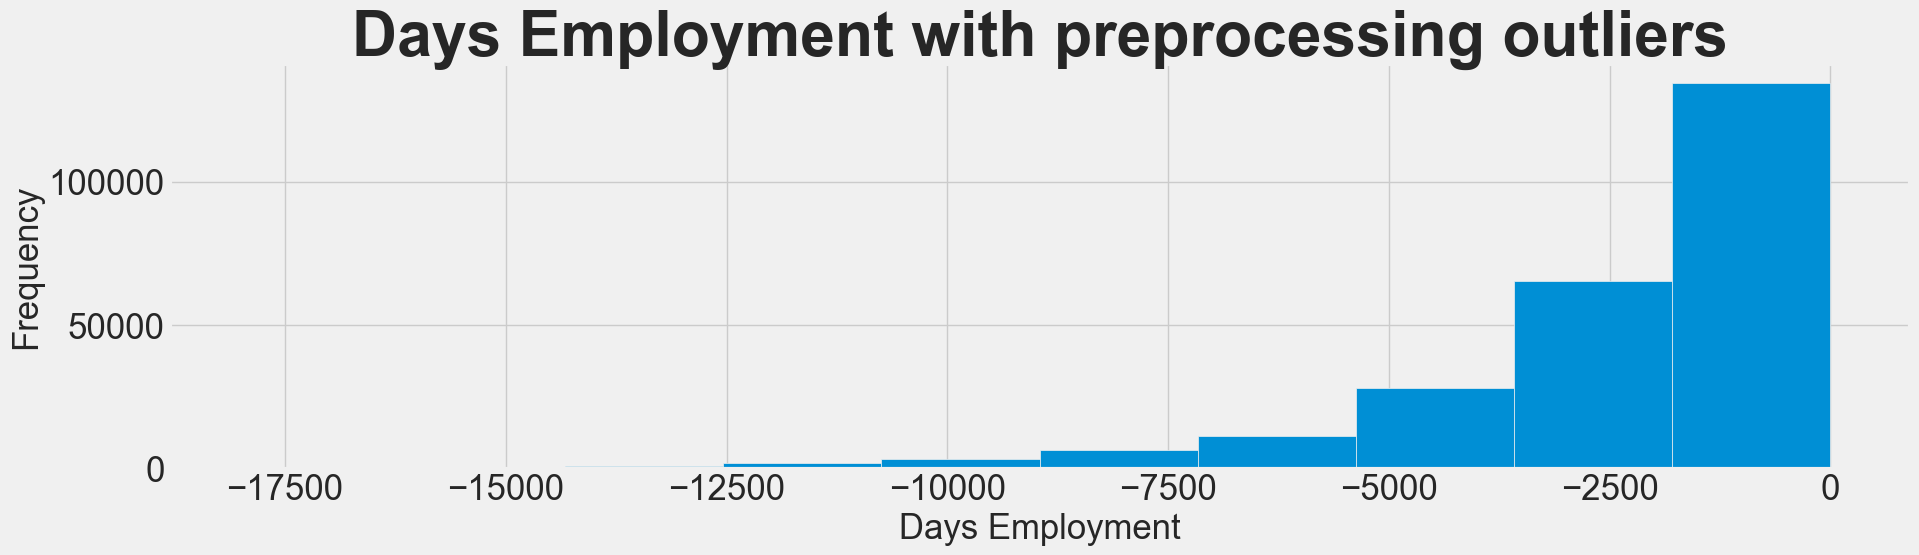

In [272]:
data_application_train['DAYS_EMPLOYED'].plot.hist(title ='Days Employment with preprocessing outliers', figsize=(20,5))
plt.xlabel('Days Employment')
plt.show()

In [273]:
(data_application_train['DAYS_EMPLOYED'] / -365).describe()

count    252137.000000
mean          6.531971
std           6.406466
min          -0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [274]:
(data_application_test['DAYS_EMPLOYED'] / -365).describe()

count    39470.000000
mean         6.785586
std          6.323189
min          0.002740
25%          2.358904
50%          4.835616
75%          9.119863
max         47.843836
Name: DAYS_EMPLOYED, dtype: float64

##### Distribution of variables

**Loan type**

loan type = distribution of contracted loan types + comparison with the % of unreturned loans (target = 1)

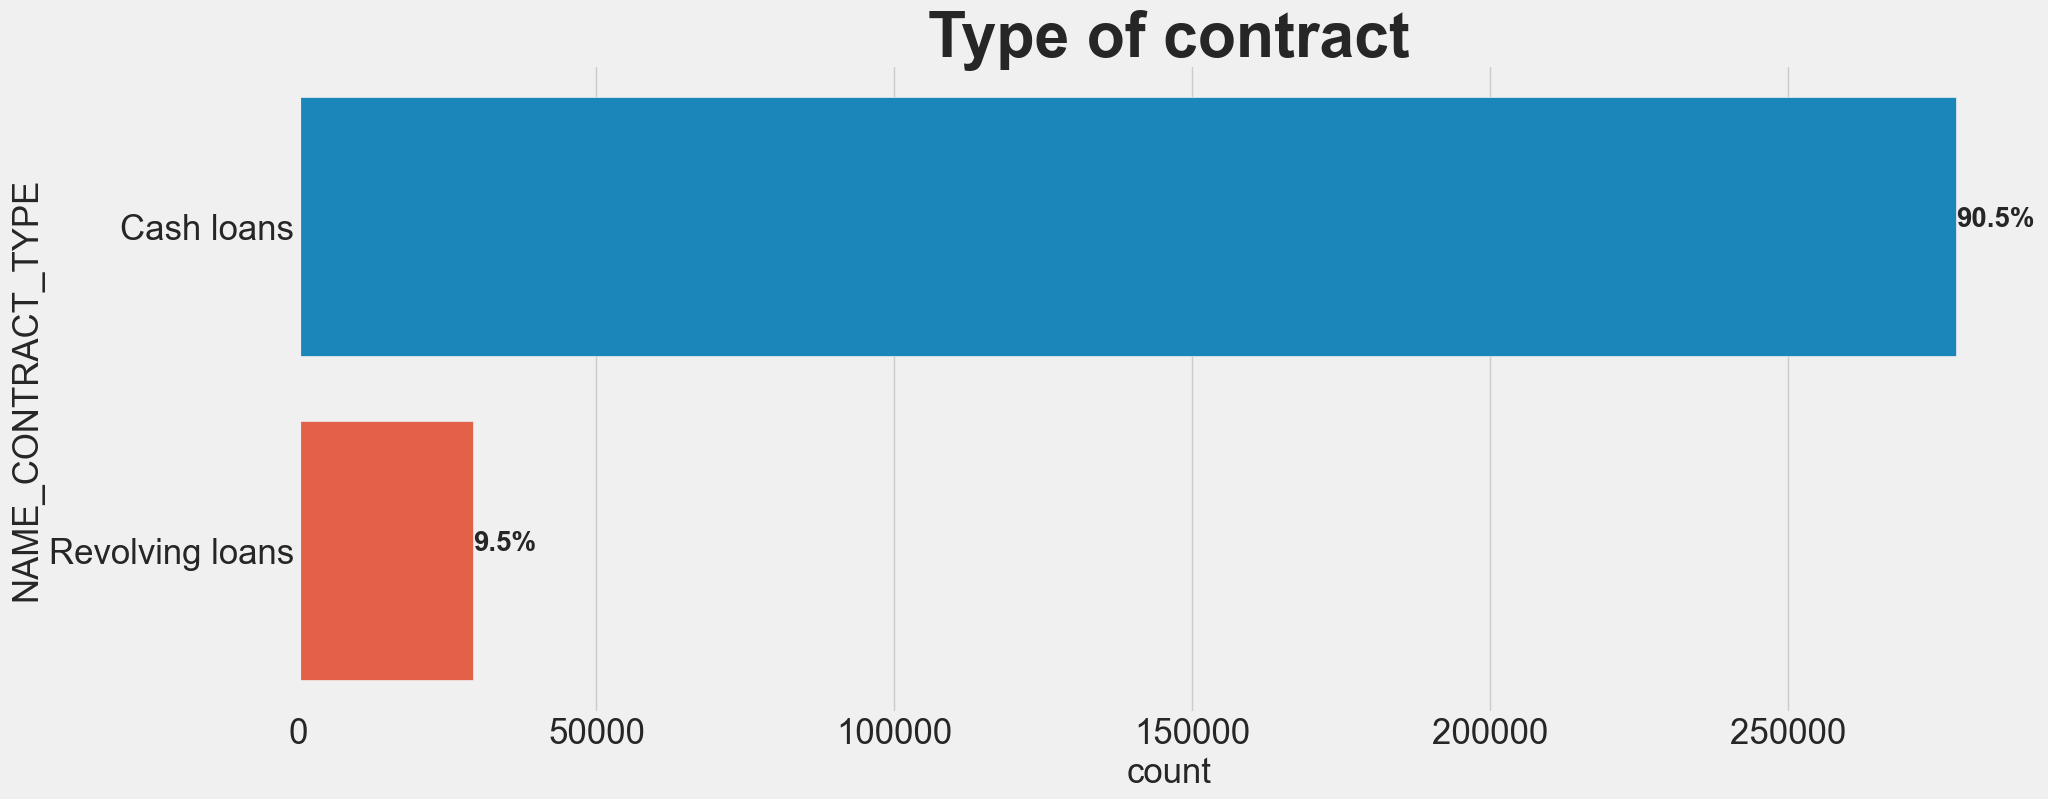

                                   -------------------------------------------------------


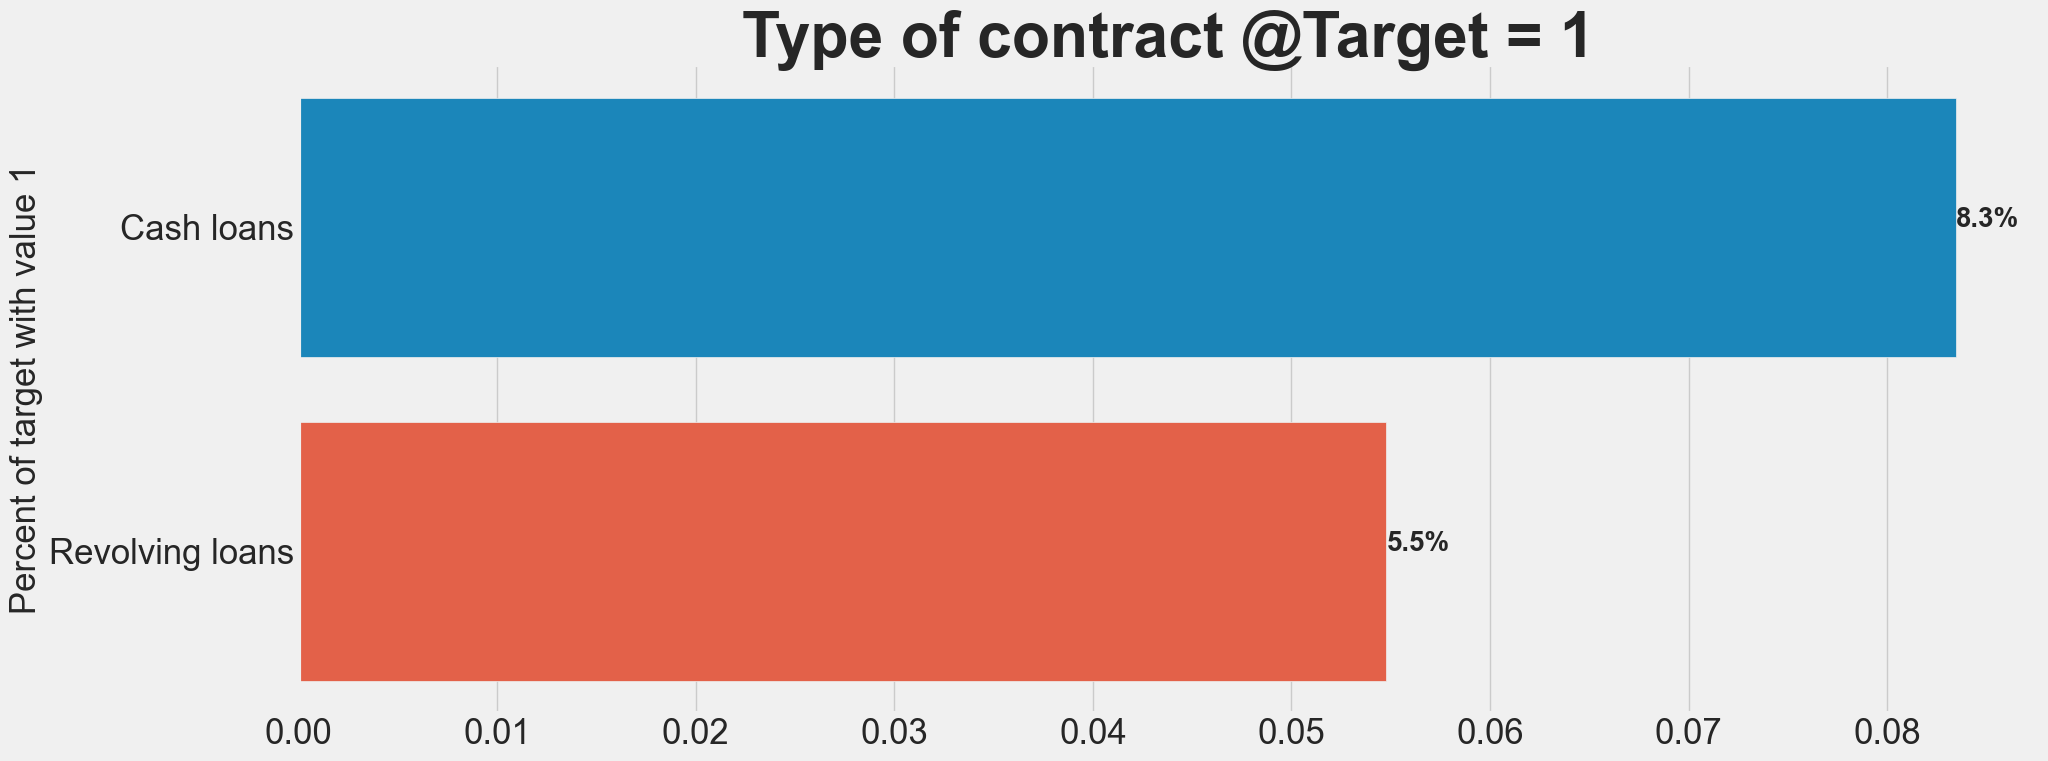

In [275]:
# NAME_CONTRACT_TYPE
plot_stat(data_application_train, 'NAME_CONTRACT_TYPE','Type of contract')
print('                                   -------------------------------------------------------')
plot_percent_target1(data_application_train, 'NAME_CONTRACT_TYPE','Type of contract @Target = 1')

Revolving loans represents a small amount (<10%) of all loans. Meanwhile, a bigger amount of revolving loans are not reimbursed regarding their frequency.

**Gender**

client gender = distribution M/F, but also the % of unreturned loan (target = 1)

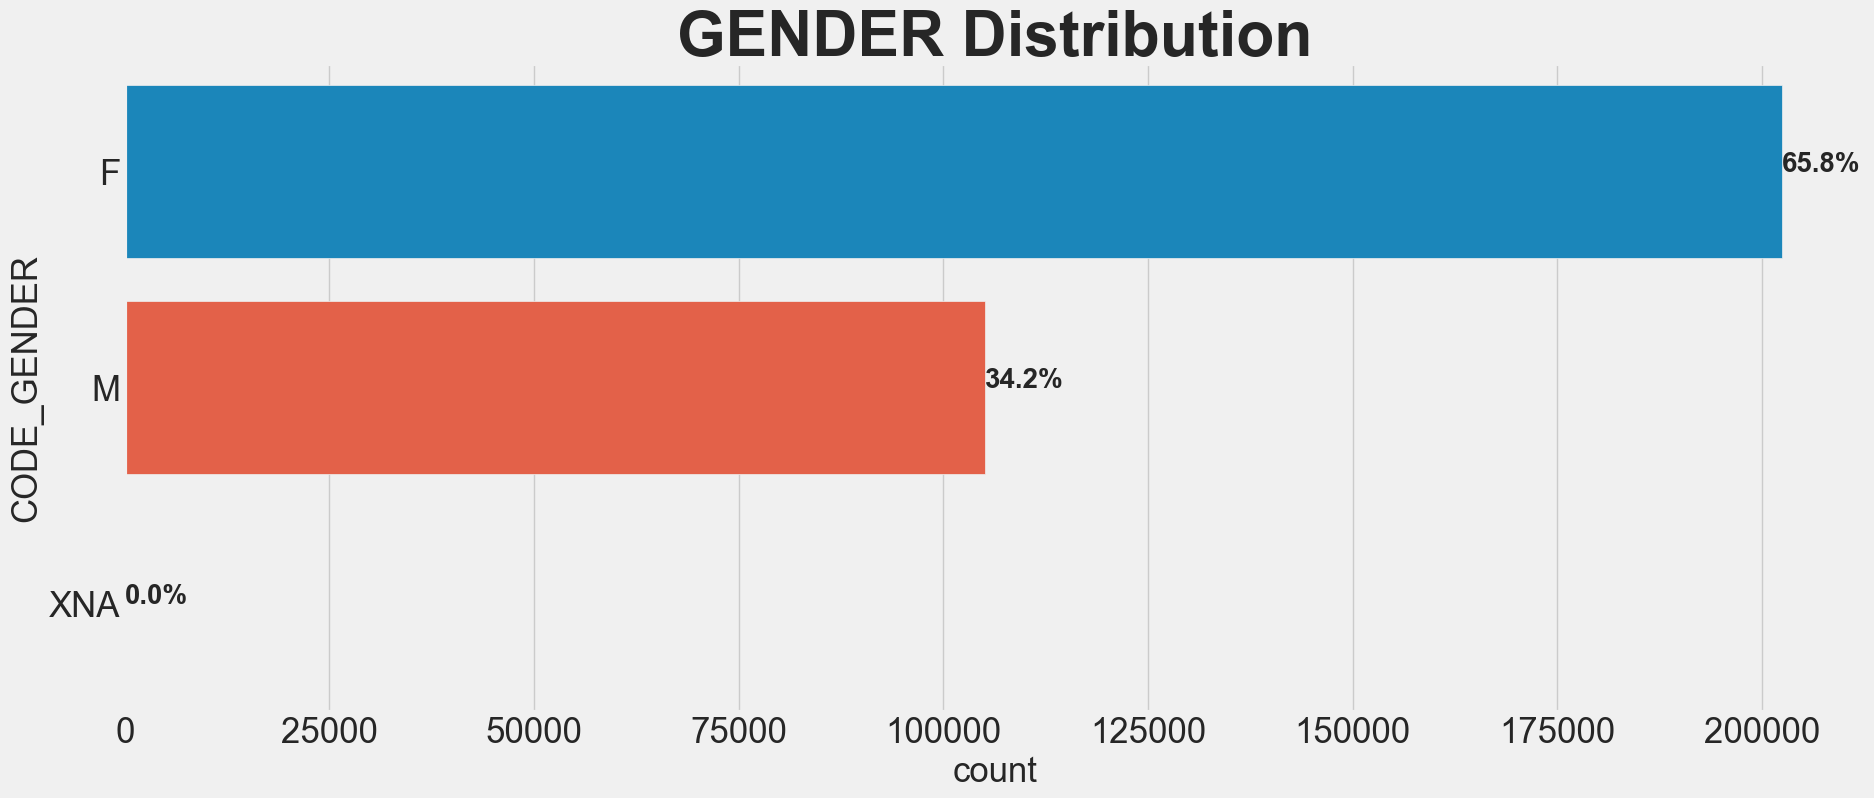

                                   -------------------------------------------------------


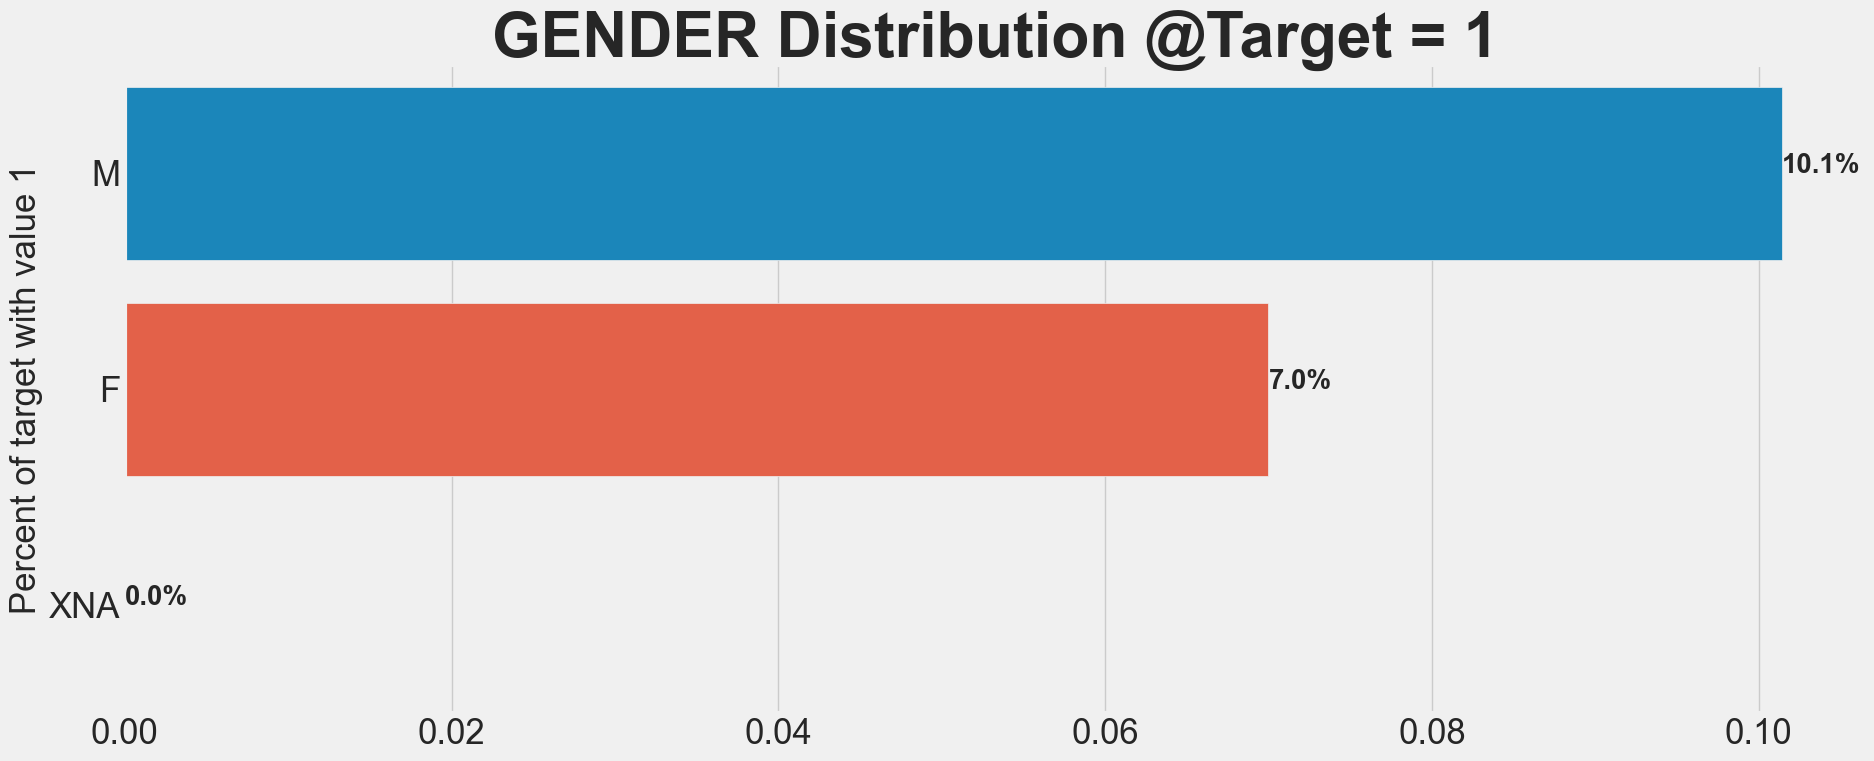

In [276]:
# CODE_GENDER
plot_stat(data_application_train, 'CODE_GENDER',"GENDER Distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(data_application_train, 'CODE_GENDER',"GENDER Distribution @Target = 1")

The number of female clients is almost the double the number of male clients. Male clients seem to have less chances to return their loans (10%), when compared to female clients (7%).

**Flag OWN CAR**

flag own car = impact of car ownership 

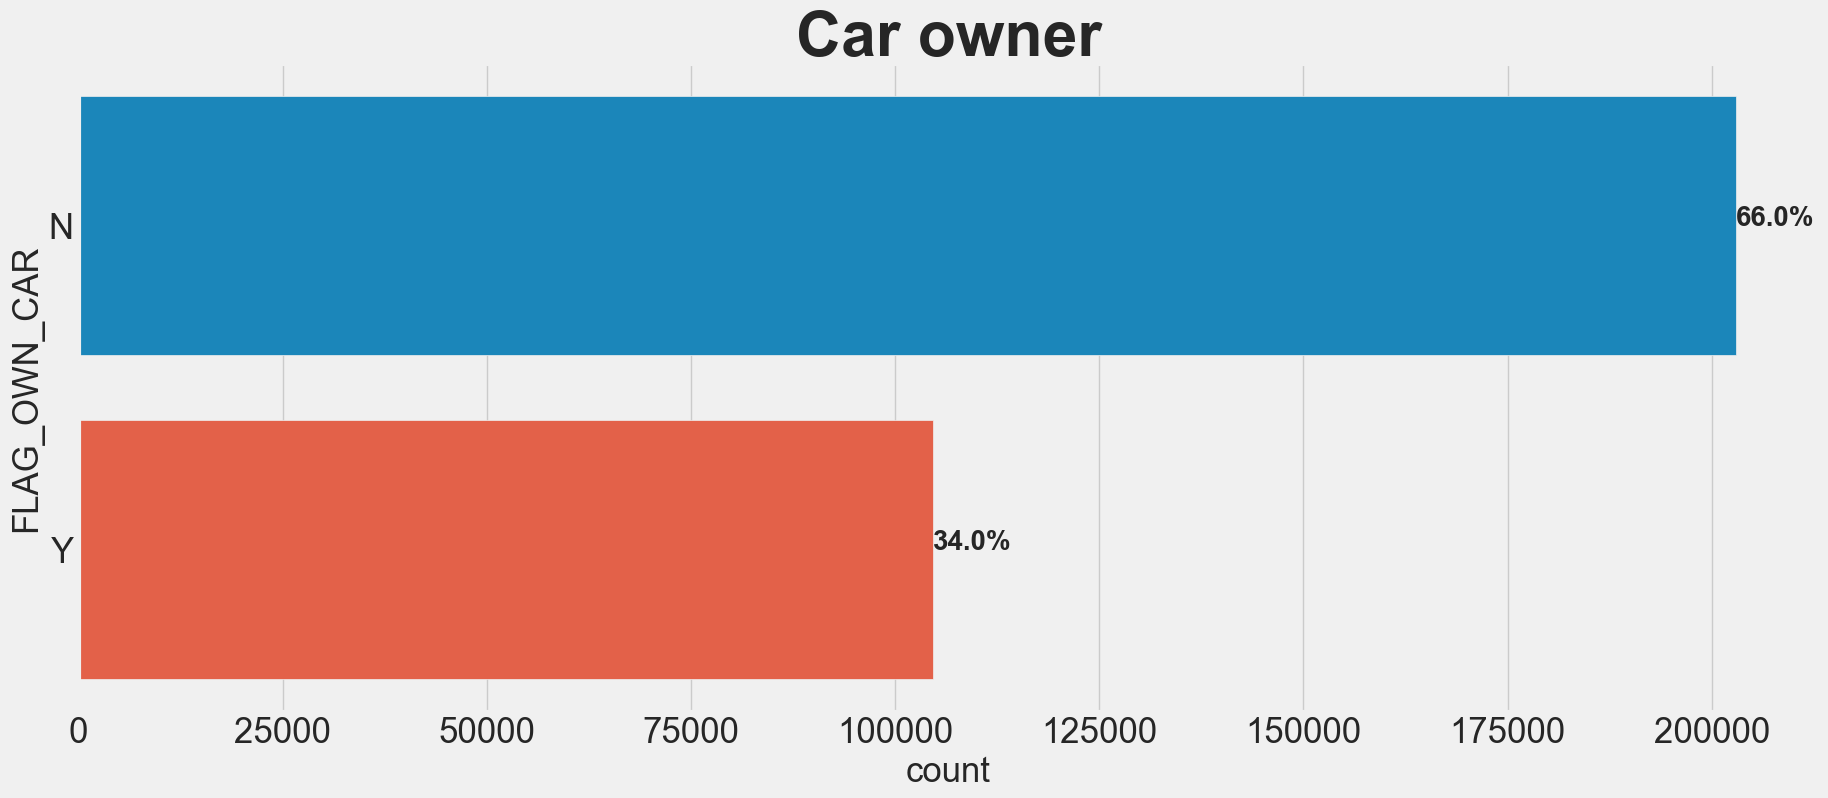

                                   -------------------------------------------------------


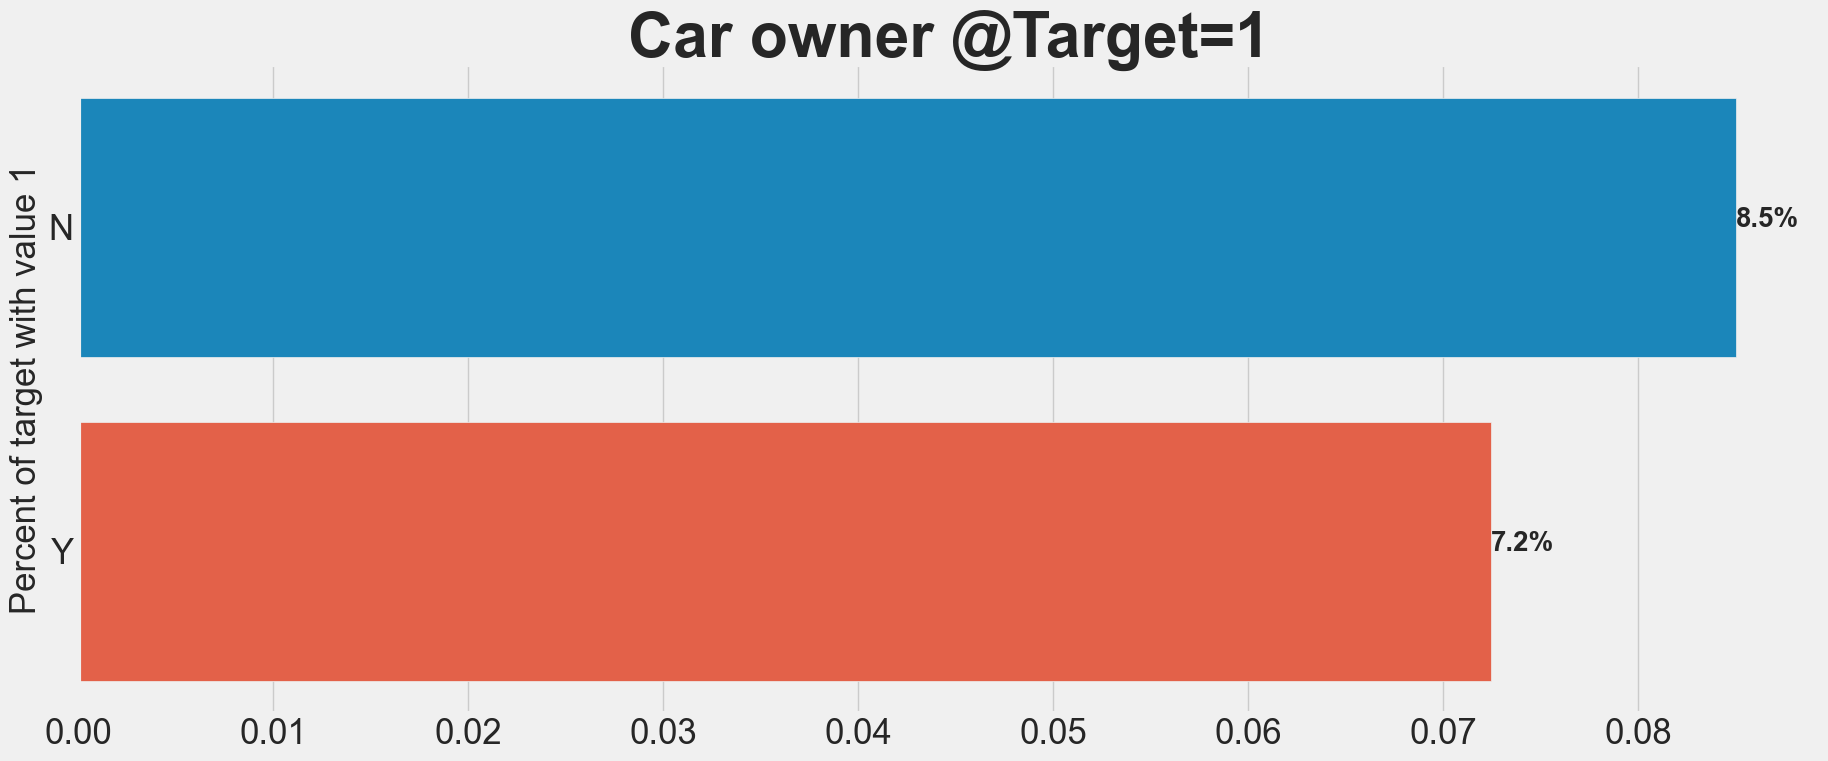

In [277]:
# FLAG_OWN_CAR
plot_stat(data_application_train, 'FLAG_OWN_CAR',"Car owner")
print("                                   -------------------------------------------------------")
plot_percent_target1(data_application_train, 'FLAG_OWN_CAR',"Car owner @Target=1")

Both categories (Y/N) have similar non-reimbursement rate (8%)

**Family status**

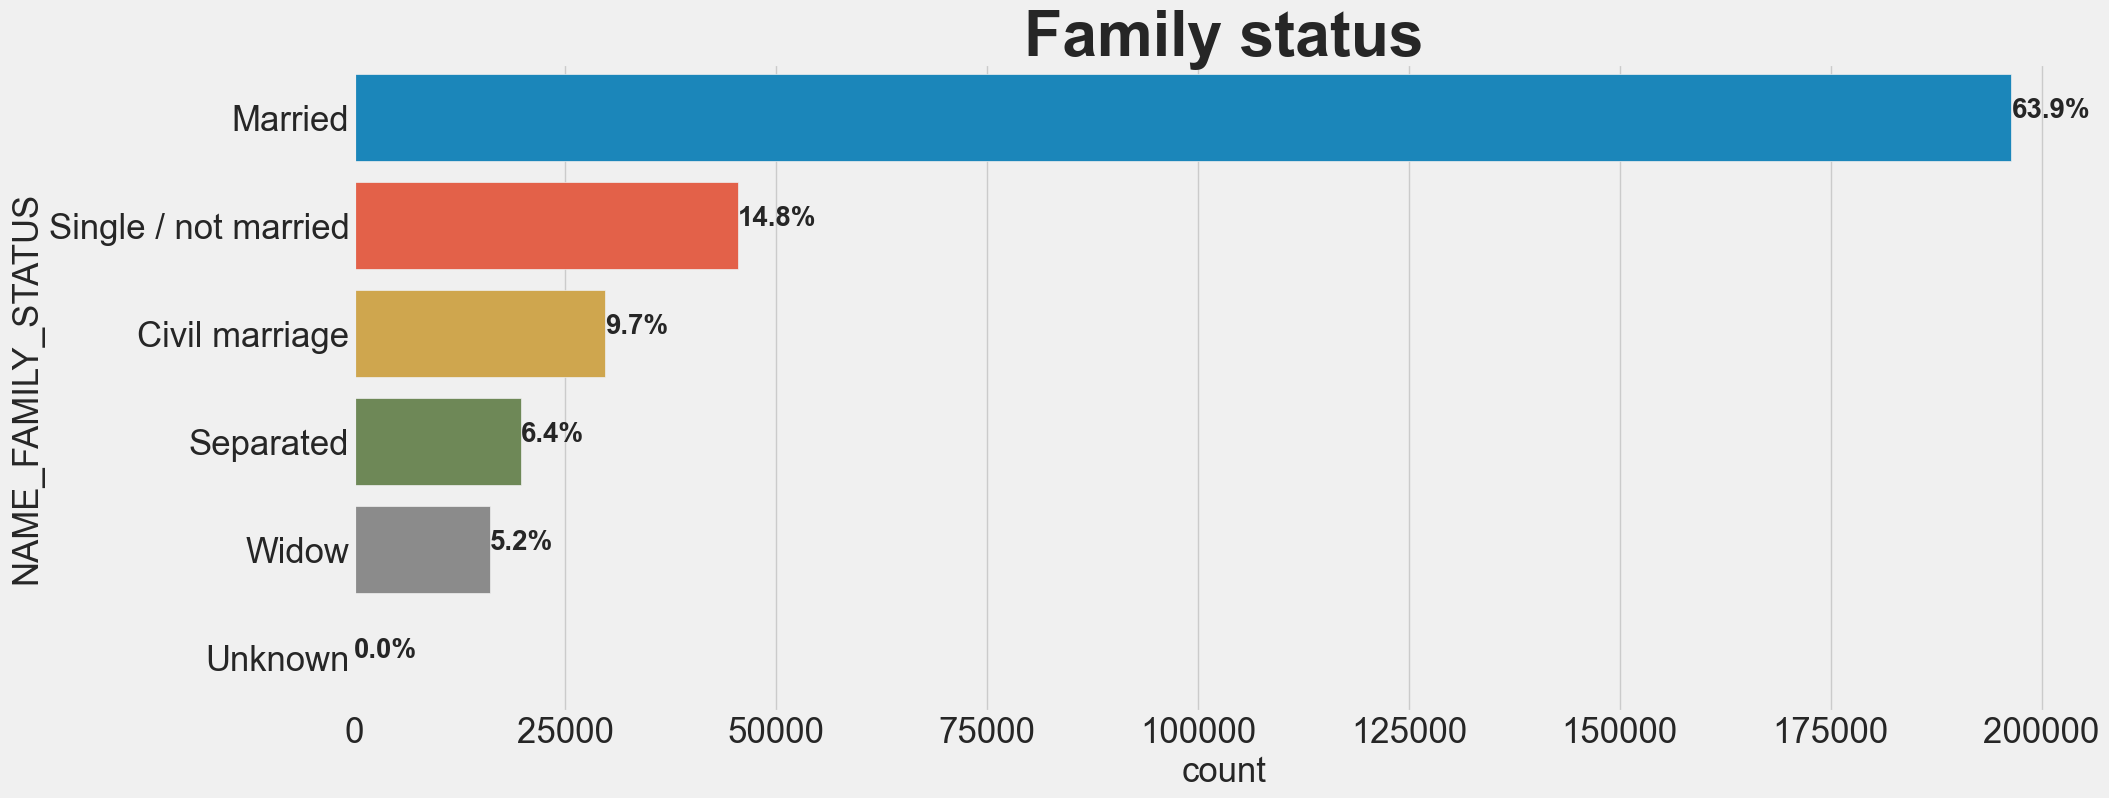

                                   -------------------------------------------------------


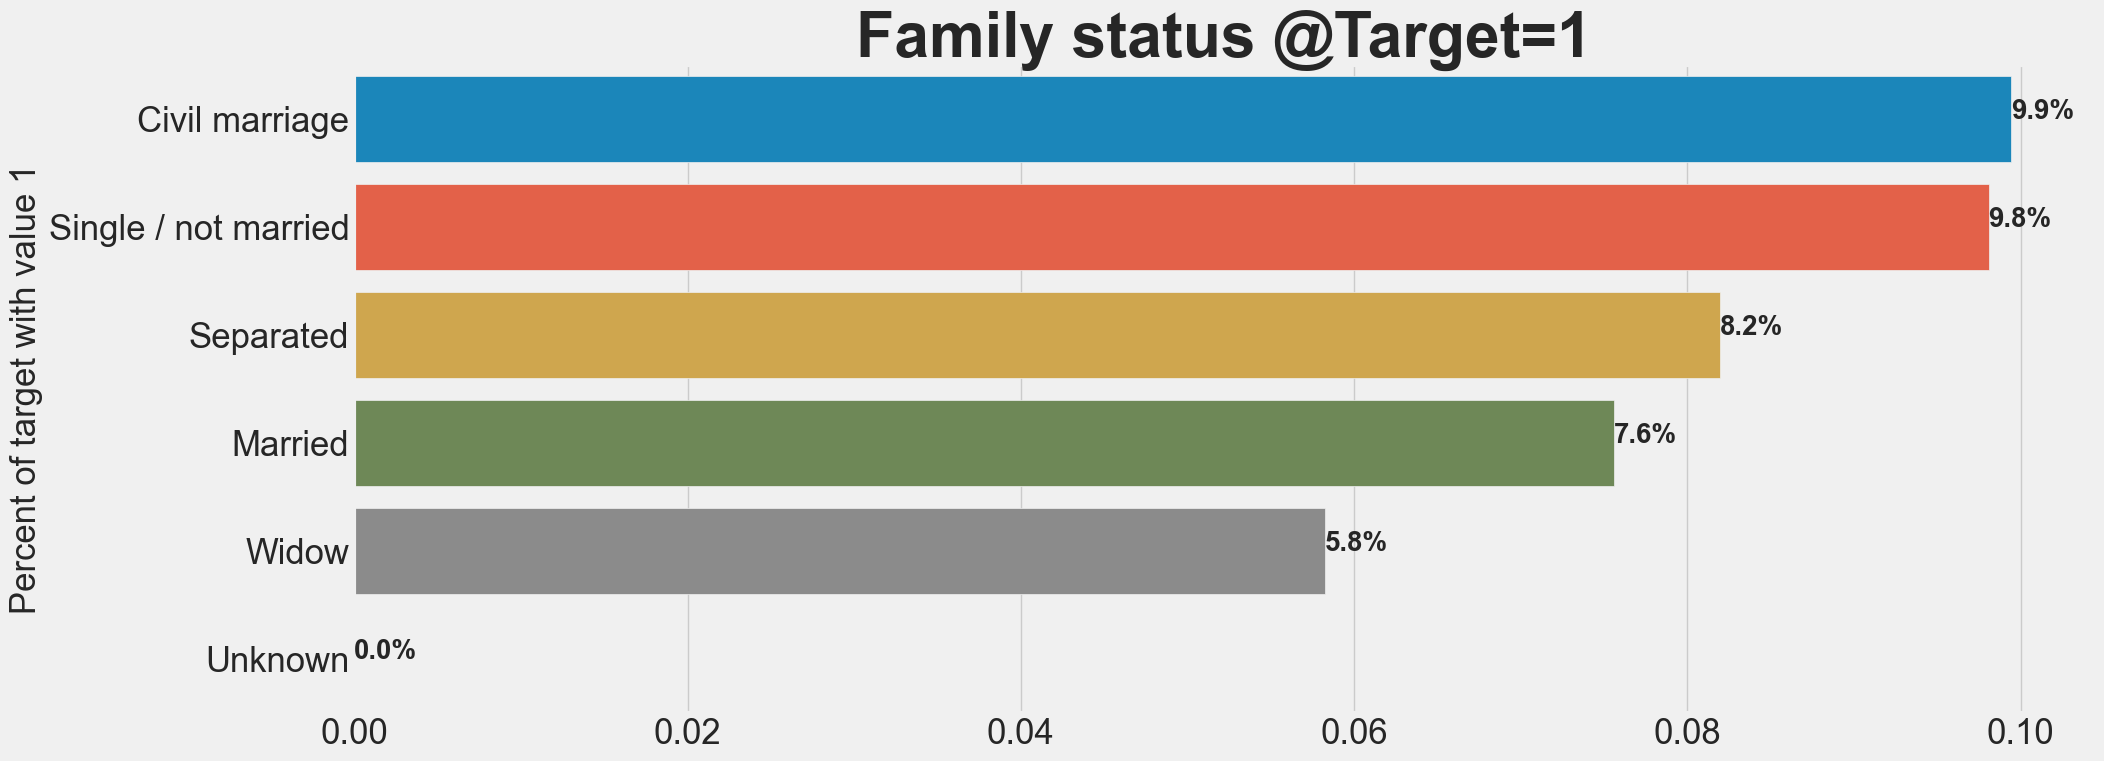

In [278]:
# NAME_FAMILY_STATUS
plot_stat(data_application_train, 'NAME_FAMILY_STATUS',"Family status")
print("                                   -------------------------------------------------------")
plot_percent_target1(data_application_train, 'NAME_FAMILY_STATUS',"Family status @Target=1")

Most clients are married, followed by single and civil marriage.

Regarding non-reimbursement, civil marriage class is the one with higher chance of non-reimbursement (10%), while widow is the lowest chance (6%).

**Income type**

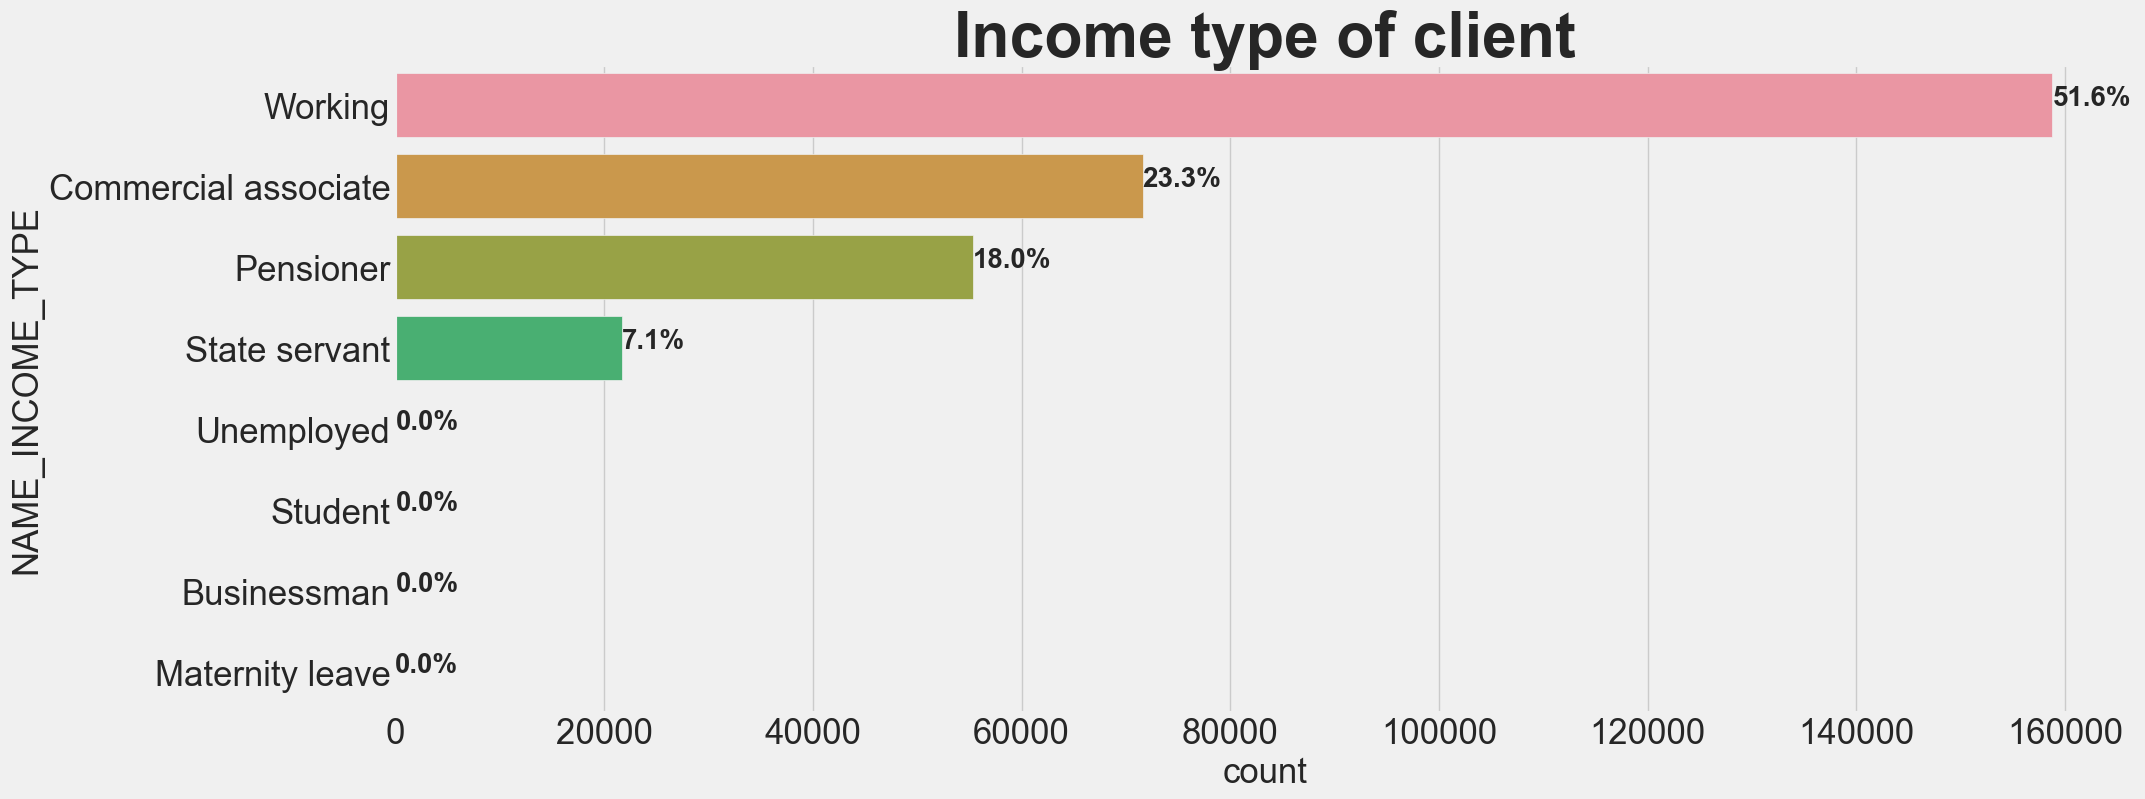

                                   -------------------------------------------------------


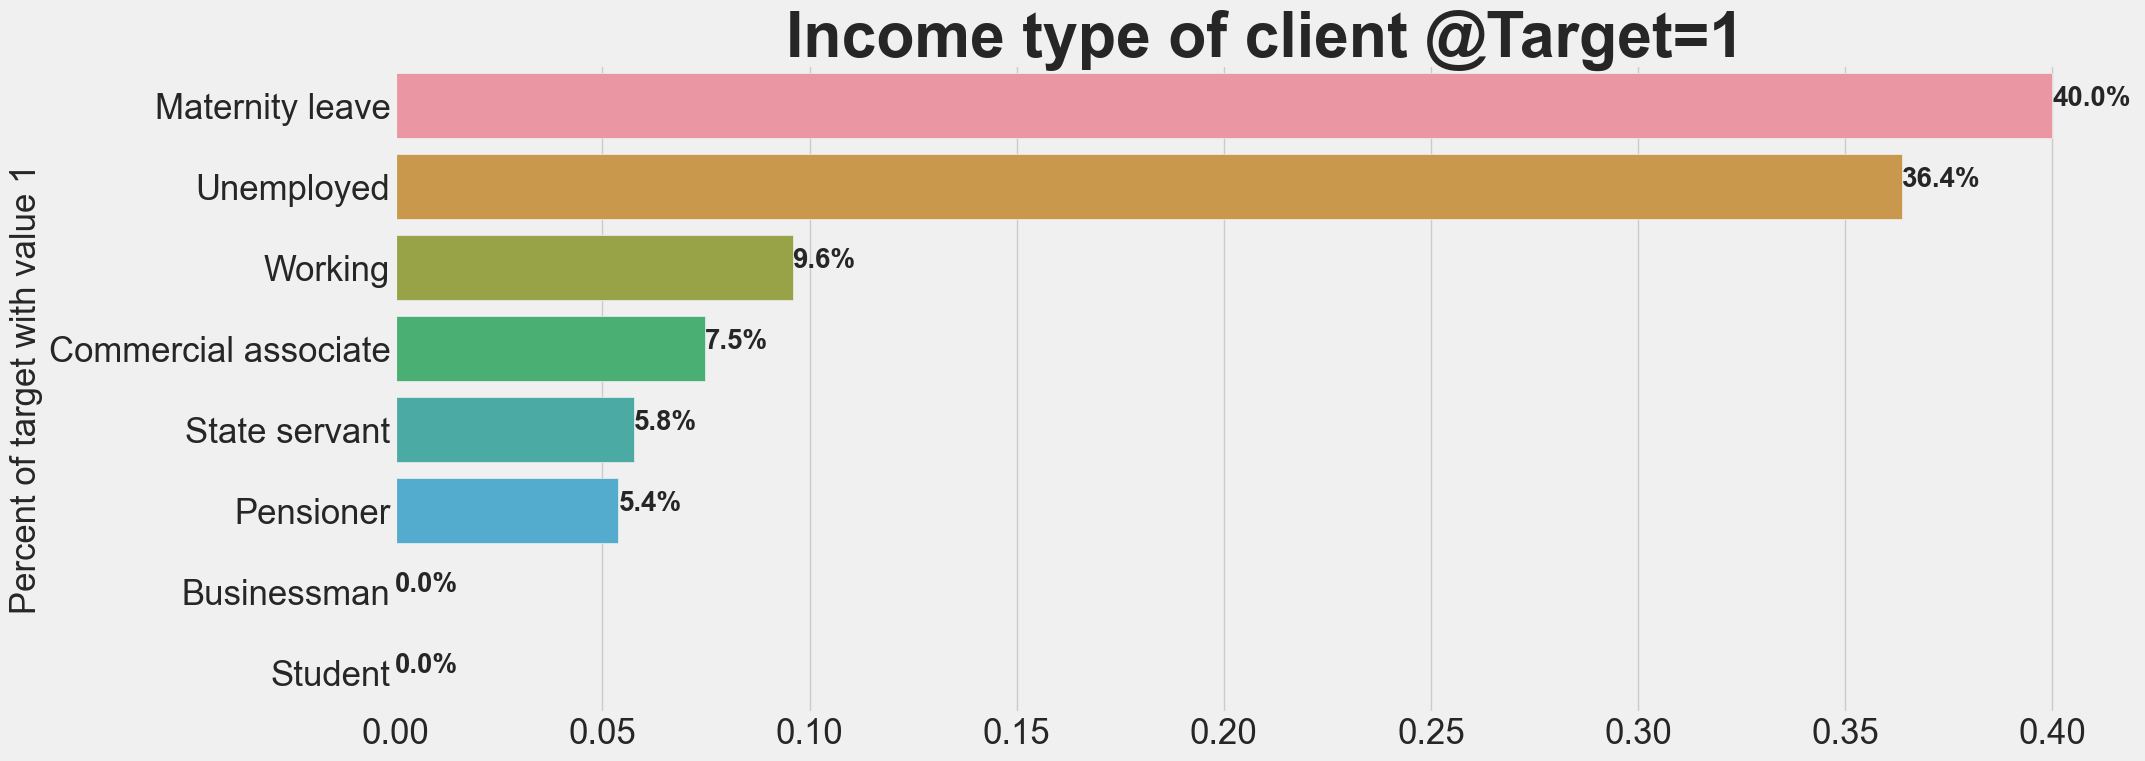

In [279]:
# NAME_INCOME_TYPE
plot_stat(data_application_train, 'NAME_INCOME_TYPE',"Income type of client")
print("                                   -------------------------------------------------------")
plot_percent_target1(data_application_train, 'NAME_INCOME_TYPE',"Income type of client @Target=1")

Most loan applicant's income sources are salary / work income, followed by commercial associate, retirement pension, or public servant.

Maternity leave clients have a high non-reimbursement rate (40%), followed by unemployed (37%). The other ones are below the average (10%).

**Occupation type**

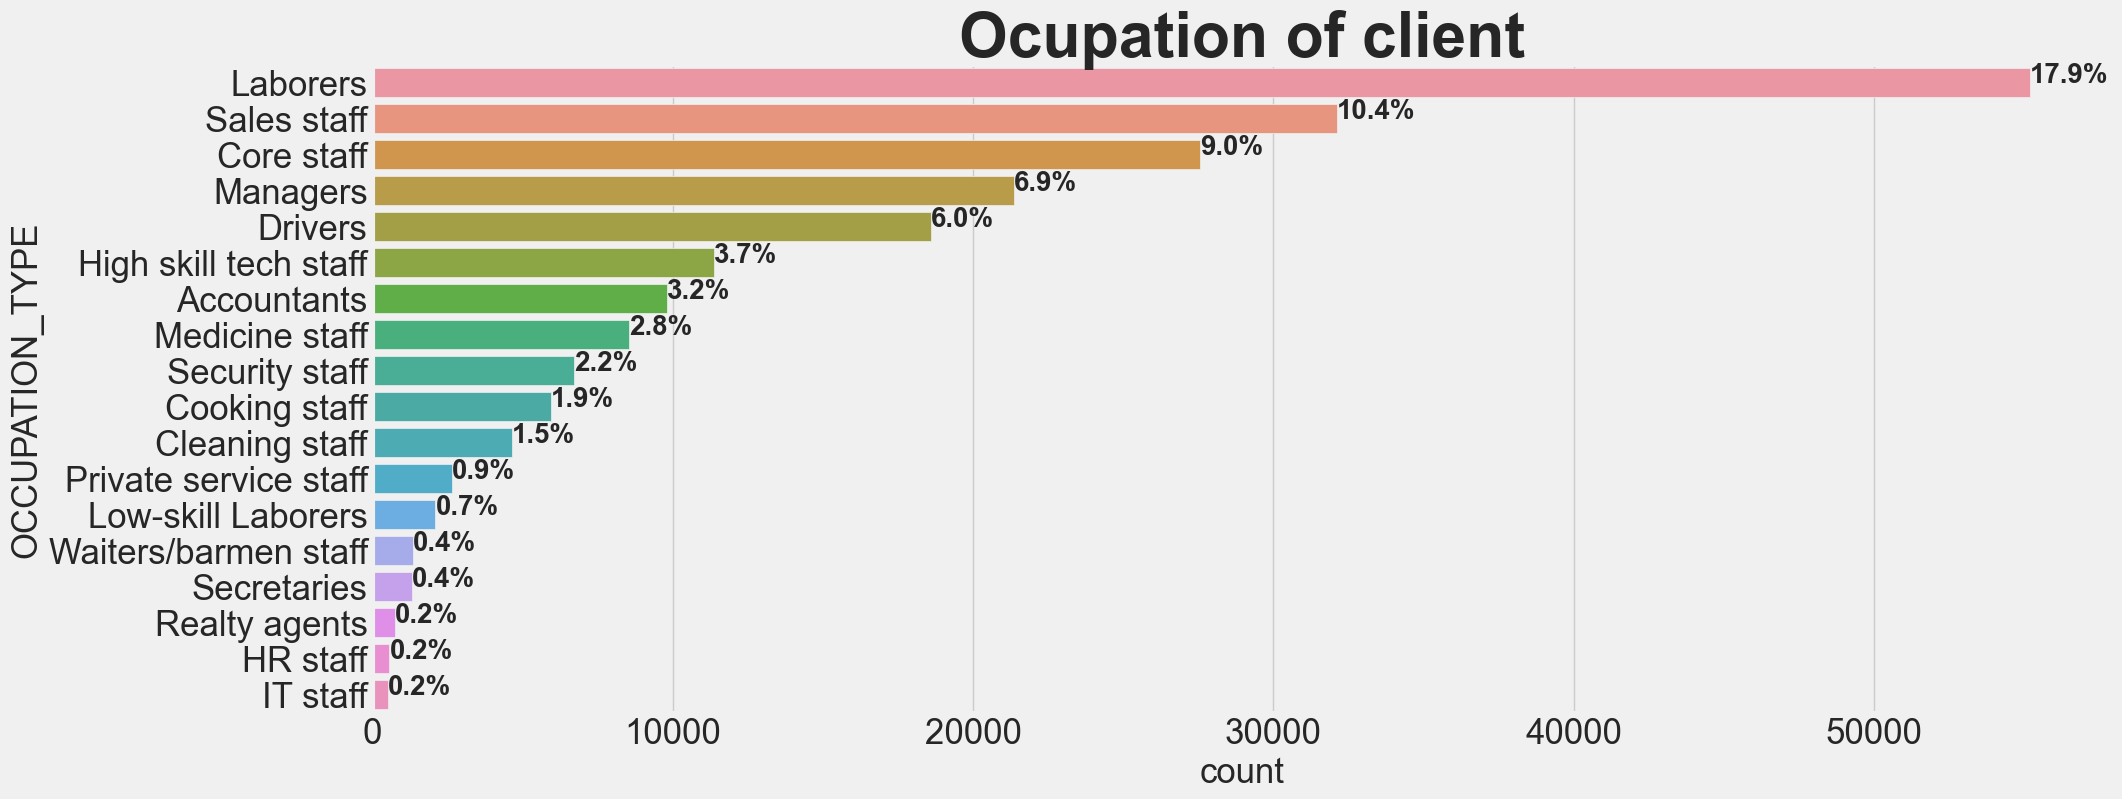

                                   -------------------------------------------------------


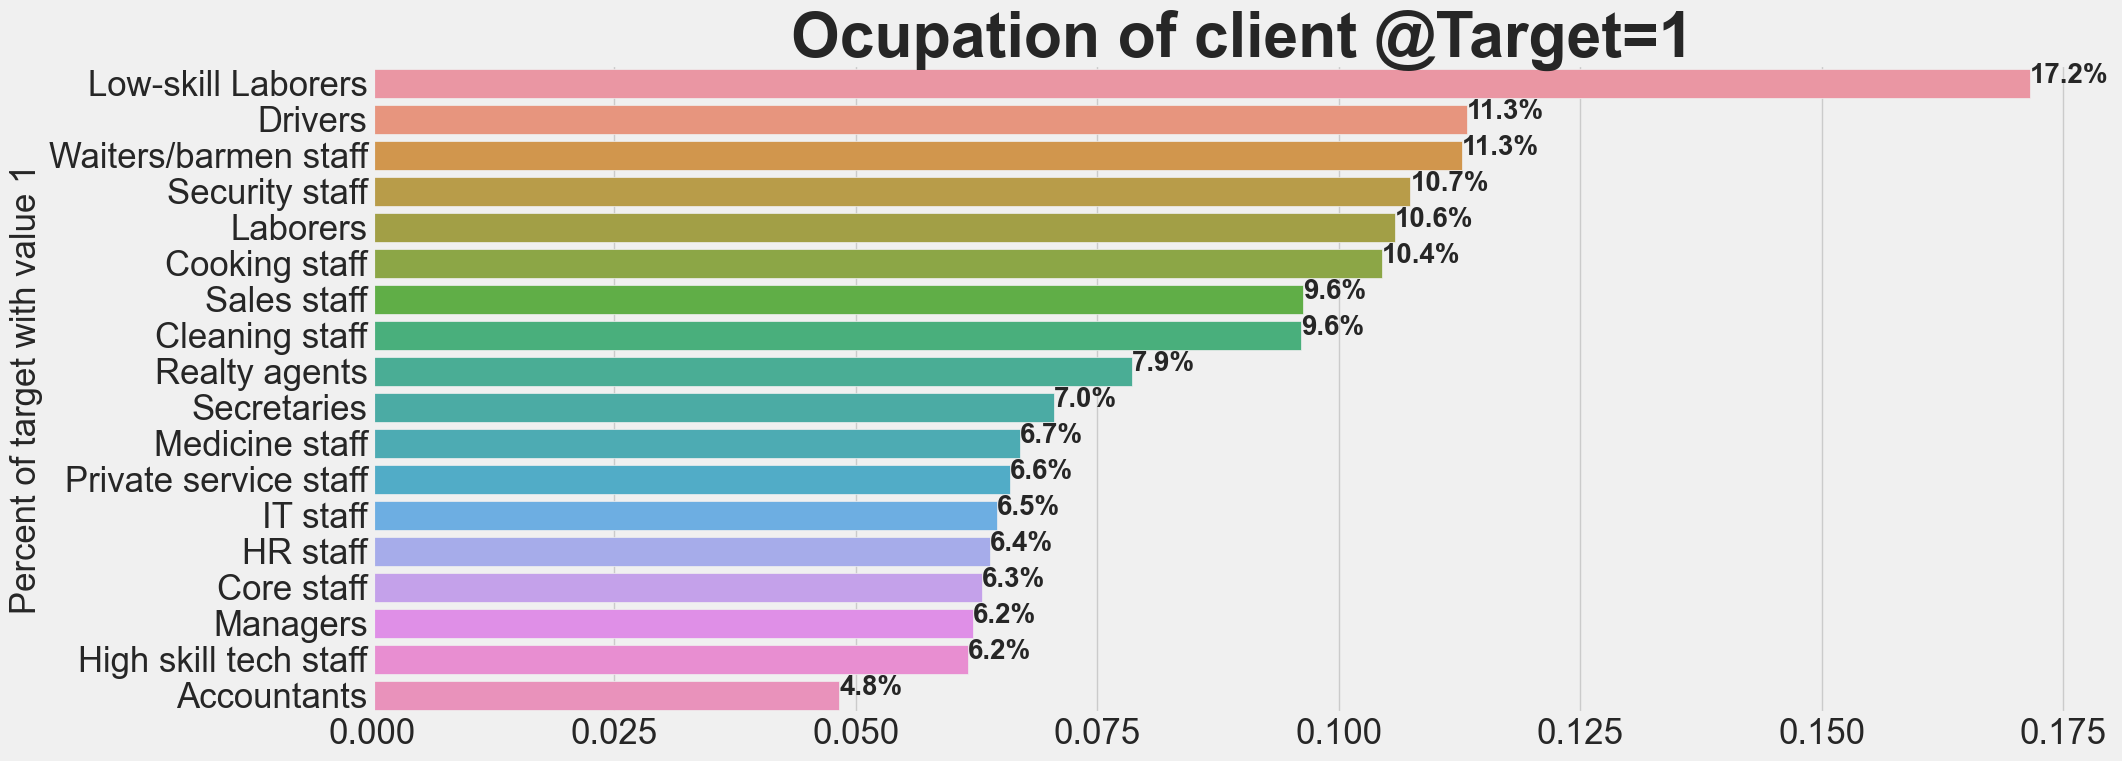

In [280]:
# OCCUPATION_TYPE
plot_stat(data_application_train, 'OCCUPATION_TYPE',"Ocupation of client")
print("                                   -------------------------------------------------------")
plot_percent_target1(data_application_train, 'OCCUPATION_TYPE',"Ocupation of client @Target=1")

Most loans are contracted by laborers, followed by sale staff. IT staff takes the lowest loan amount.

The category with highest non-reimbursement rate is low-skill laborers (17%), followed by drivers, waiters/barmen, security staff, labors and cooking staff.

**Education type**

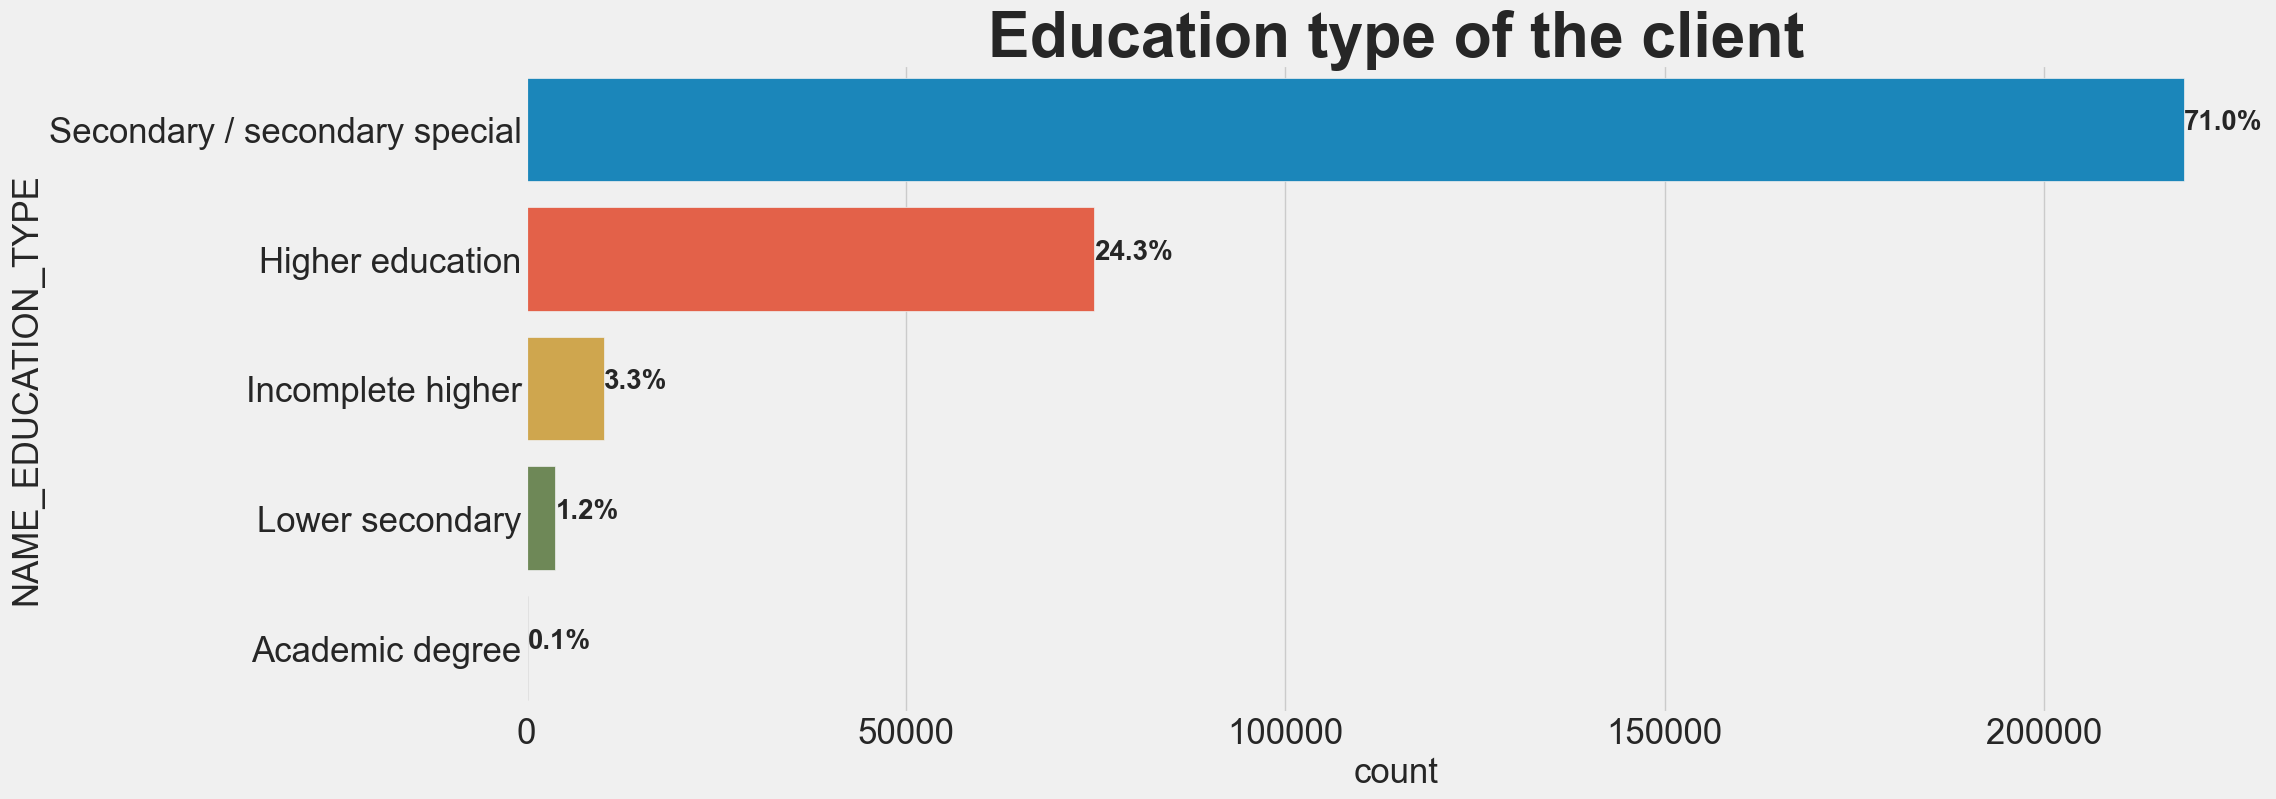

                                   -------------------------------------------------------


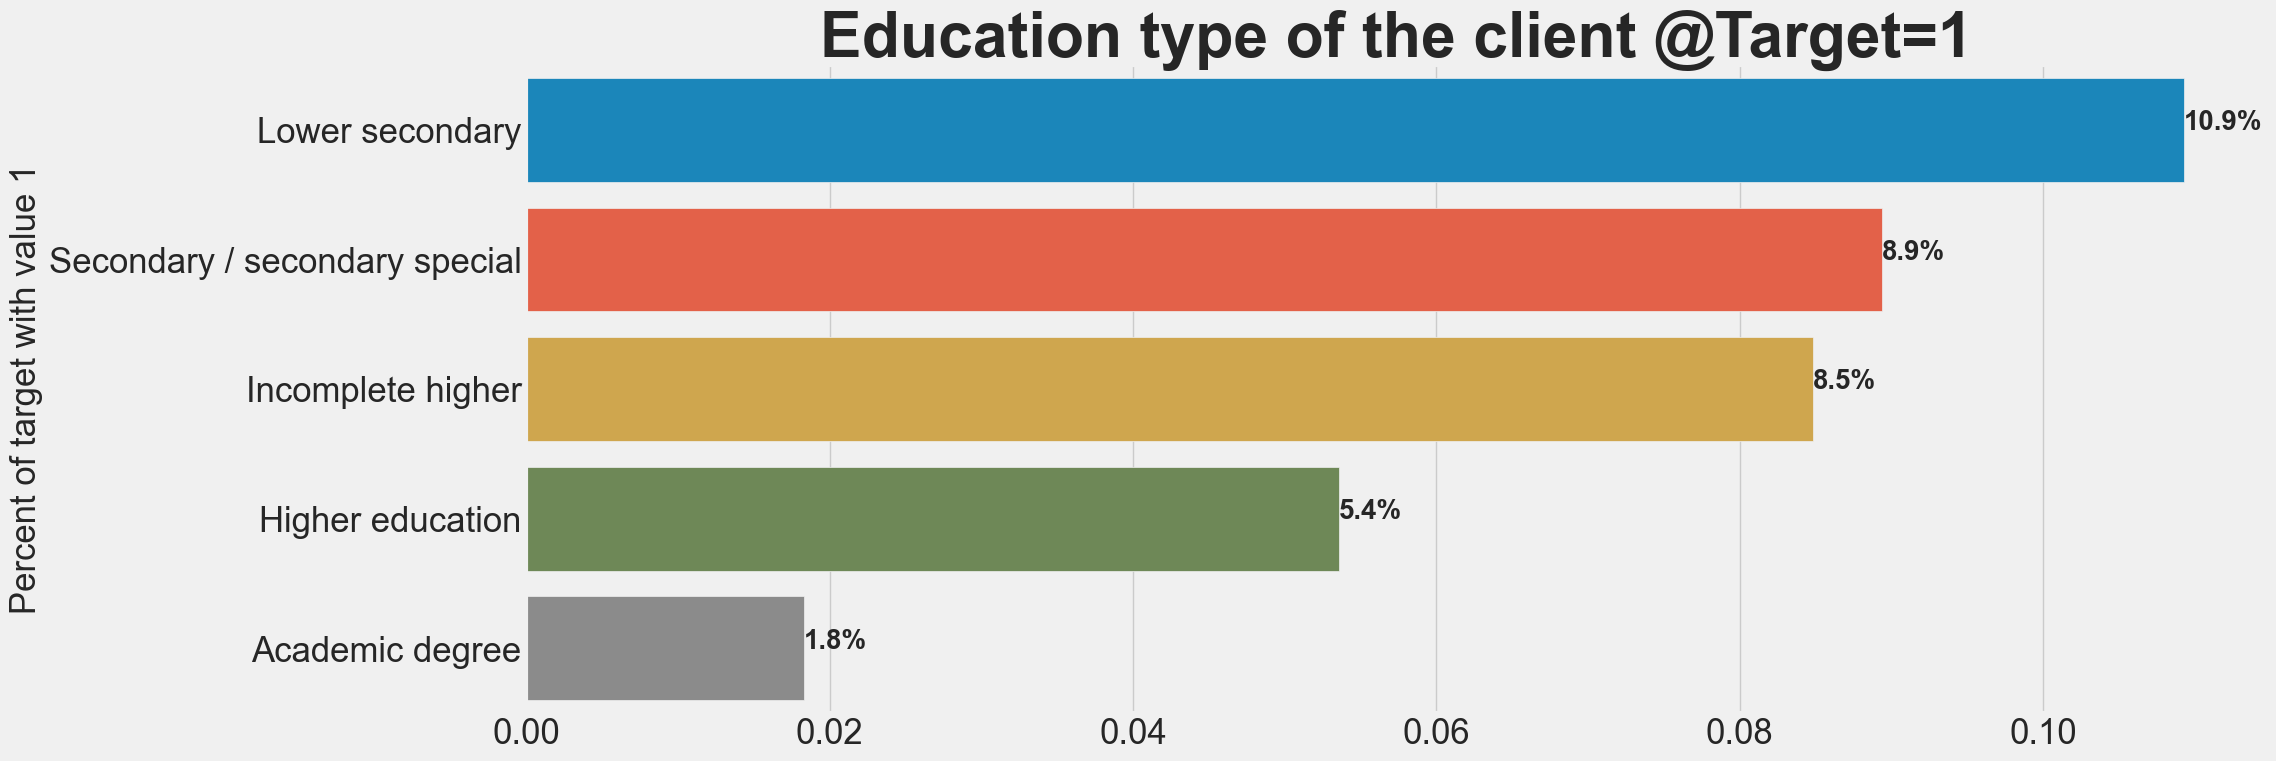

In [281]:
# NAME_EDUCATION_TYPE
plot_stat(data_application_train, 'NAME_EDUCATION_TYPE',"Education type of the client")
print("                                   -------------------------------------------------------")
plot_percent_target1(data_application_train, 'NAME_EDUCATION_TYPE',"Education type of the client @Target=1")

Most clients have a secondary degree, followed by higher education degree. Few clients have an academic degree.

Even though there are few the clients having a lower secondary degree, those have the highest non-reimbursement rate (11%). Academic degree owners have the lowest rate (2%).

**Housing type**

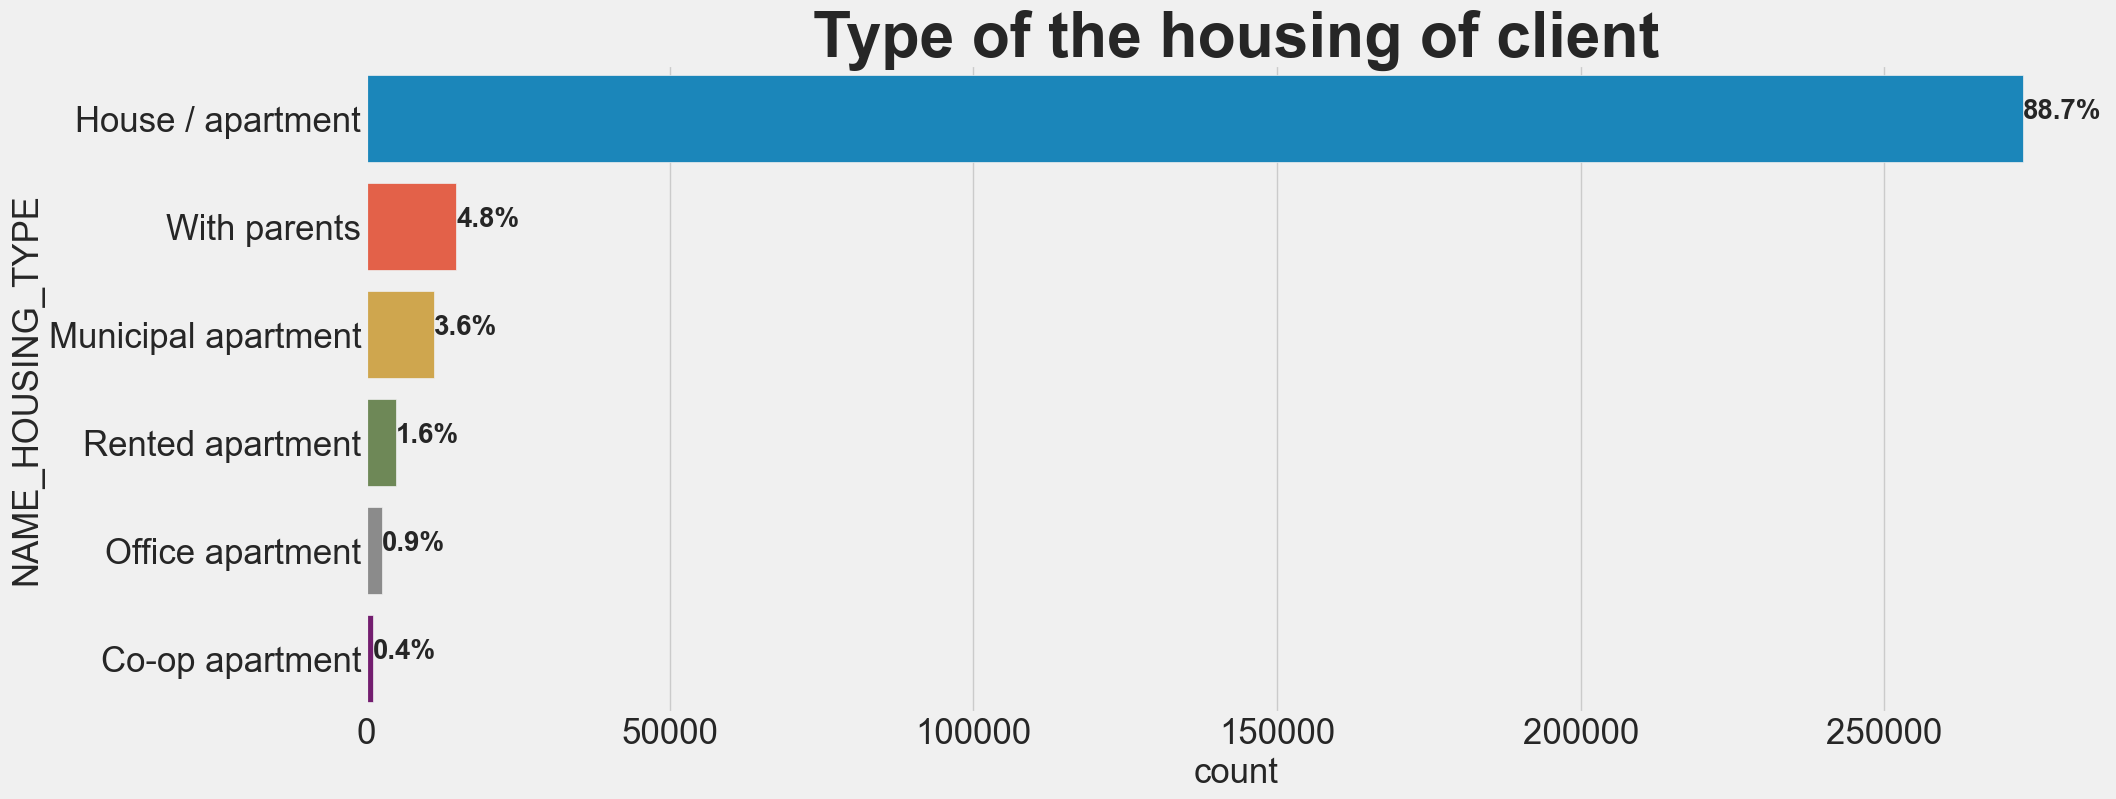

                                   -------------------------------------------------------


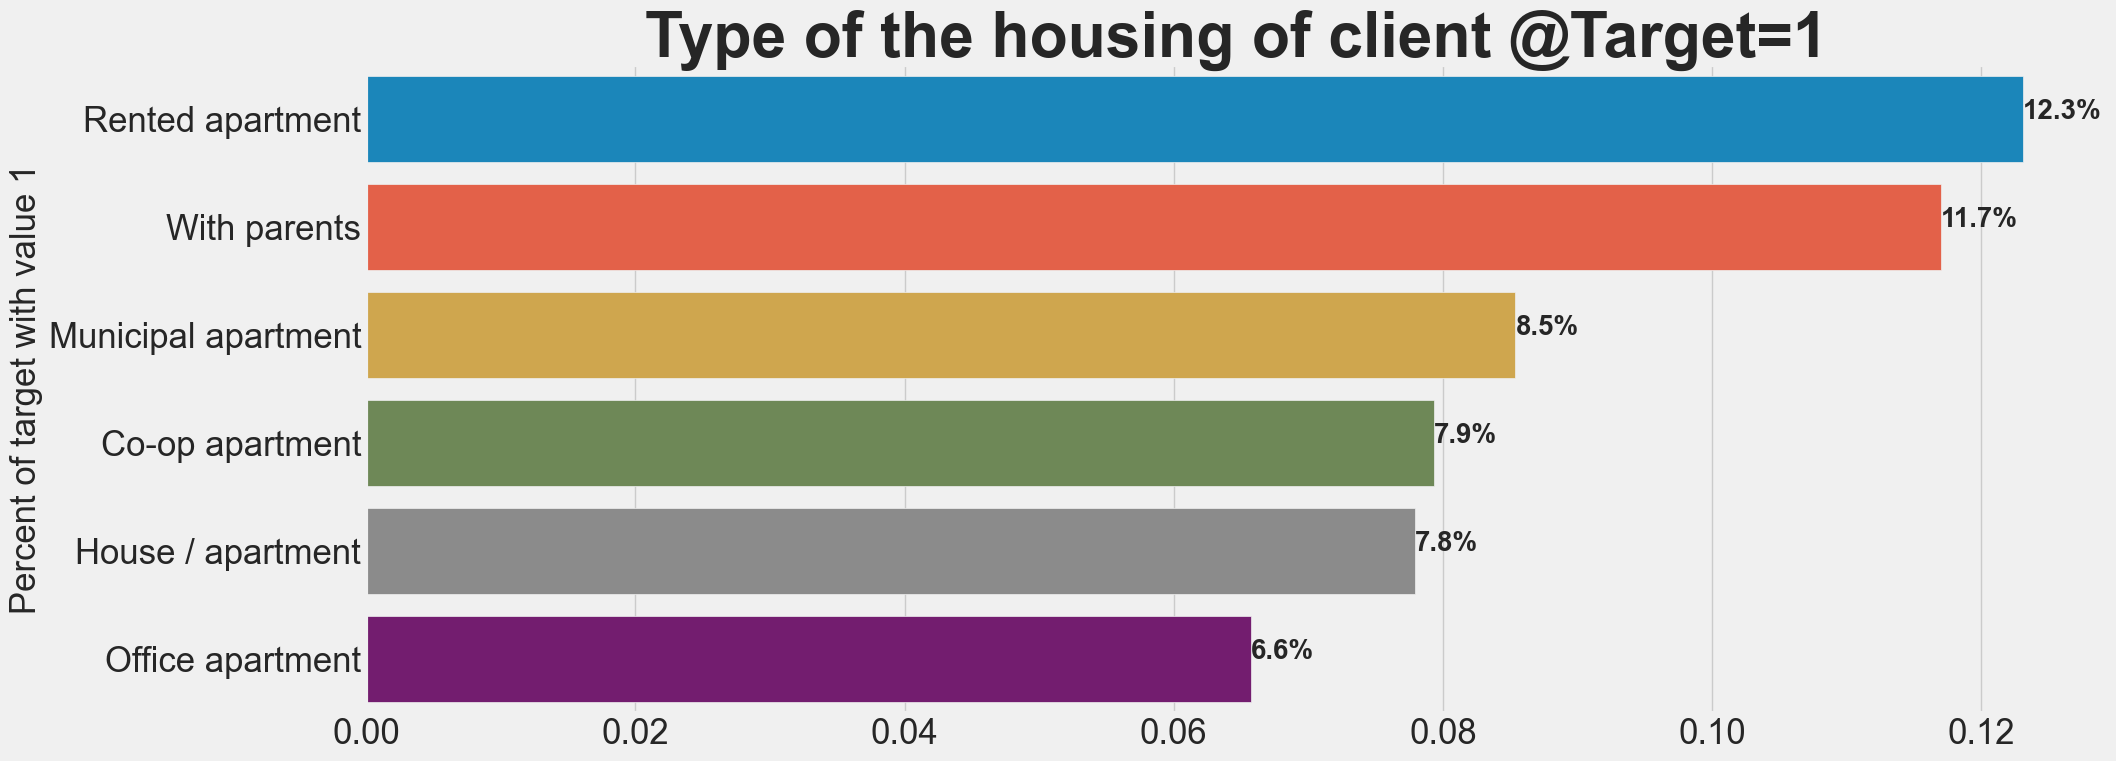

In [282]:
#NAME_HOUSING_TYPE
plot_stat(data_application_train, 'NAME_HOUSING_TYPE',"Type of the housing of client")
print("                                   -------------------------------------------------------")
plot_percent_target1(data_application_train, 'NAME_HOUSING_TYPE',"Type of the housing of client @Target=1")

More than 250,000 loan applicants (89%) live in houses or apartments, followed by less independent clients (i.e., with parents).

Clients living in rented aparments or with parents have the highest non-reimbursement rate (12%).

##### Correlations

In [283]:
# Display correlations
print('Most Positive Correlations:\n', data_application_train.drop(ID, axis=1).corr()['TARGET'].sort_values().tail(15))
print("--------------------------")
print('Most Negative Correlations:\n', data_application_train.drop(ID, axis=1).corr()['TARGET'].sort_values().head(15))

Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
--------------------------
Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
EST_AGE                      -0.078239
DAYS_EMPLOYED_OUTLIERS       -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MOD

Strongest (positive) correlation = days_birth
Strongest (negative) correlations = ext_source_{1|2|3}

To keep the logic from the explanation, we can use abs values to express the fact that older clients are more susceptible to reimburse a loan.

**Days_birth**

In [284]:
# Find the correlation of the positive days since birth and target
data_application_train['DAYS_BIRTH'] = abs(data_application_train['DAYS_BIRTH'])
data_application_train['DAYS_BIRTH'].corr(data_application_train['TARGET'])

-0.07823930830982709

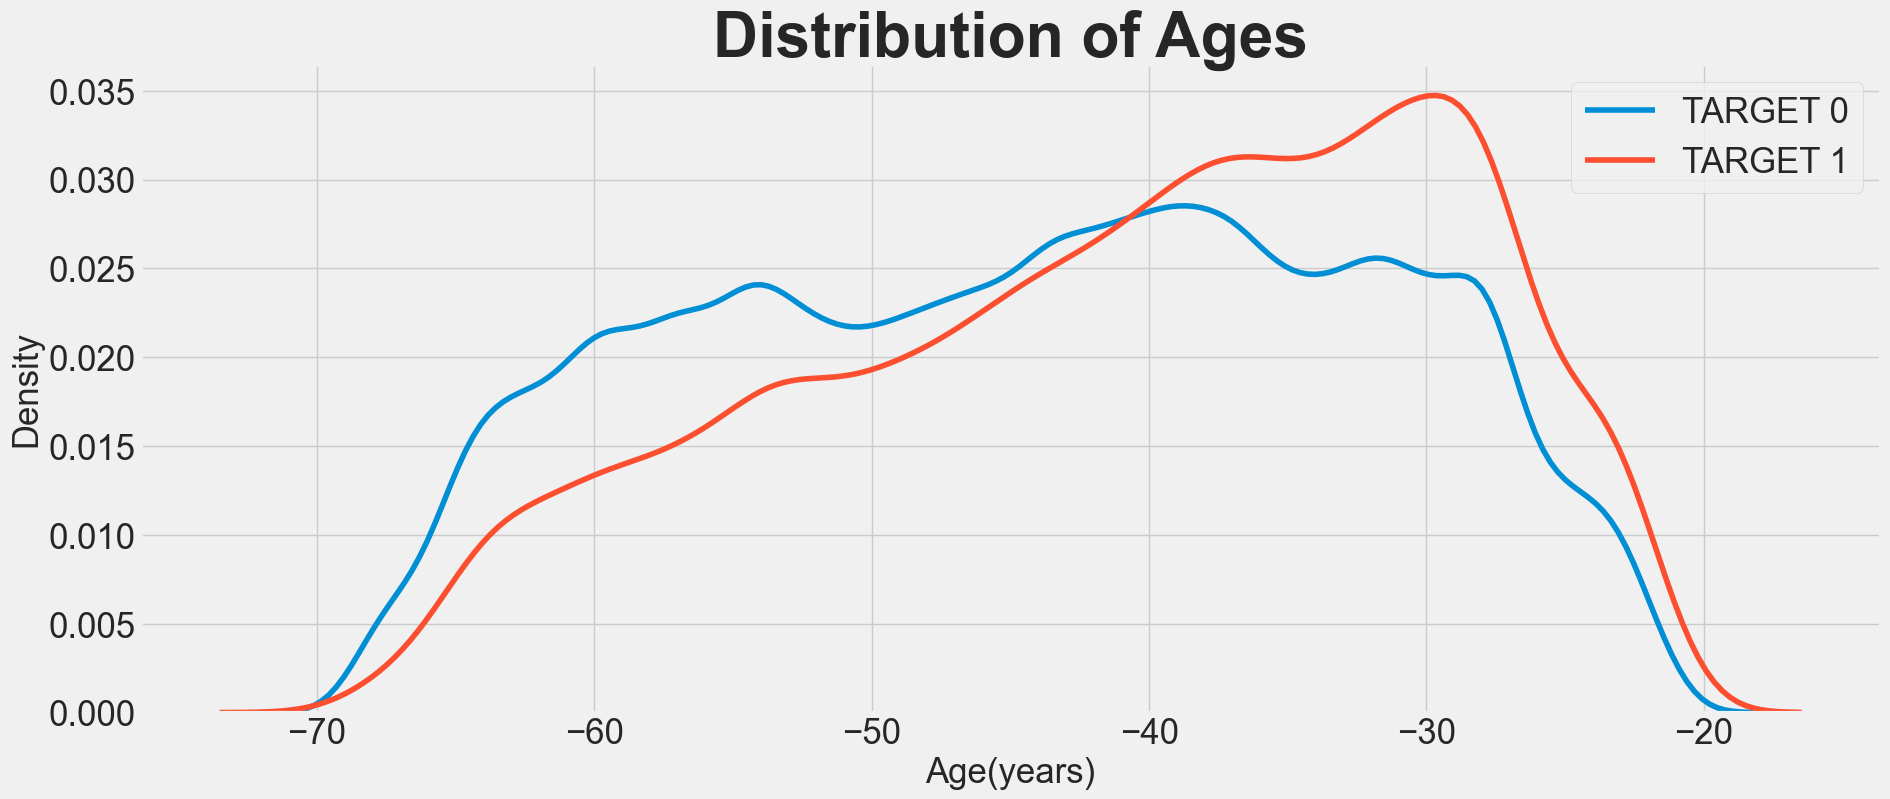

In [285]:
plt.figure(figsize = (20, 8))
sns.kdeplot(data_application_train[data_application_train['TARGET'] == 0]['DAYS_BIRTH'] / -365, label = 'TARGET 0')
sns.kdeplot(data_application_train[data_application_train['TARGET'] == 1]['DAYS_BIRTH'] / -365, label = 'TARGET 1')

plt.legend(), plt.xlabel('Age(years)'), plt.ylabel('Density'), plt.title('Distribution of Ages')
plt.show()

**External sources**

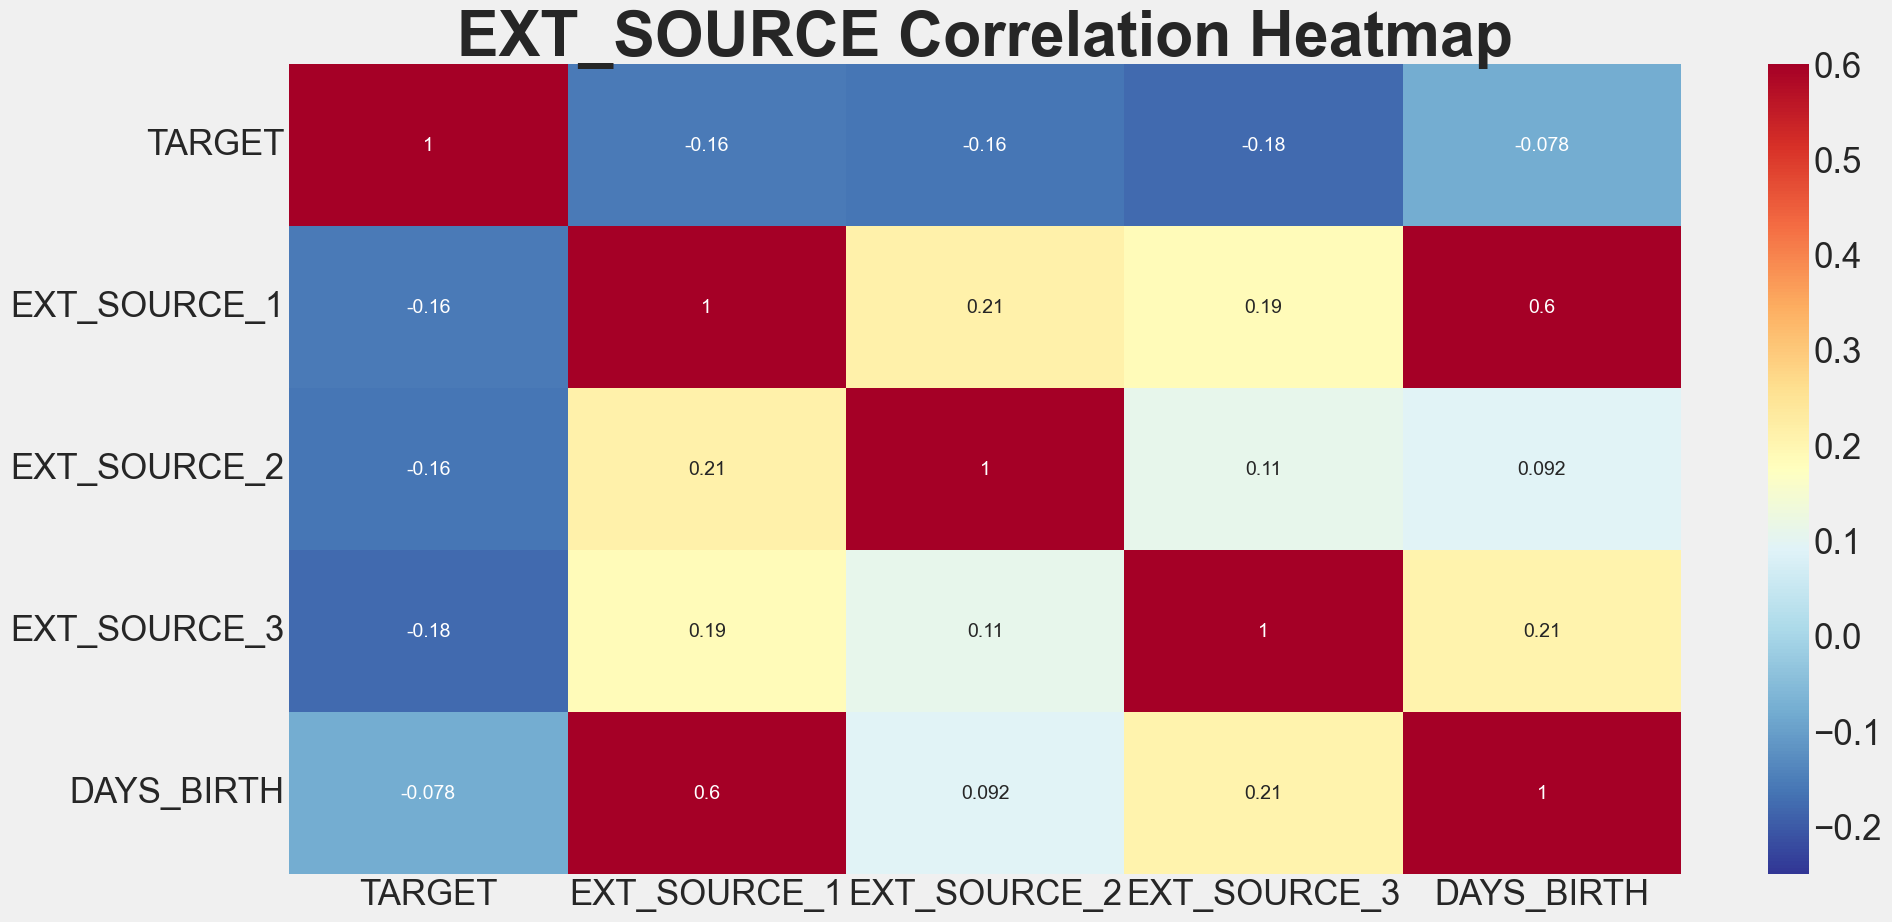

In [286]:
plt.figure(figsize = (20,10))
sns.heatmap(data_application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].corr(),
            cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6,
           )
plt.title('EXT_SOURCE Correlation Heatmap')
plt.show()

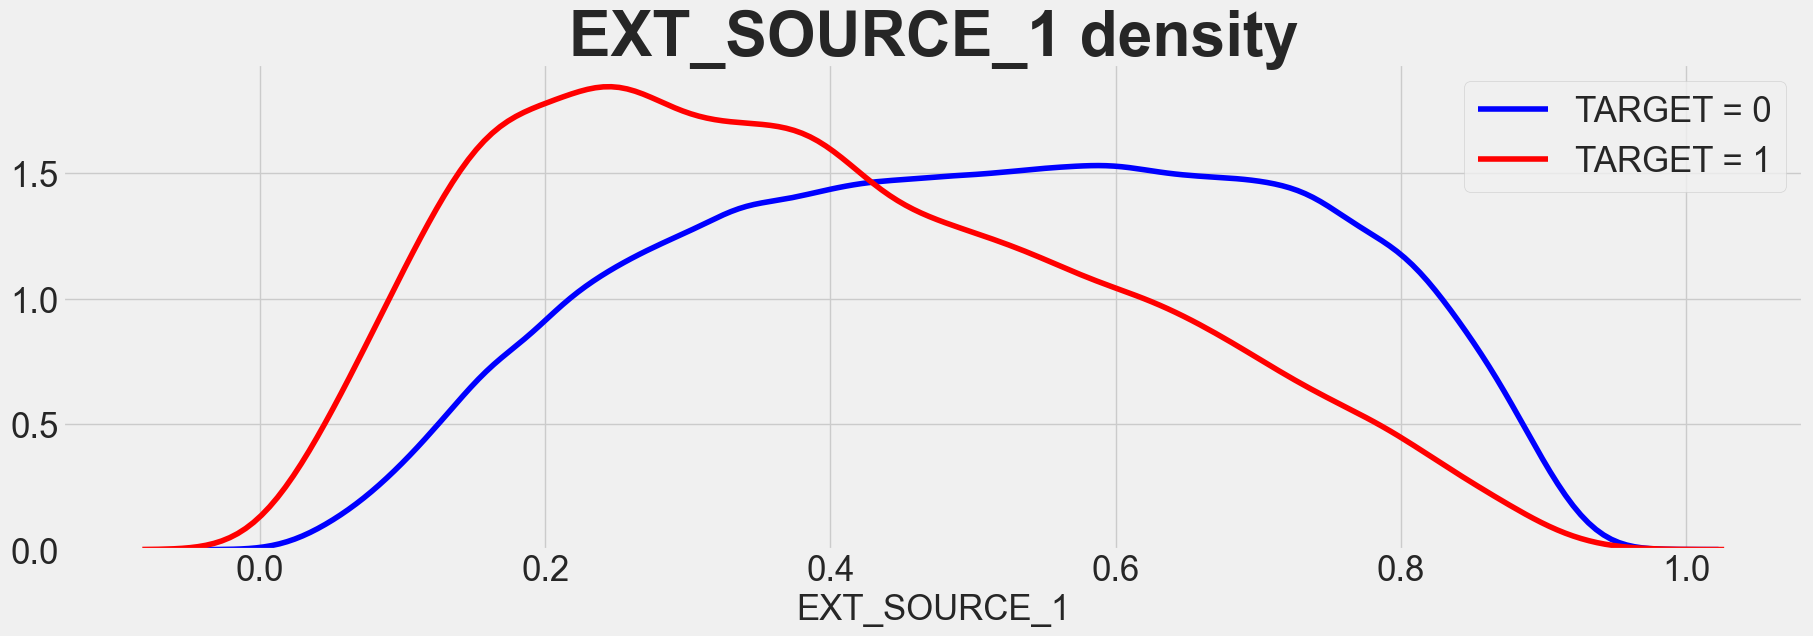

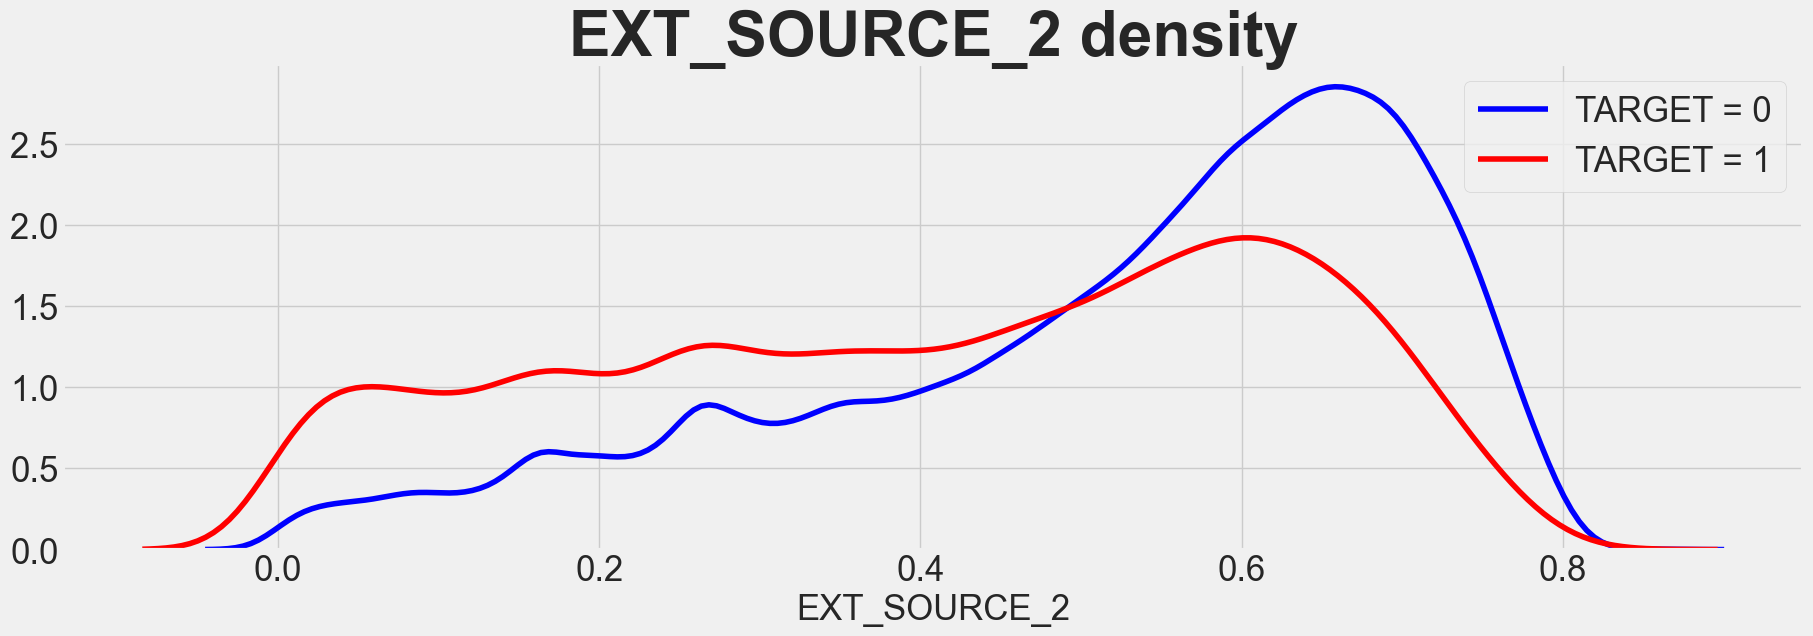

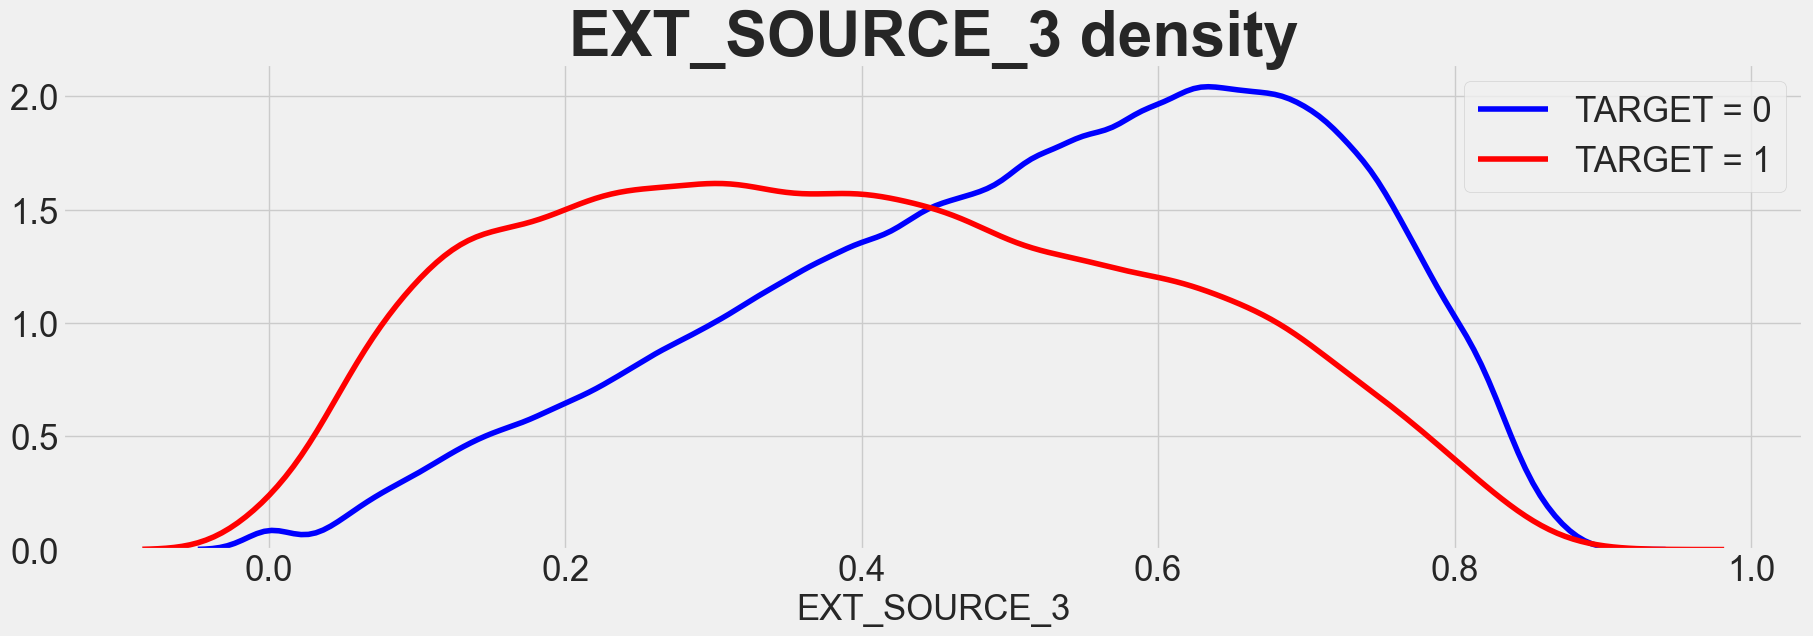

In [287]:
for ext_col in ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']:
    plot_distribution(data_application_train, ext_col, ext_col + ' density')

These sources are negatively correlated with target. Nevertheless, if the value increases, the client is more likely to reimburse the loan. Day_birth is related to ext_source_1, age may be one of the factors of this score.

**Distribution of one feature**

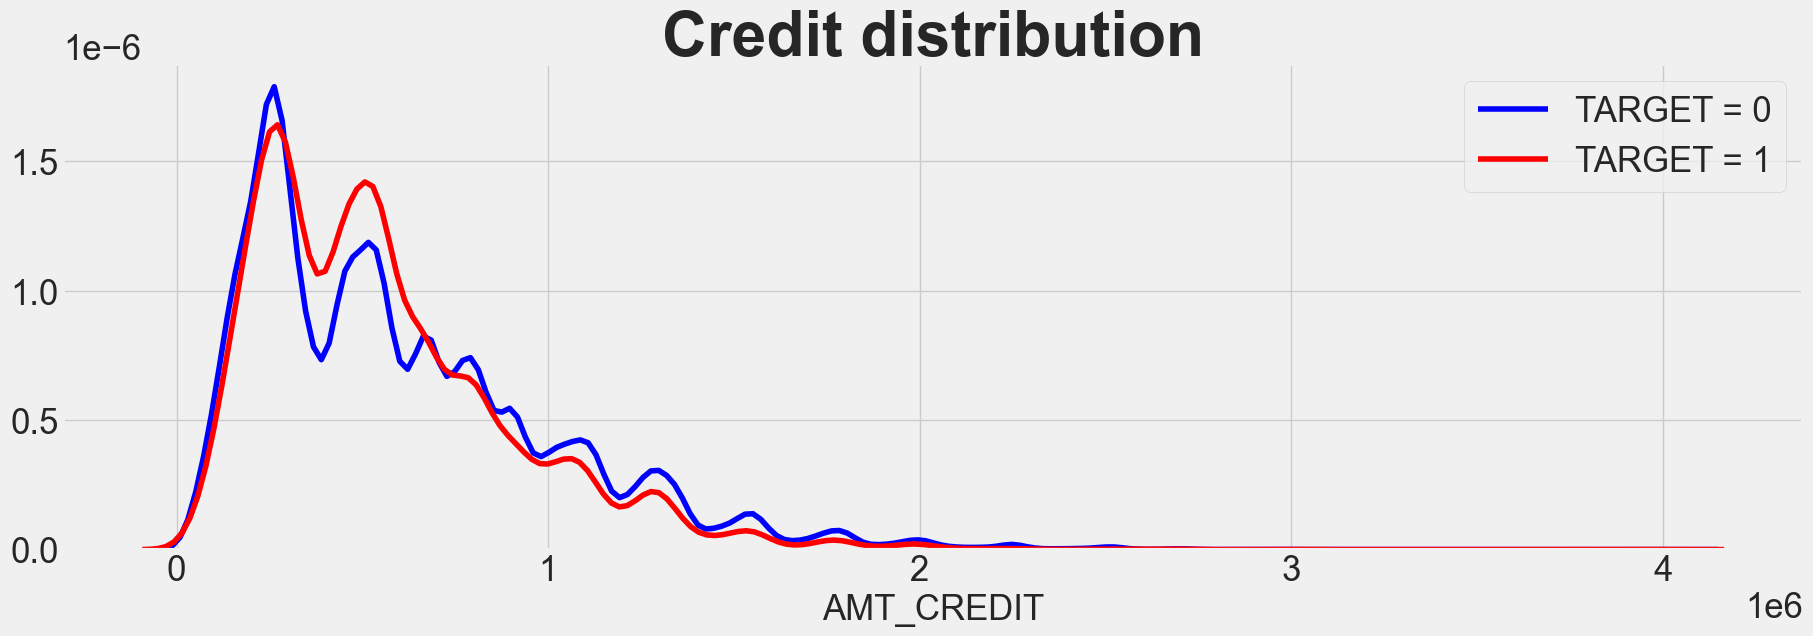

                                   -------------------------------------------------------


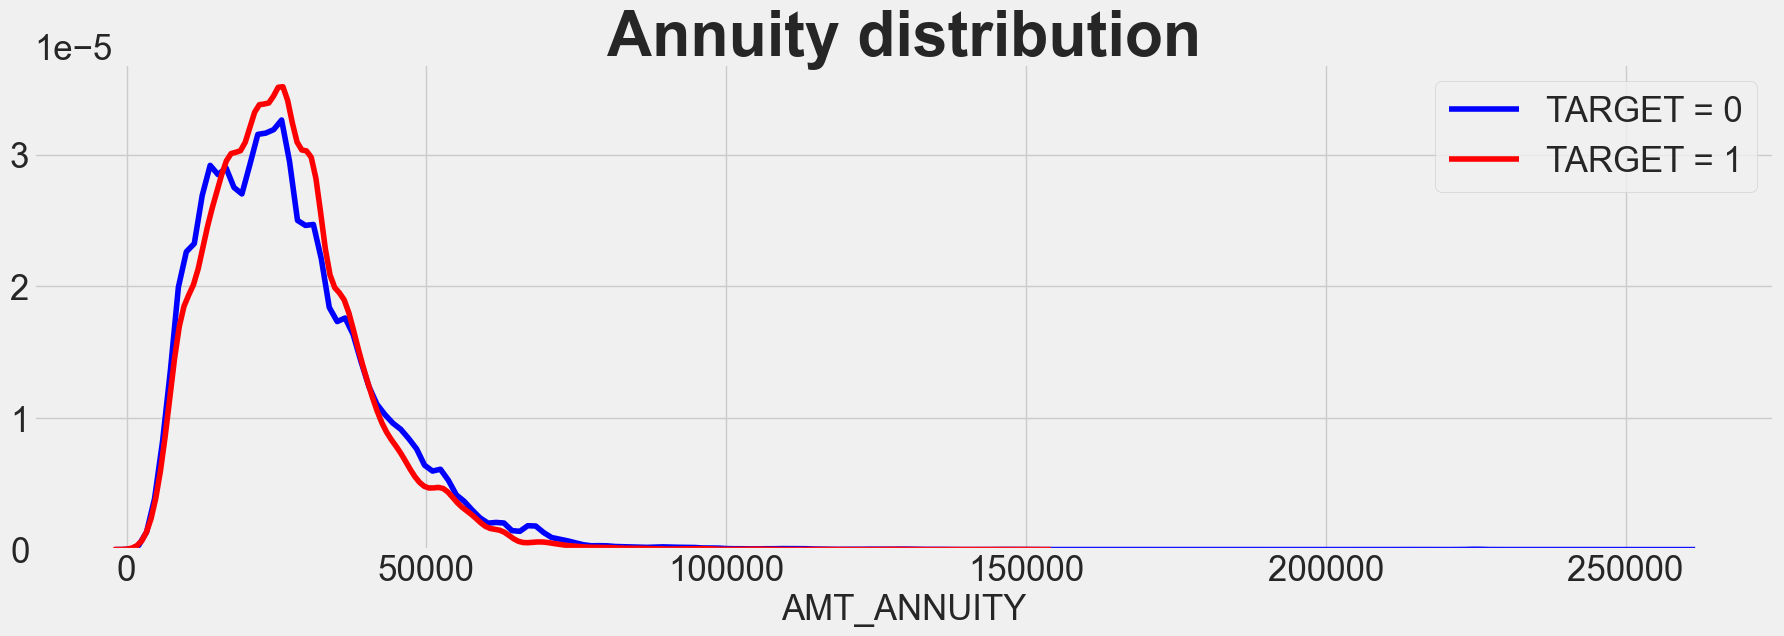

                                   -------------------------------------------------------


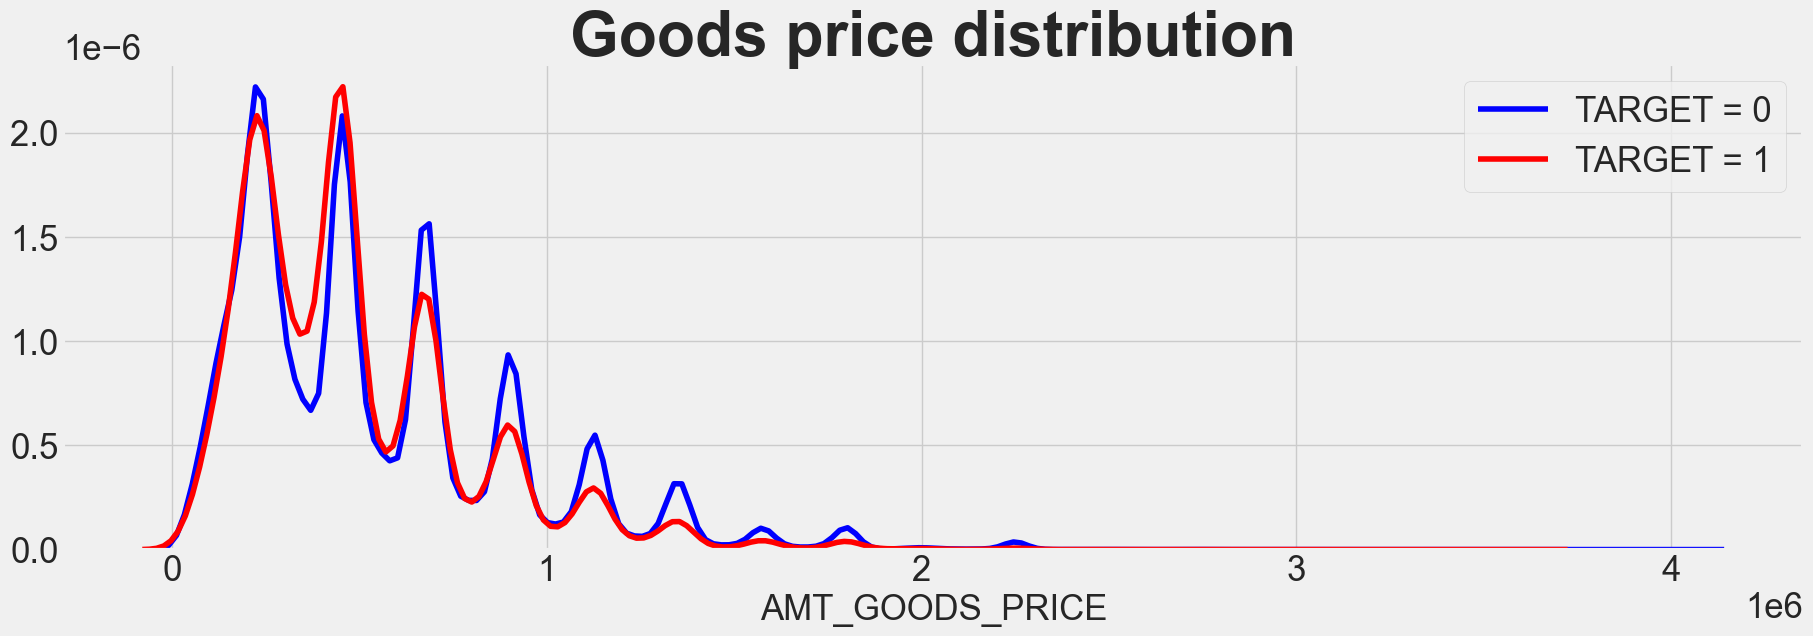

                                   -------------------------------------------------------


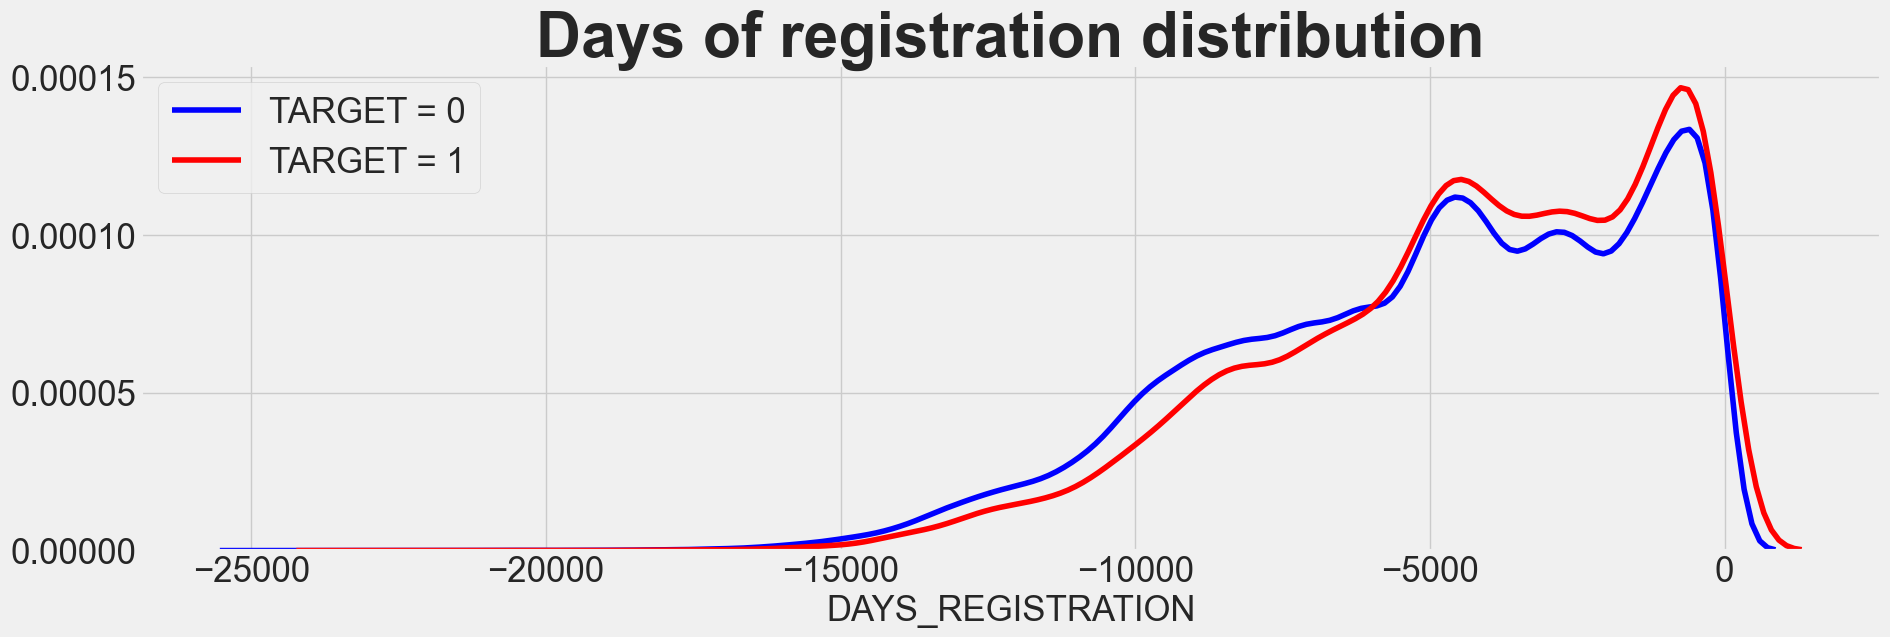

                                   -------------------------------------------------------


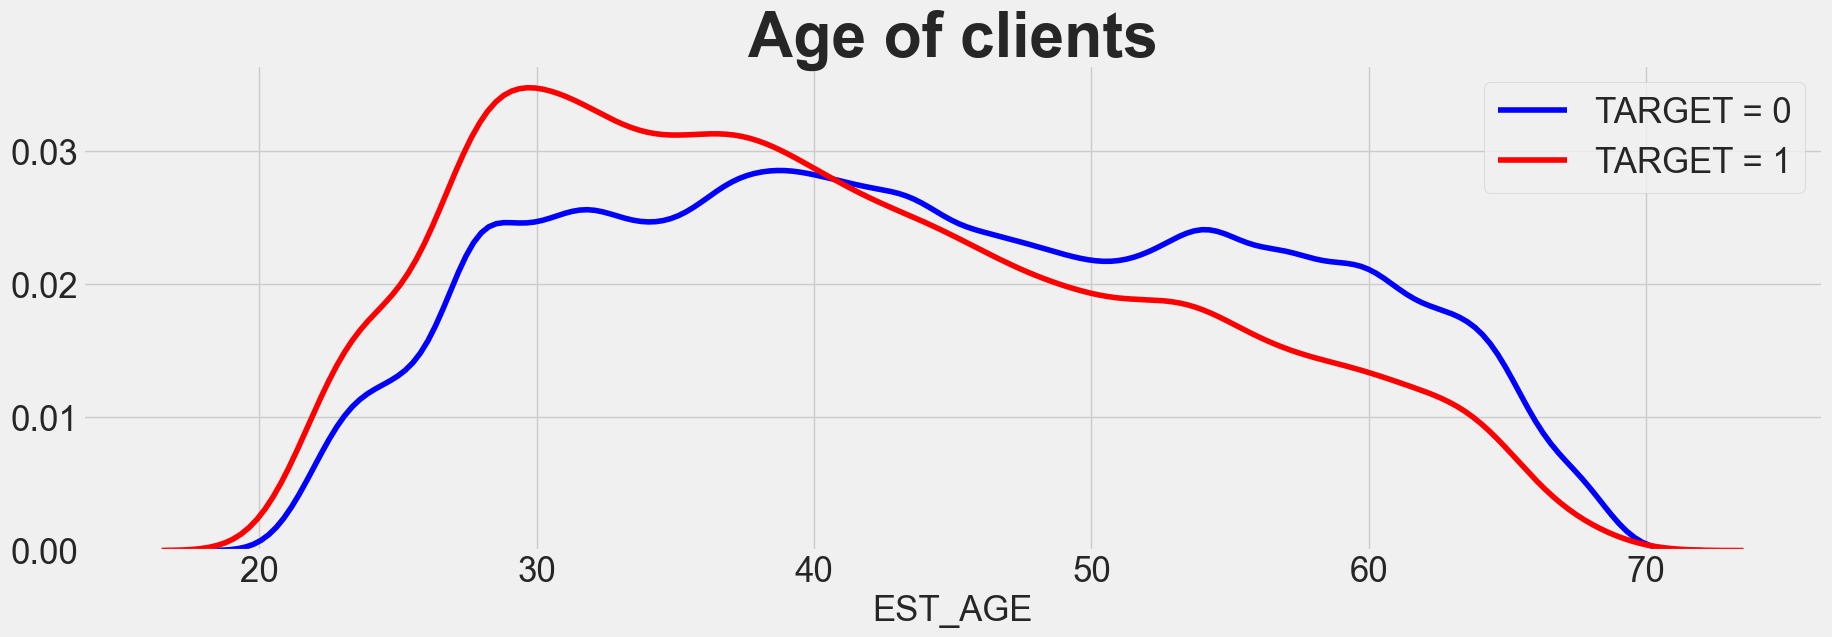

                                   -------------------------------------------------------


In [299]:
plot_distribution(data_application_train, 'AMT_CREDIT', "Credit distribution")
print("                                   -------------------------------------------------------")
plot_distribution(data_application_train, 'AMT_ANNUITY', "Annuity distribution")
print("                                   -------------------------------------------------------")
plot_distribution(data_application_train, 'AMT_GOODS_PRICE', "Goods price distribution")
print("                                   -------------------------------------------------------")
plot_distribution(data_application_train, 'DAYS_REGISTRATION', "Days of registration distribution")
print("                                   -------------------------------------------------------")
plot_distribution(data_application_train, 'EST_AGE', "Age of clients")
print("                                   -------------------------------------------------------")

#### Bureau.csv

It contains all previous loans of the clients from other banks / institutions

In [289]:
data_application_bureau_train = data_application_train.merge(data_bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

**Credit status**

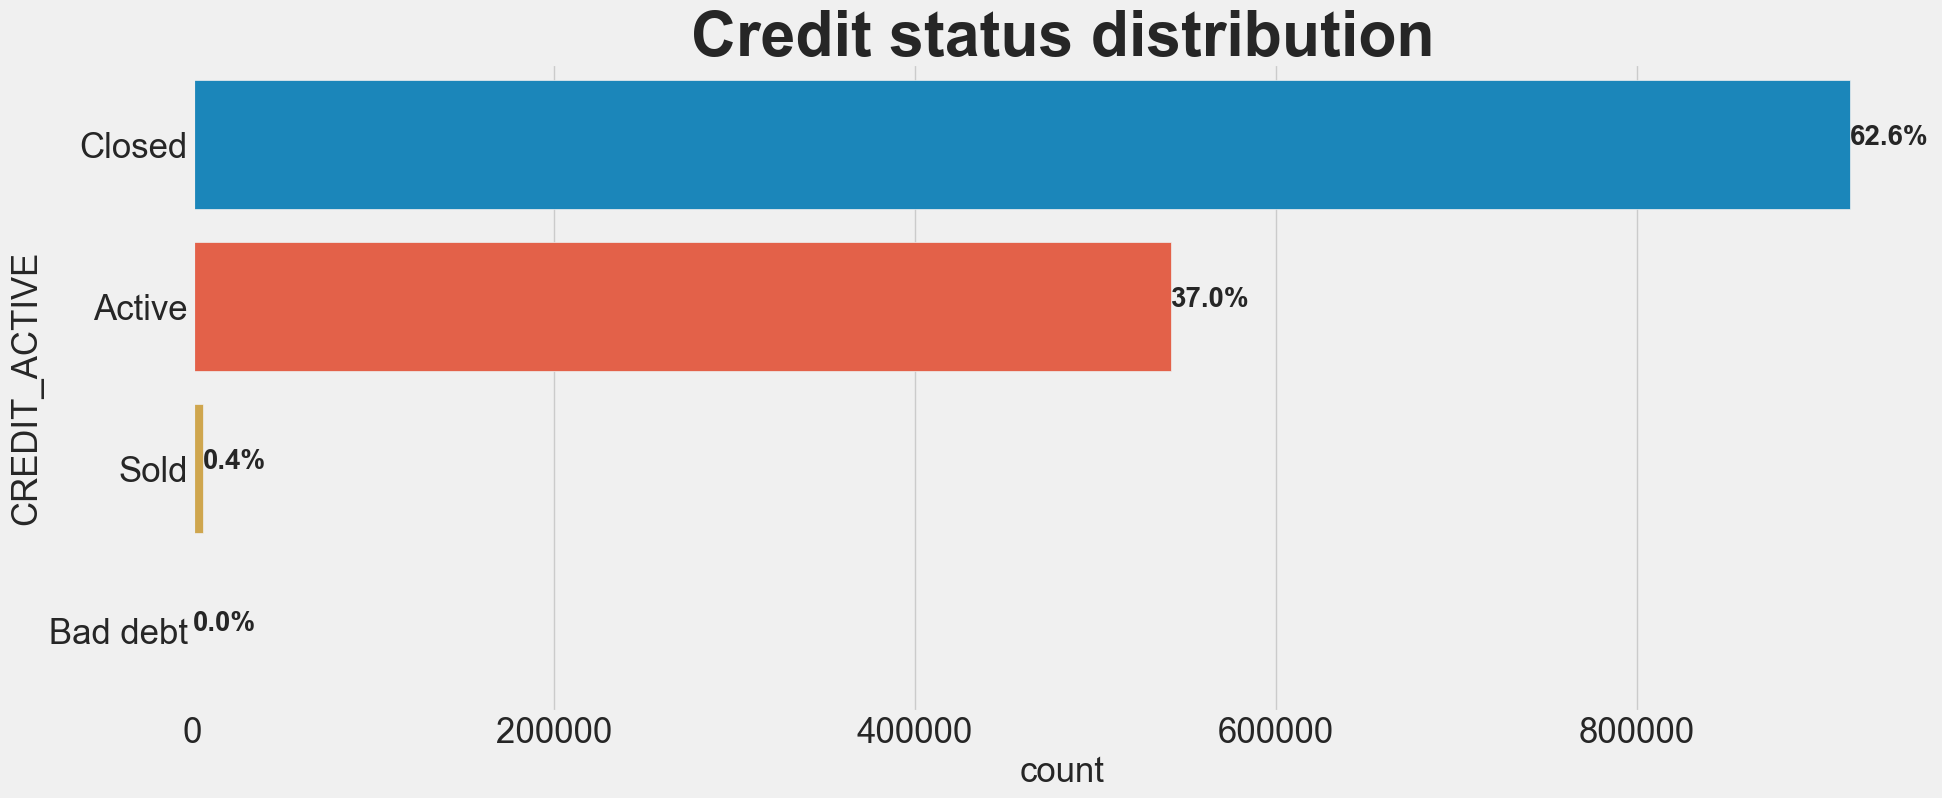

                                   -------------------------------------------------------


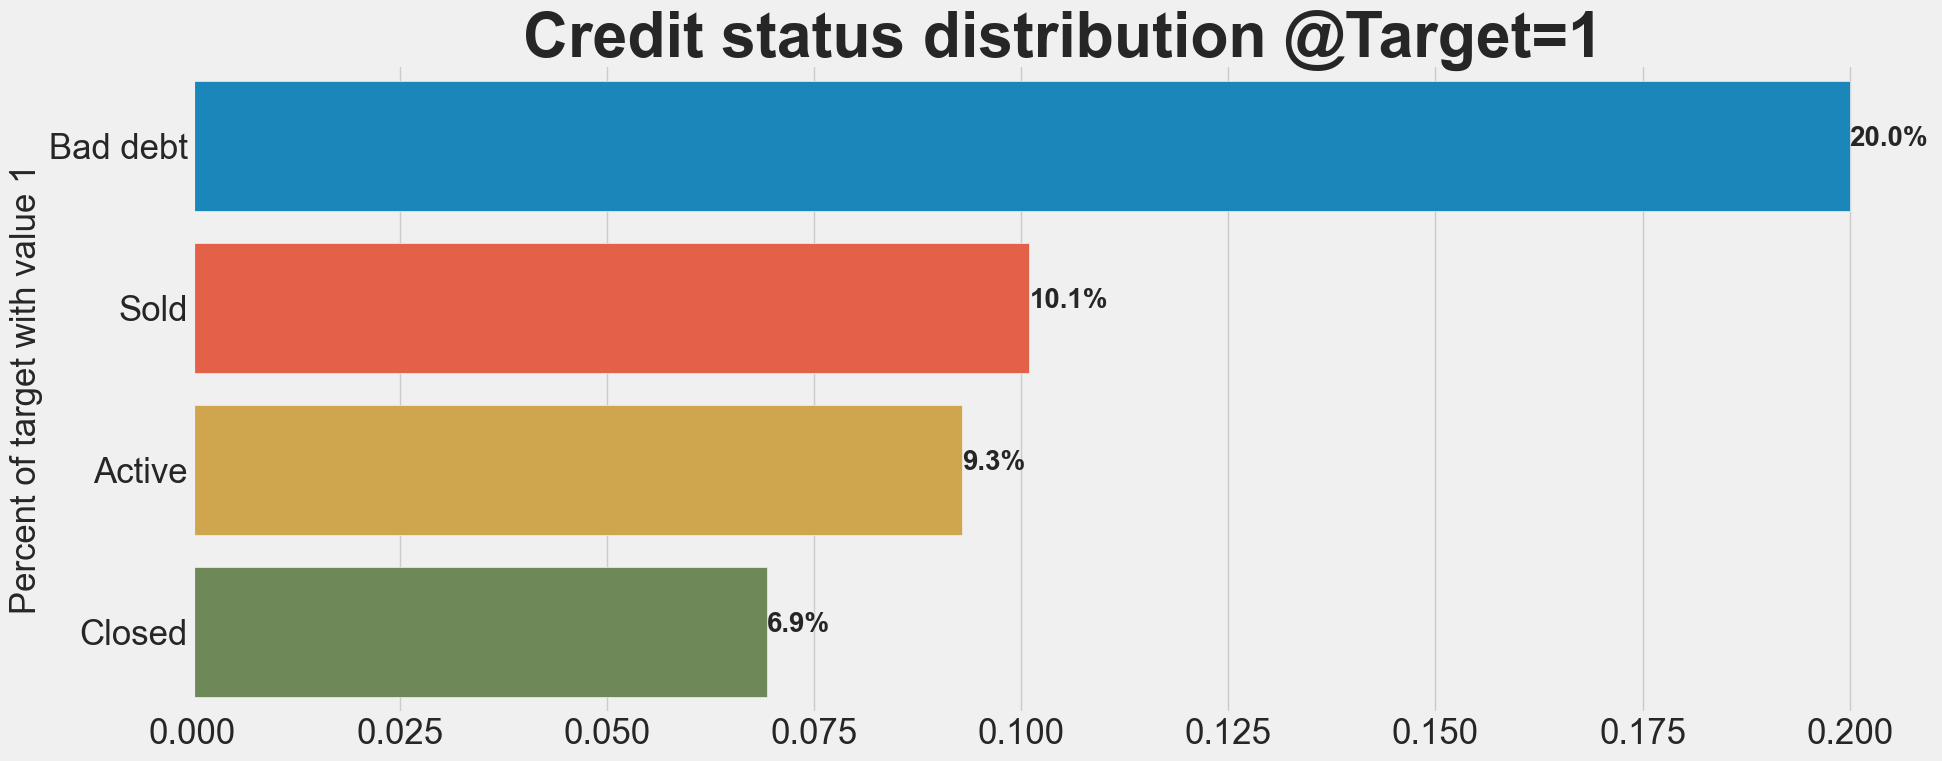

In [290]:
# CREDIT_ACTIVE
plot_stat(data_application_bureau_train, 'CREDIT_ACTIVE',"Credit status distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(data_application_bureau_train, 'CREDIT_ACTIVE',"Credit status distribution @Target=1")

**Credit currency**

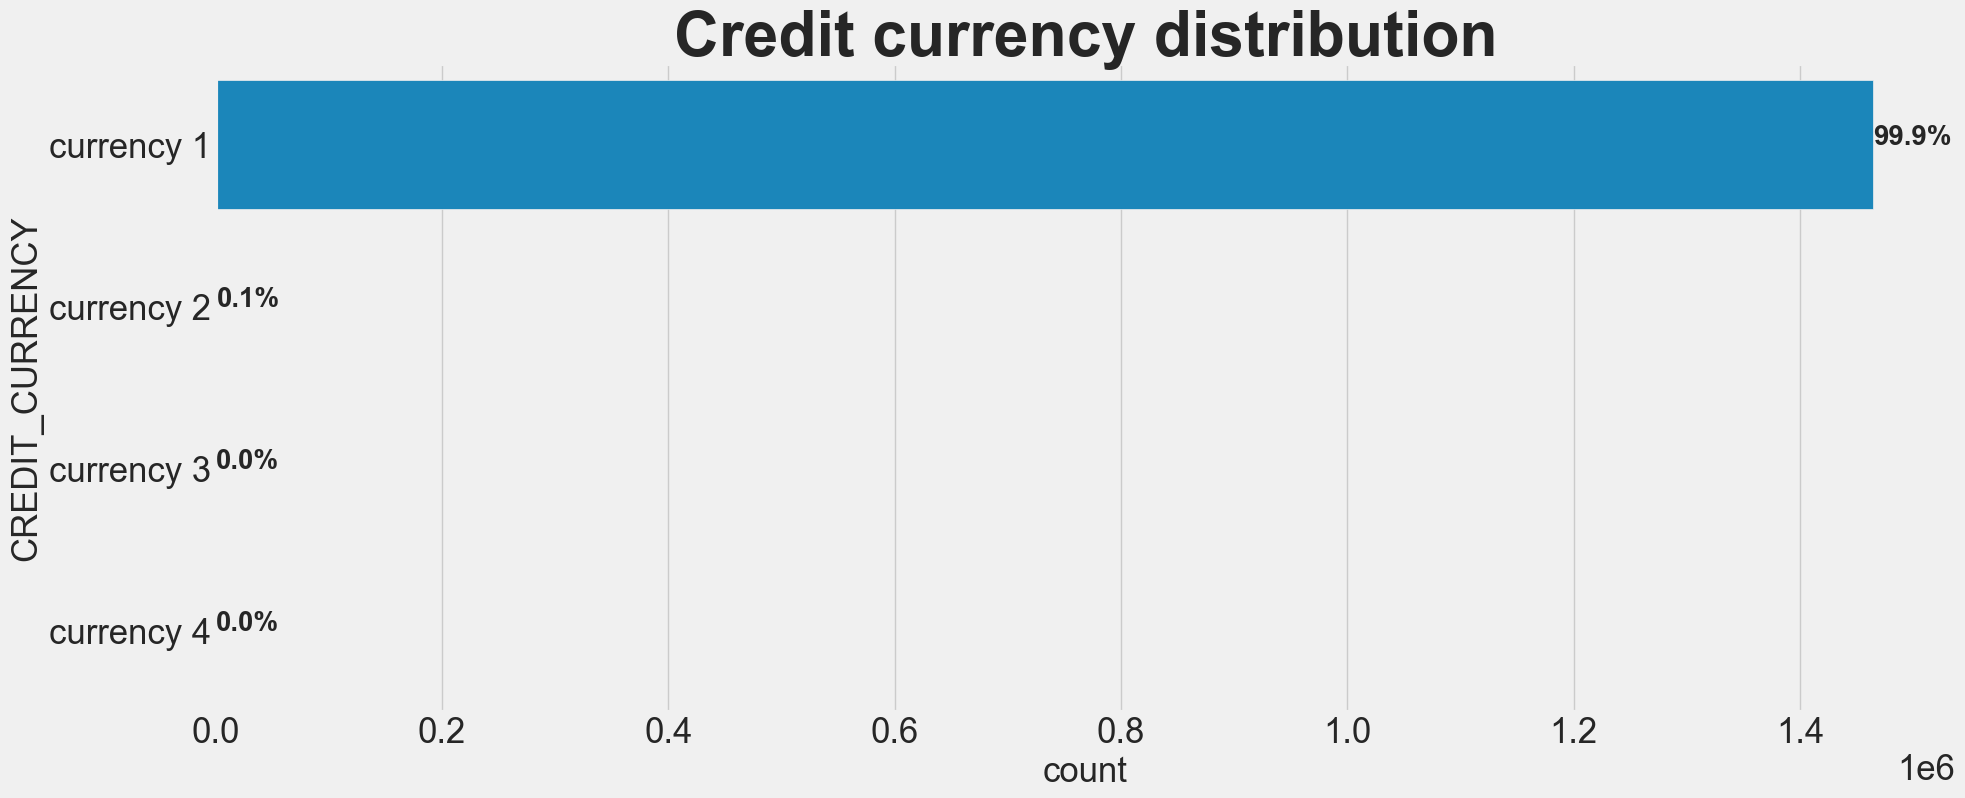

                                   -------------------------------------------------------


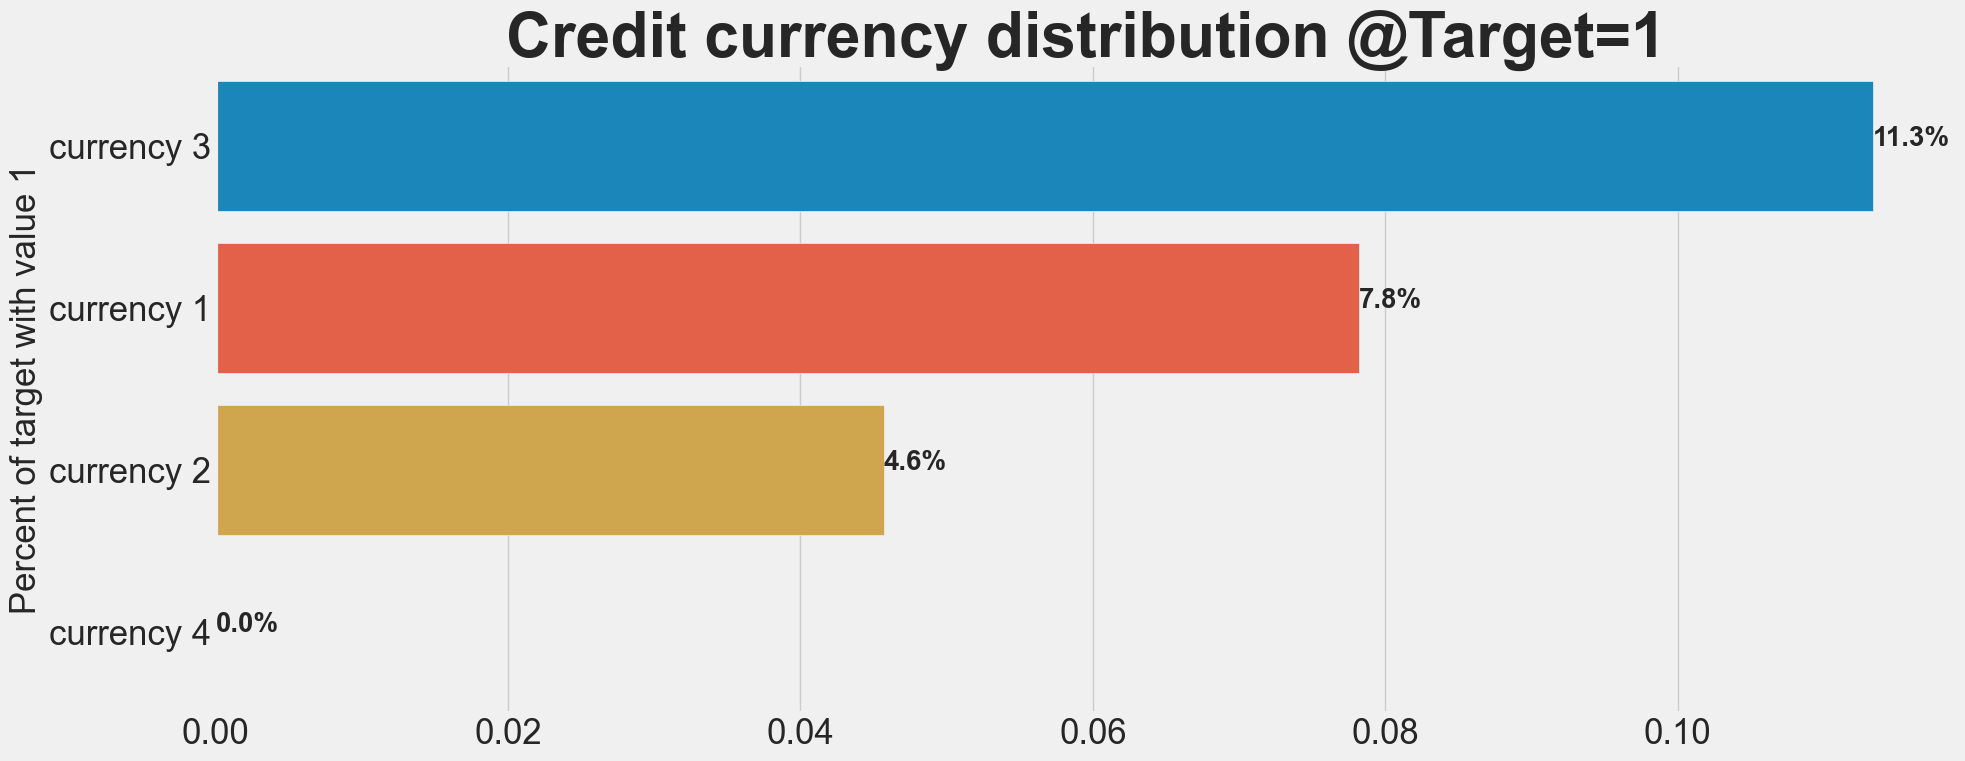

In [291]:
# CREDIT_CURRENCY
plot_stat(data_application_bureau_train, 'CREDIT_CURRENCY',"Credit currency distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(data_application_bureau_train, 'CREDIT_CURRENCY',"Credit currency distribution @Target=1")

**Credit type**

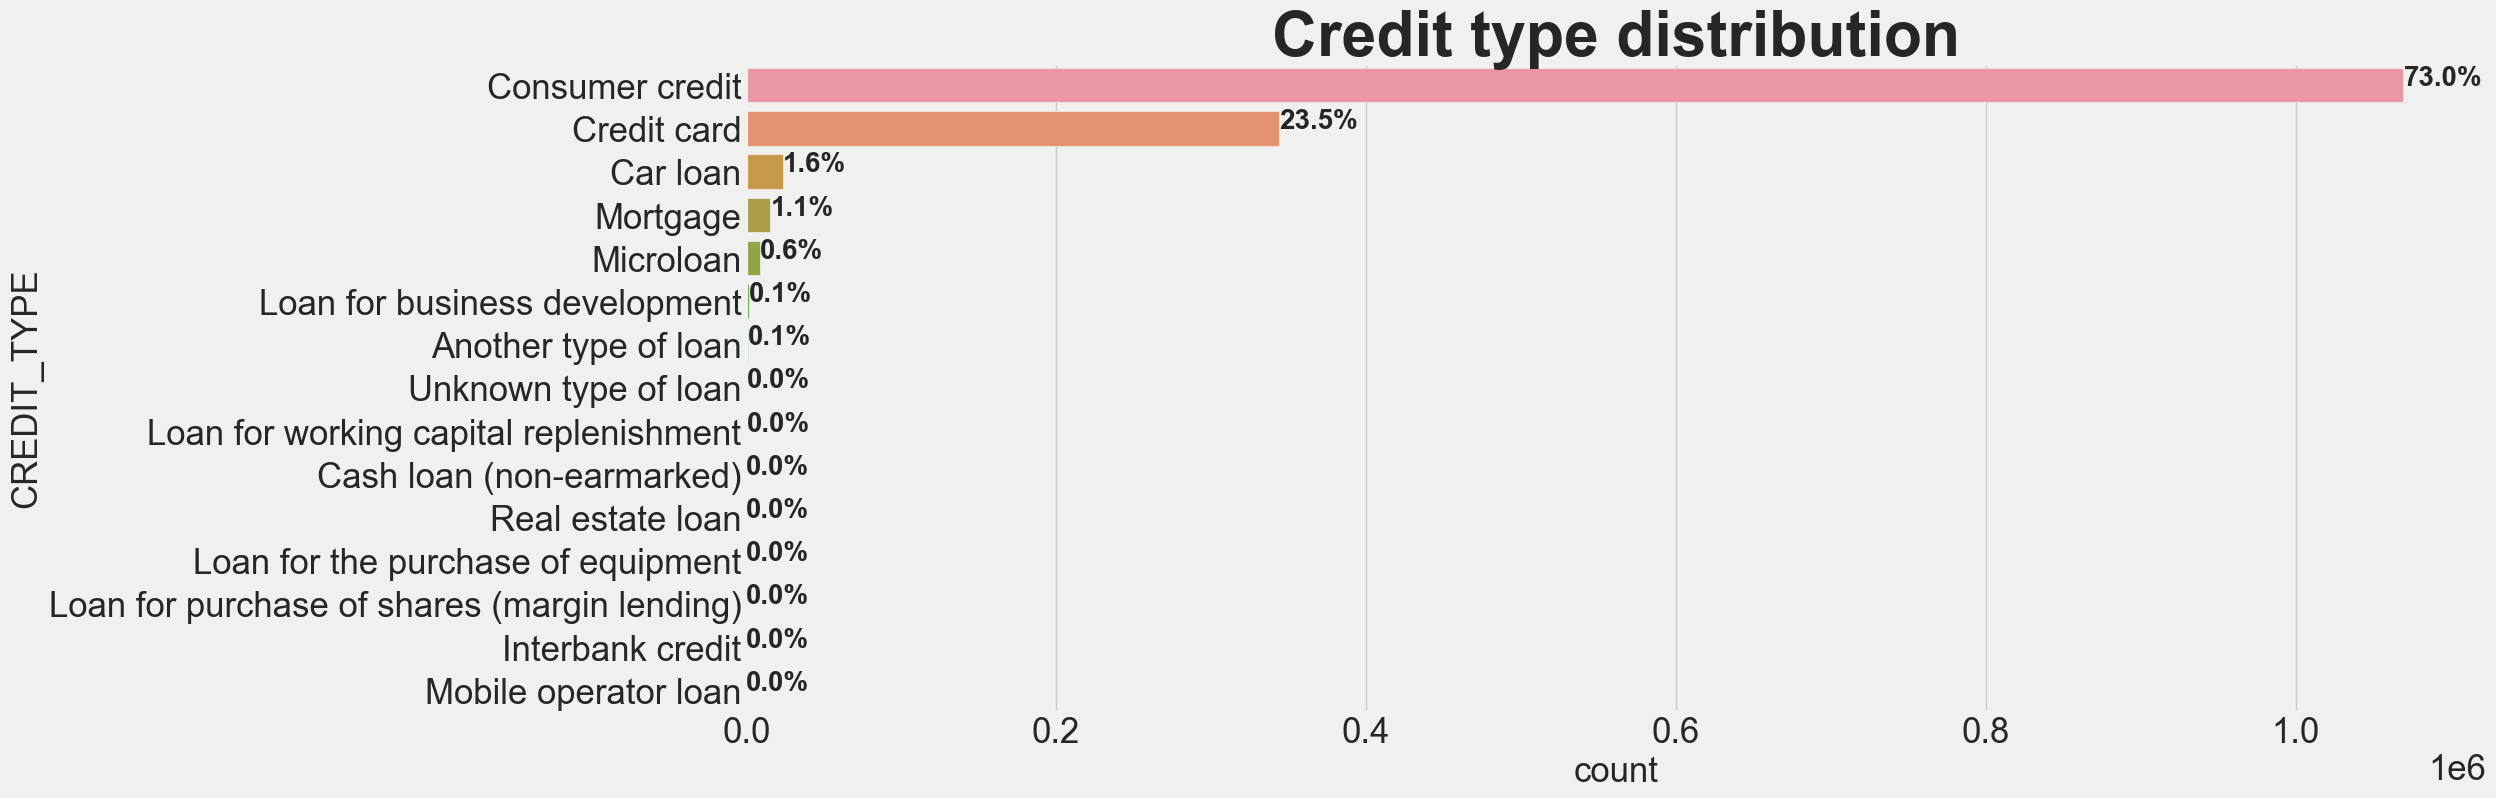

                                   -------------------------------------------------------


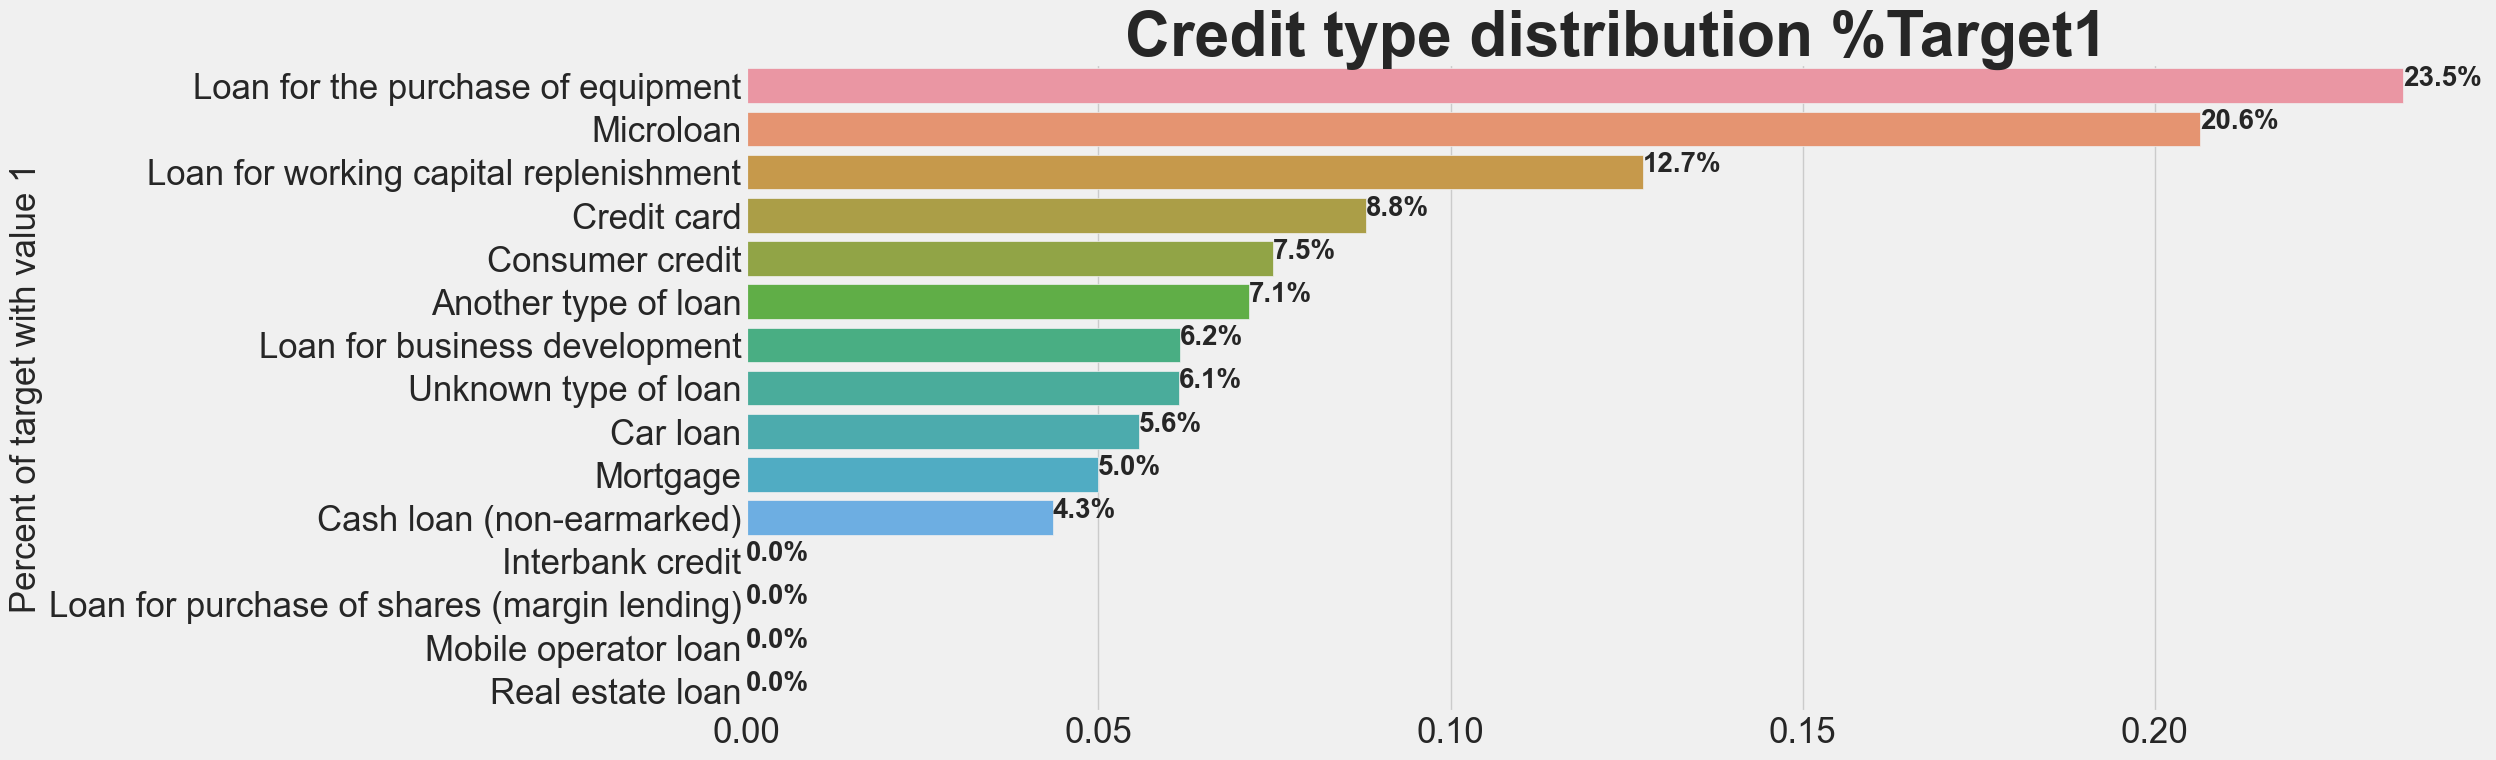

In [292]:
# CREDIT_TYPE
plot_stat(data_application_bureau_train, 'CREDIT_TYPE',"Credit type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(data_application_bureau_train, 'CREDIT_TYPE',"Credit type distribution %Target1")

#### EDA previous_application.csv

Information about all previous loan requests of clients having loans

In [293]:
data_previous_application_application_train = data_application_train.merge(data_previous_application, 
                                                 left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

**Contract type**

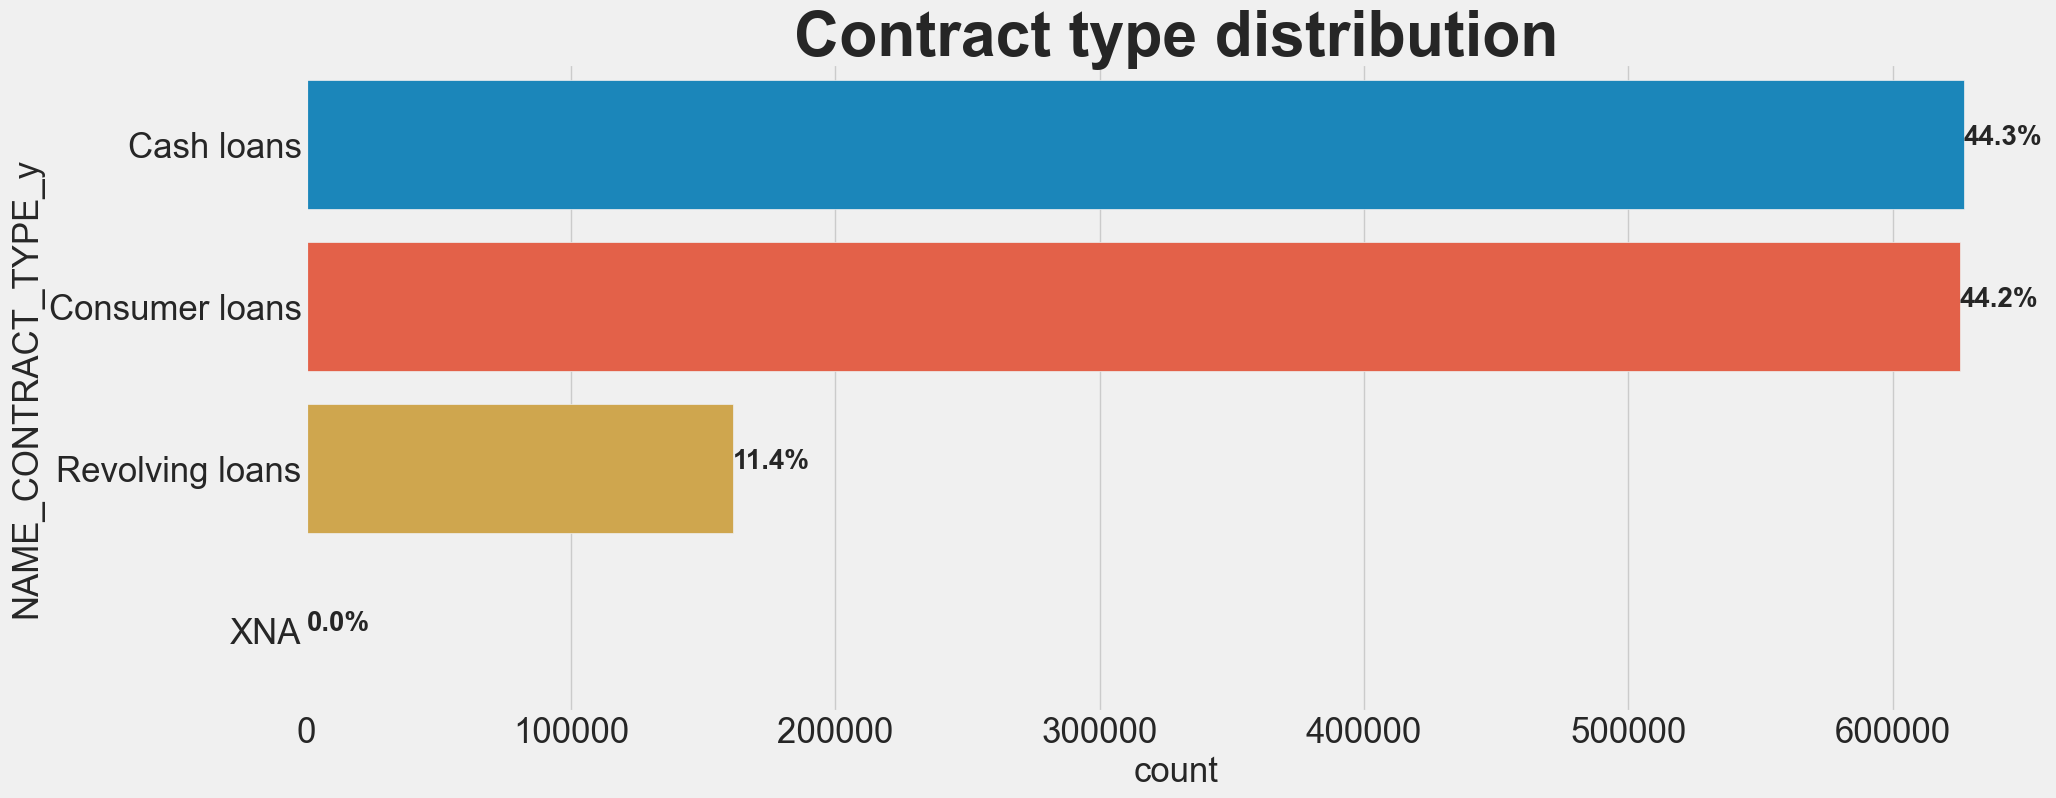

                                   -------------------------------------------------------


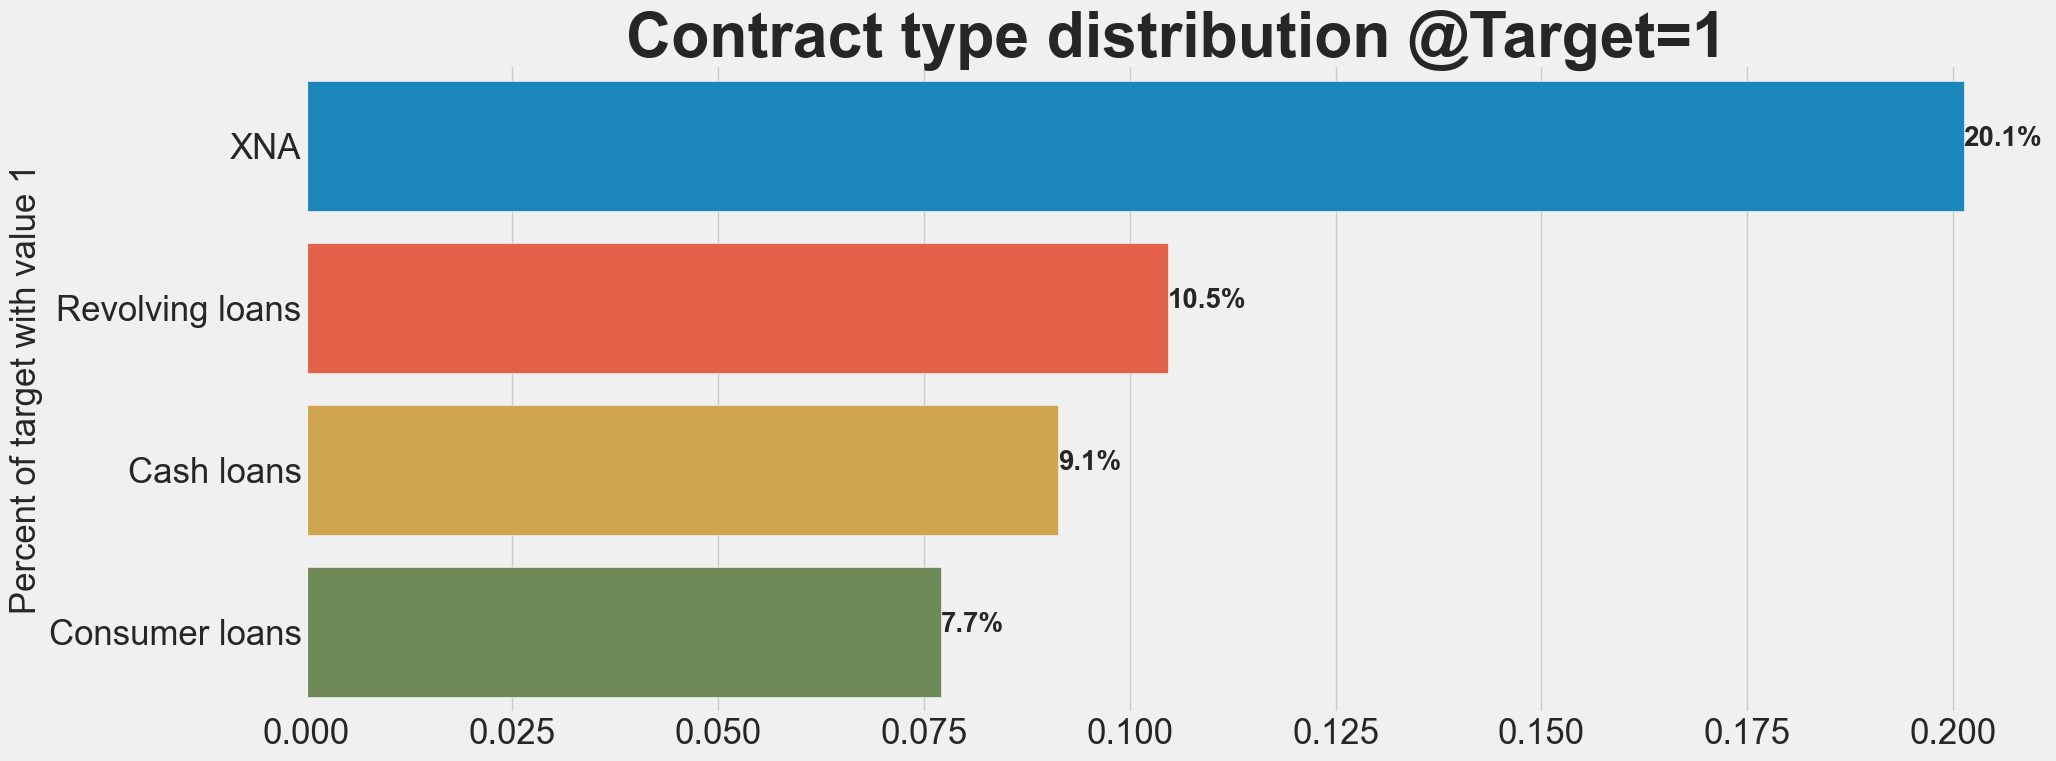

In [294]:
# NAME_CONTRACT_TYPE_y
plot_stat(data_previous_application_application_train, 'NAME_CONTRACT_TYPE_y',"Contract type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(data_previous_application_application_train, 'NAME_CONTRACT_TYPE_y',"Contract type distribution @Target=1")

**Contract status**

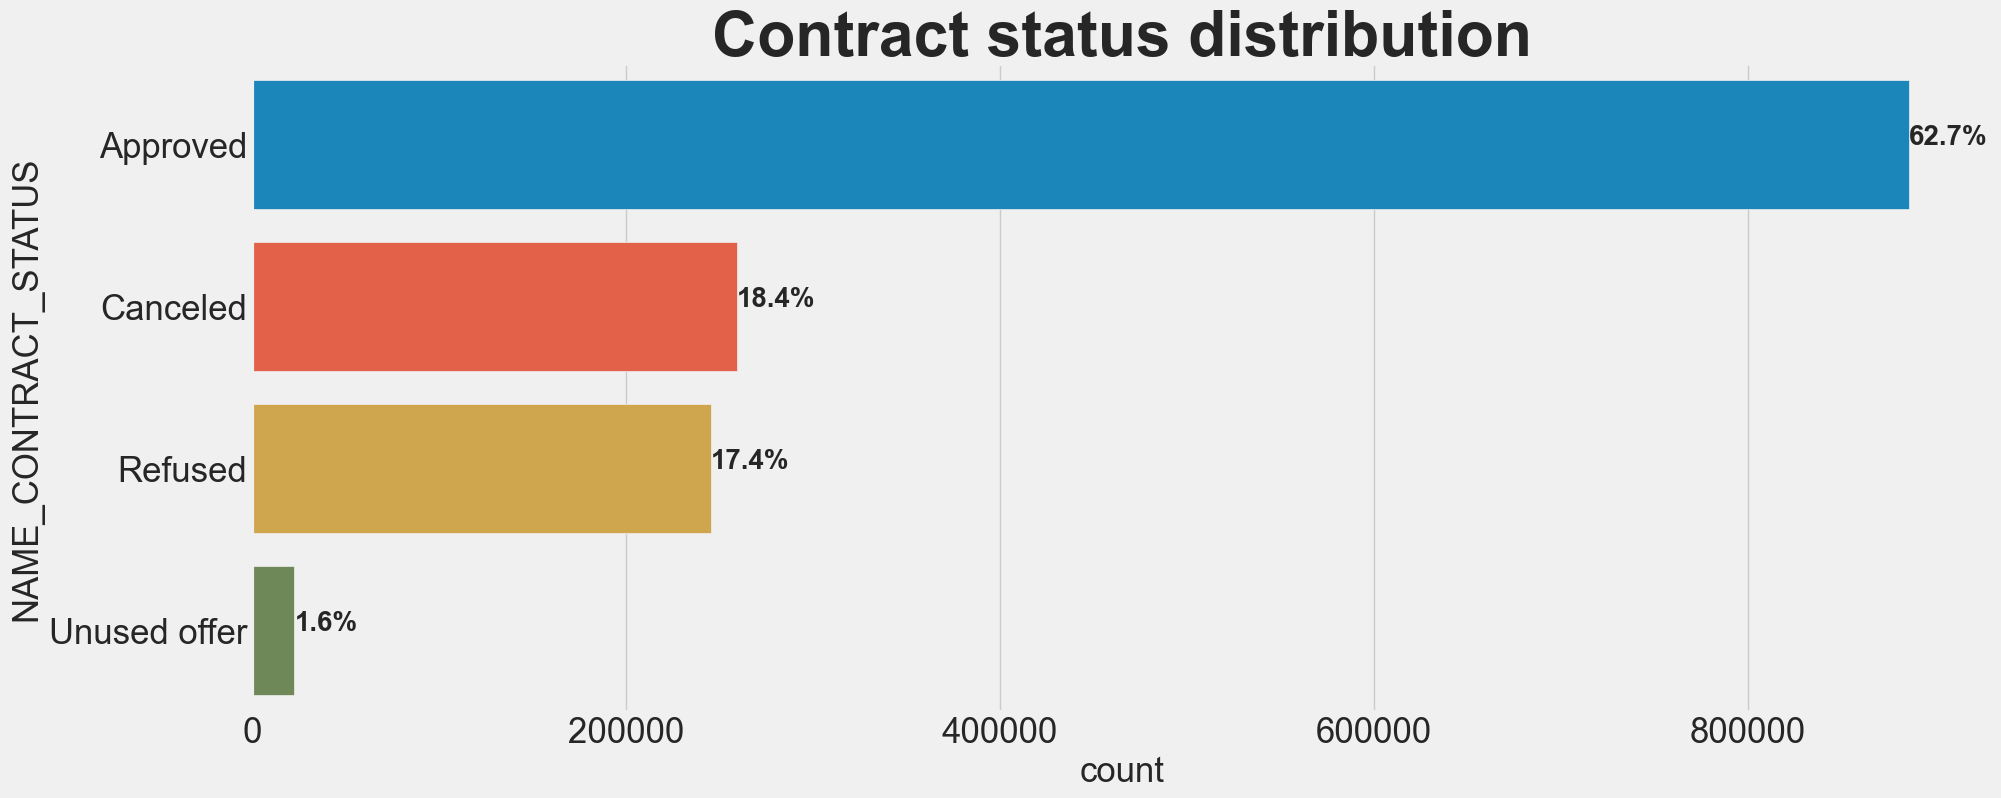

                                   -------------------------------------------------------


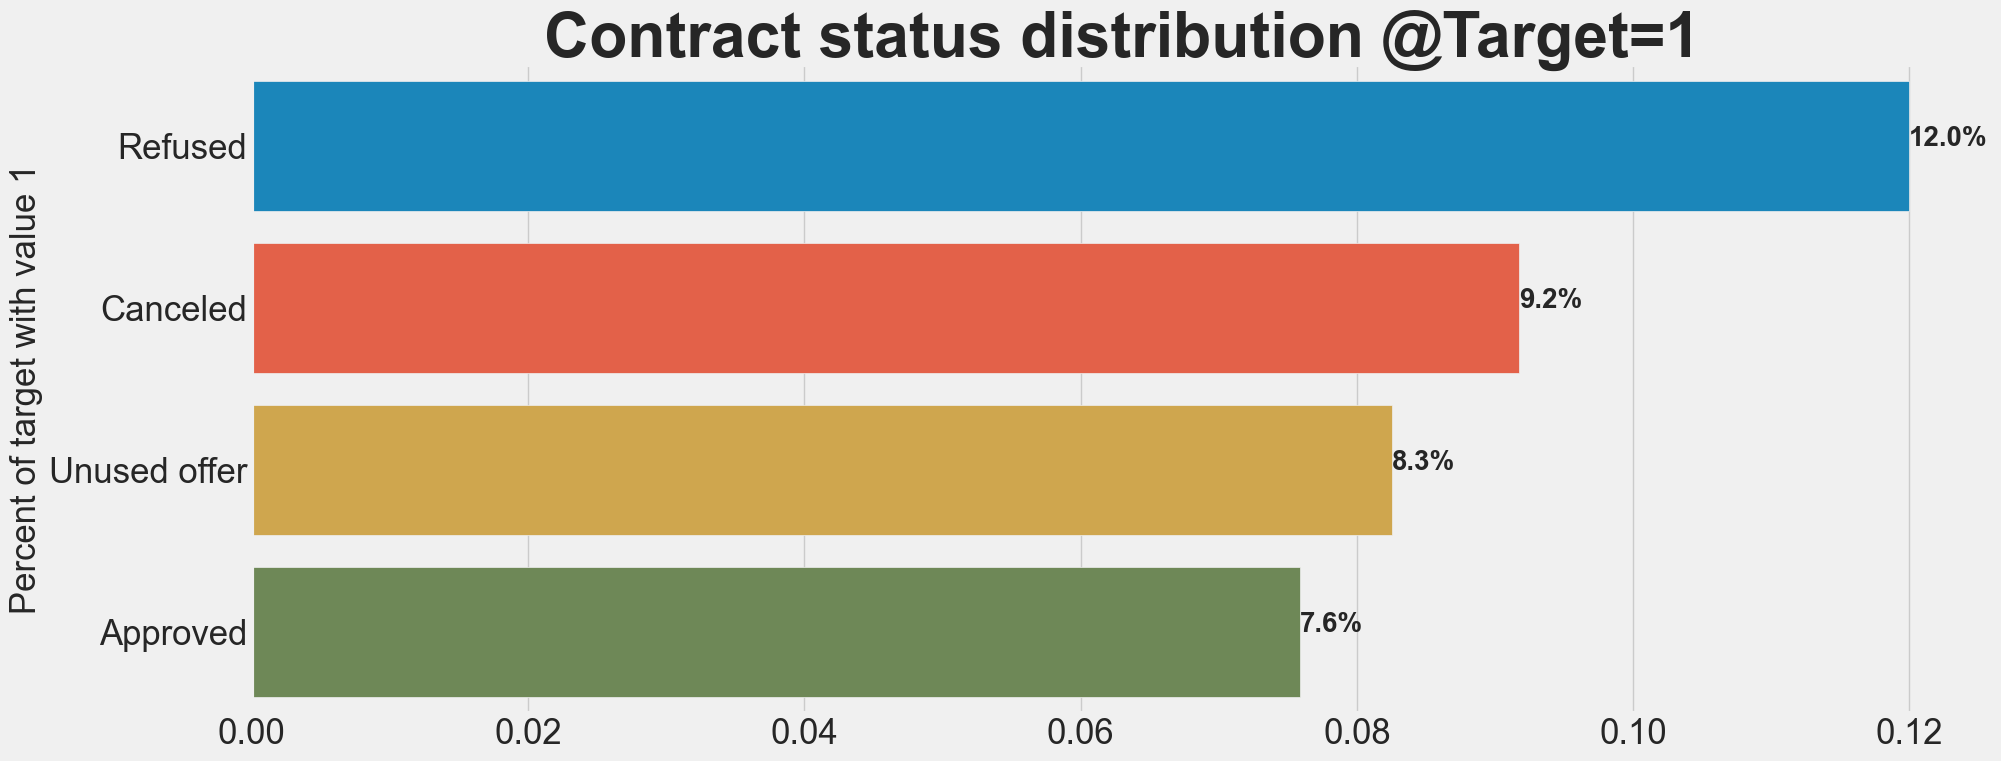

In [295]:
# NAME_CONTRACT_STATUS
plot_stat(data_previous_application_application_train, 'NAME_CONTRACT_STATUS',"Contract status distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(data_previous_application_application_train, 'NAME_CONTRACT_STATUS',"Contract status distribution @Target=1")

**Payment type**

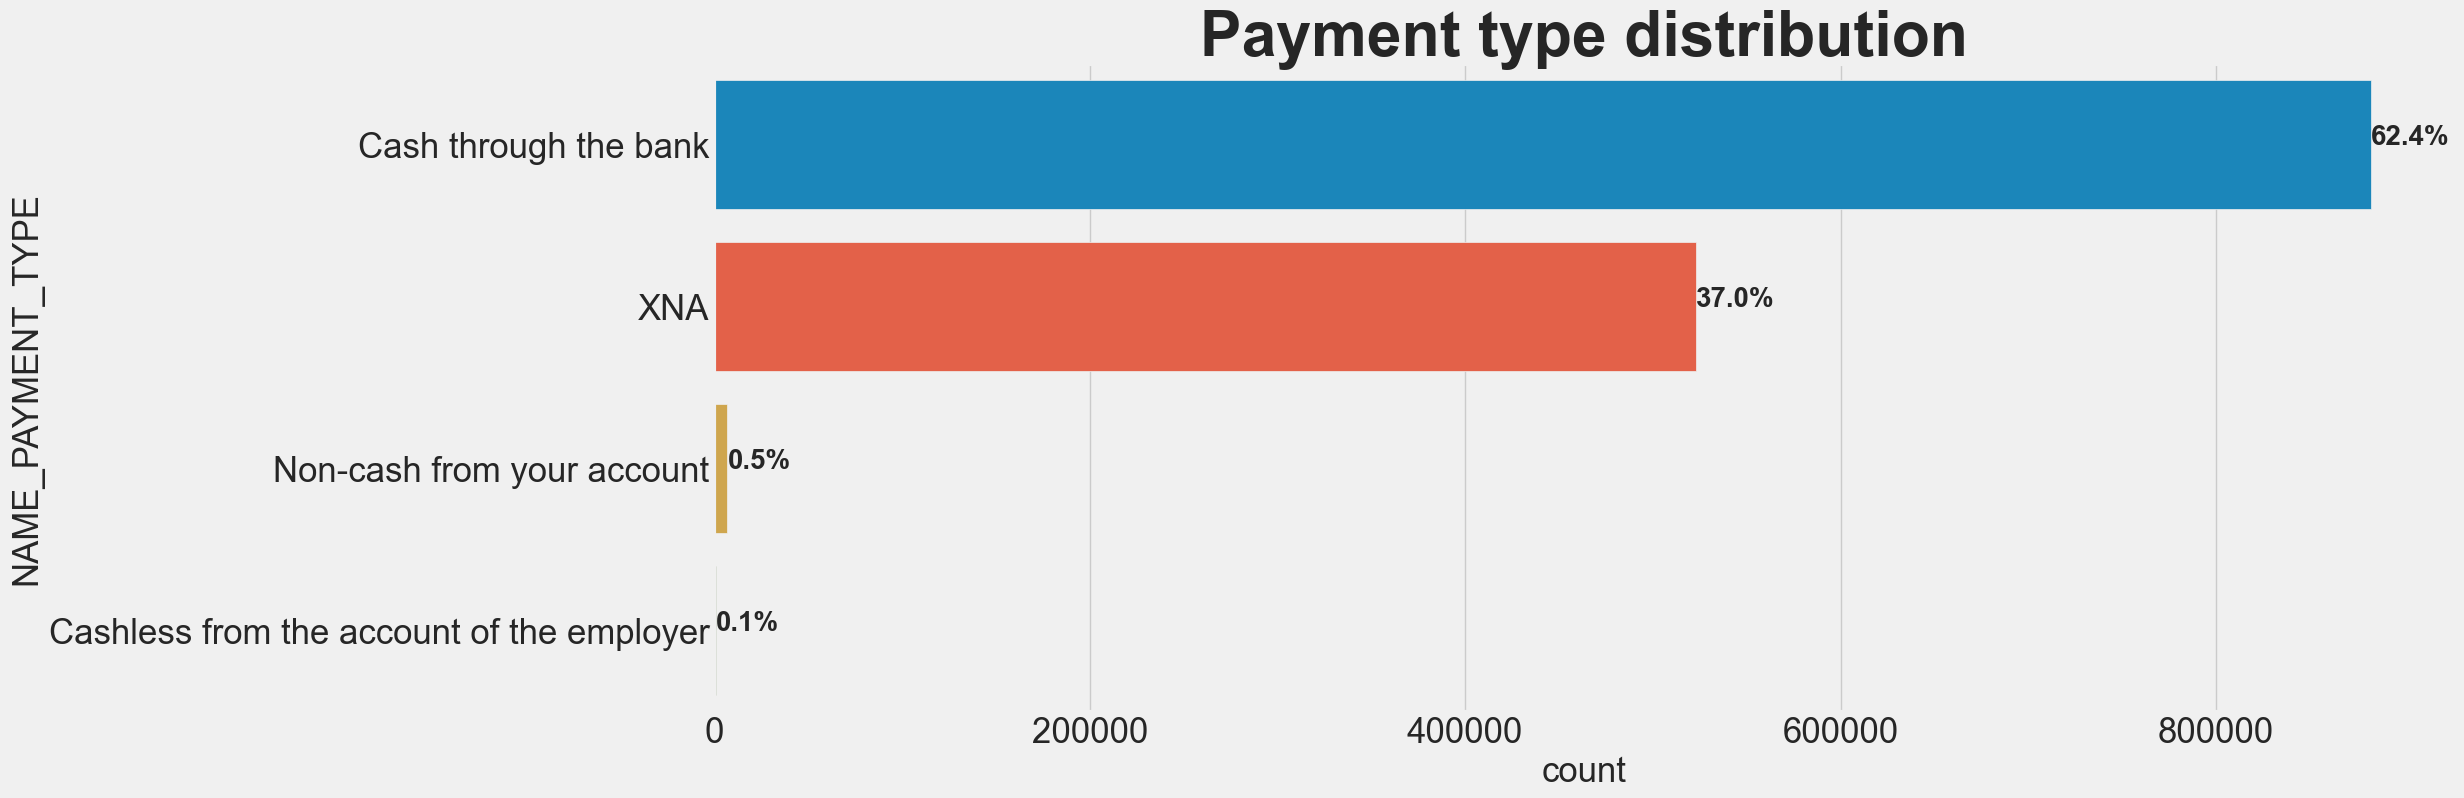

                                   -------------------------------------------------------


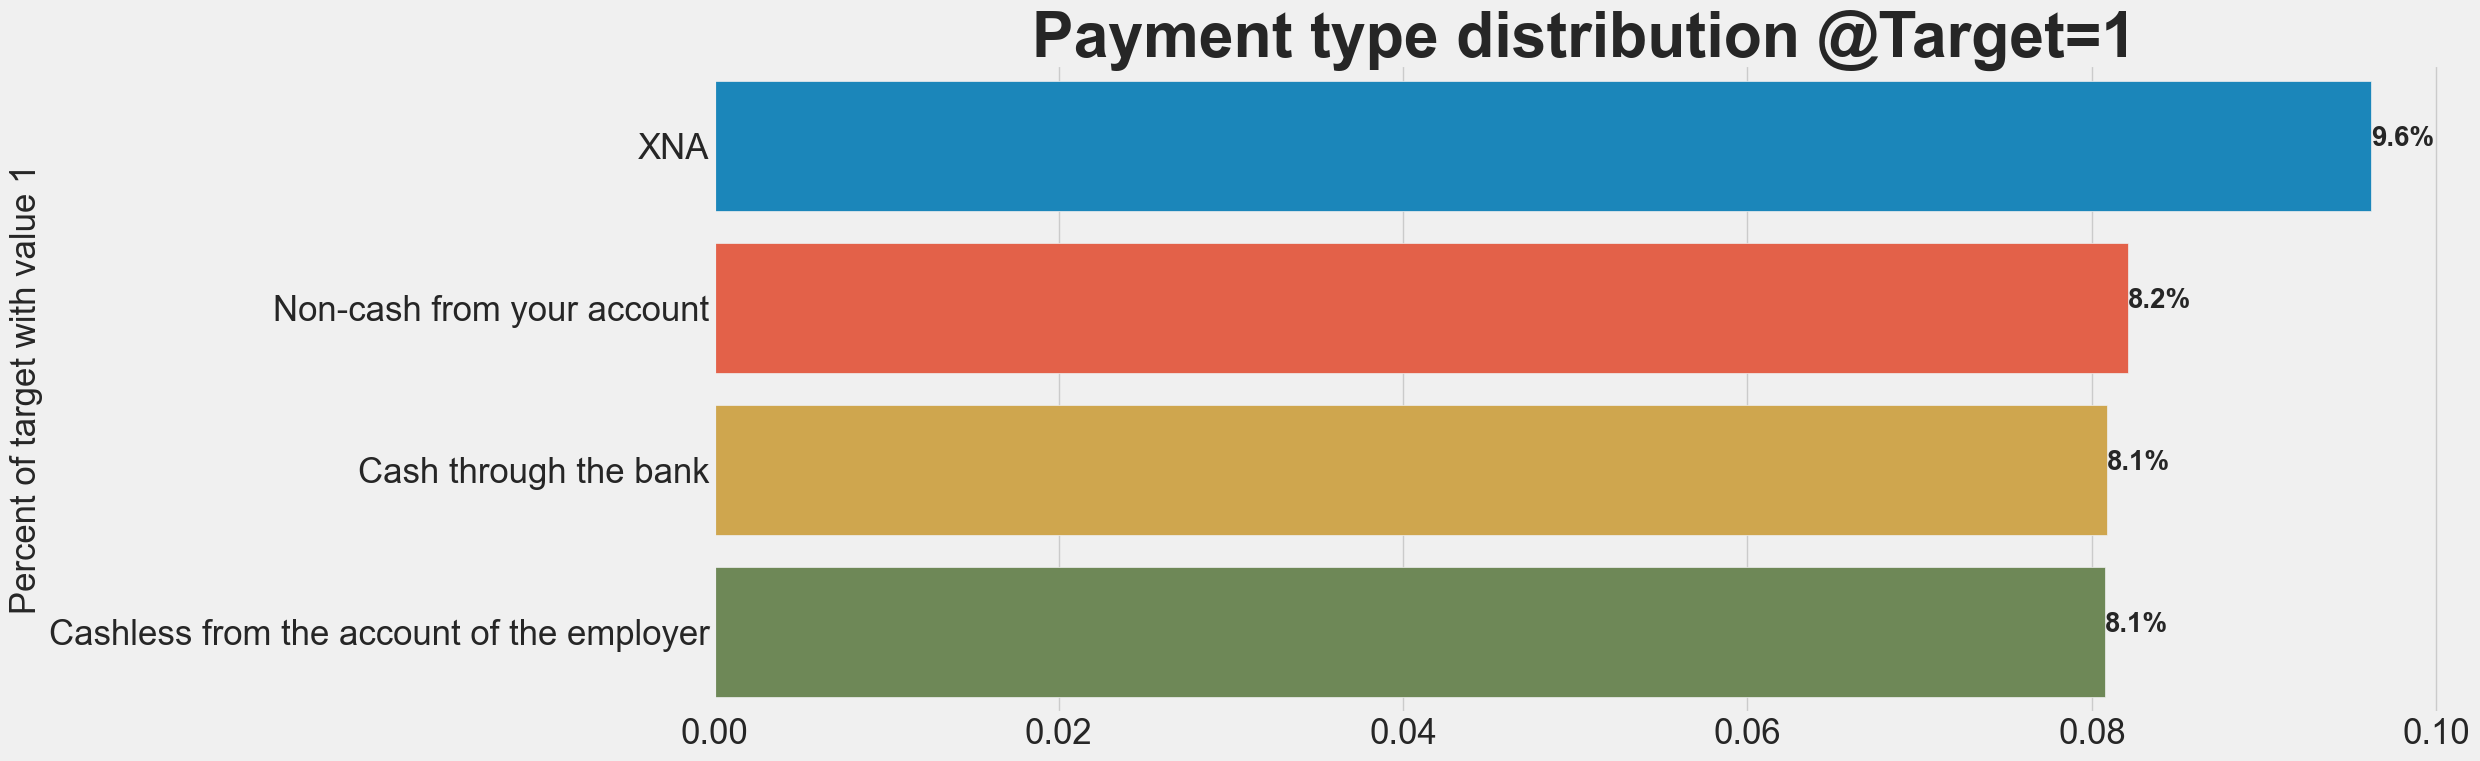

In [296]:
# NAME_PAYMENT_TYPE
plot_stat(data_previous_application_application_train, 'NAME_PAYMENT_TYPE',"Payment type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(data_previous_application_application_train, 'NAME_PAYMENT_TYPE',"Payment type distribution @Target=1")

Payment is done mostly in cash through the bank. Defaut loan reimbursement type is equally distributed.

**Client type**

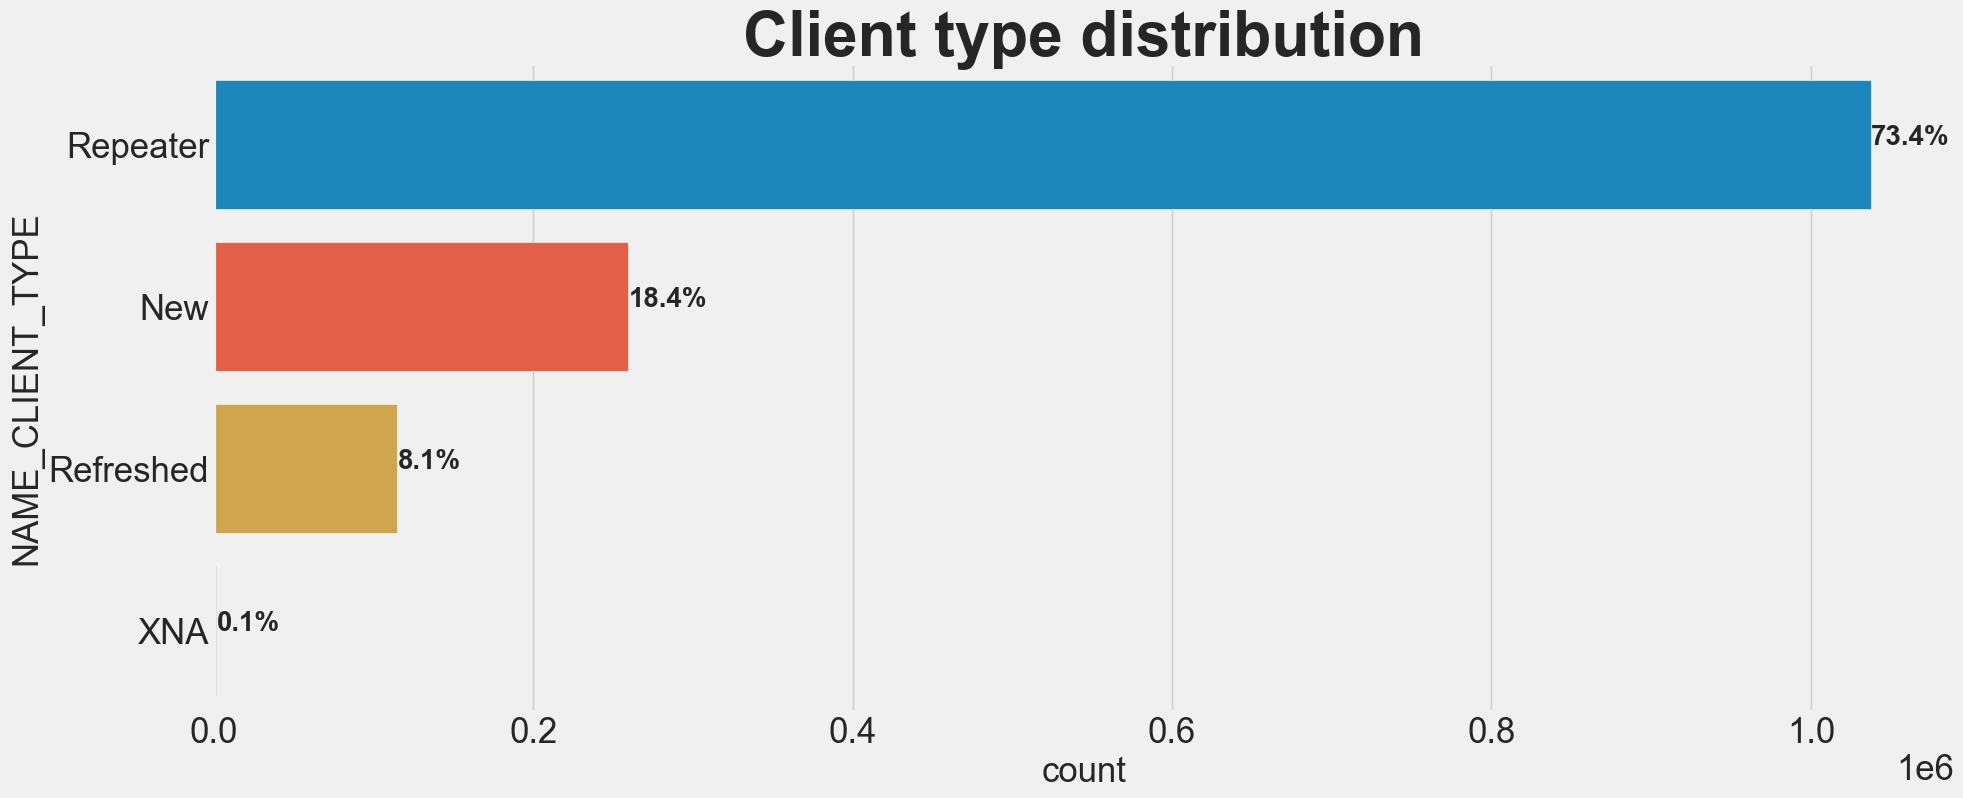

                                   -------------------------------------------------------


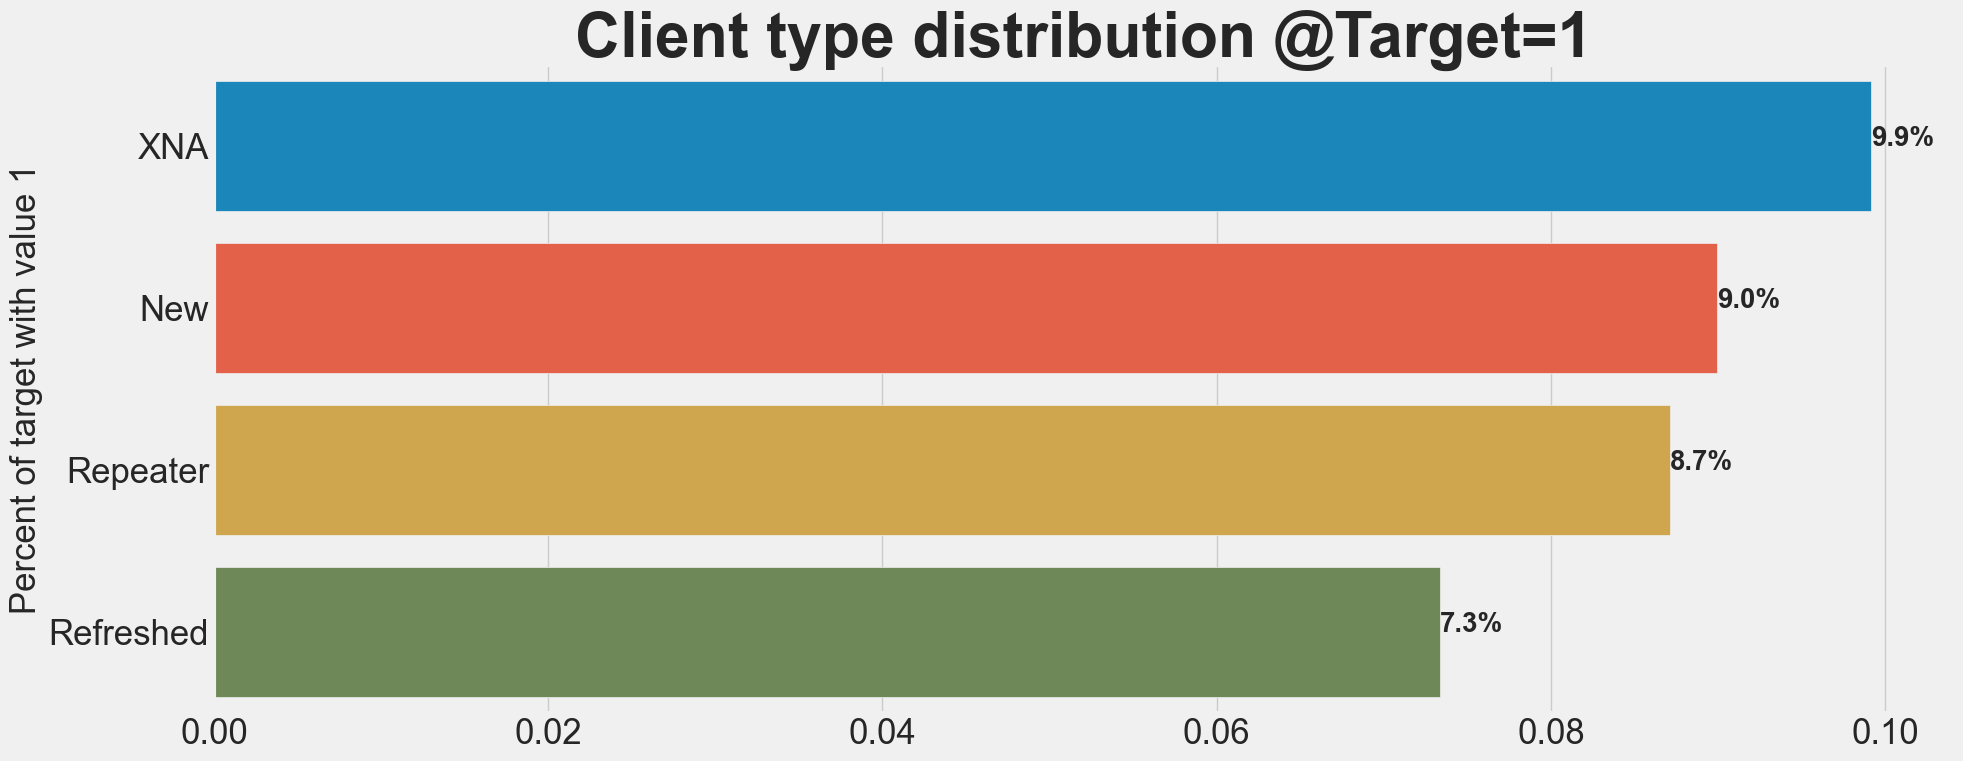

In [297]:
# NAME_CLIENT_TYPE
plot_stat(data_previous_application_application_train, 'NAME_CLIENT_TYPE',"Client type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(data_previous_application_application_train, 'NAME_CLIENT_TYPE',"Client type distribution @Target=1")